<h1 align='center'> <font color='grey'><font size=7>💸💵Fintech:<font color="green"><b>Loan Defaulters</font>💵💸</b></font> </font></h1>

<h2 align='right'>Analysed by : <font color='green'><b> KASI </b></font></h2>


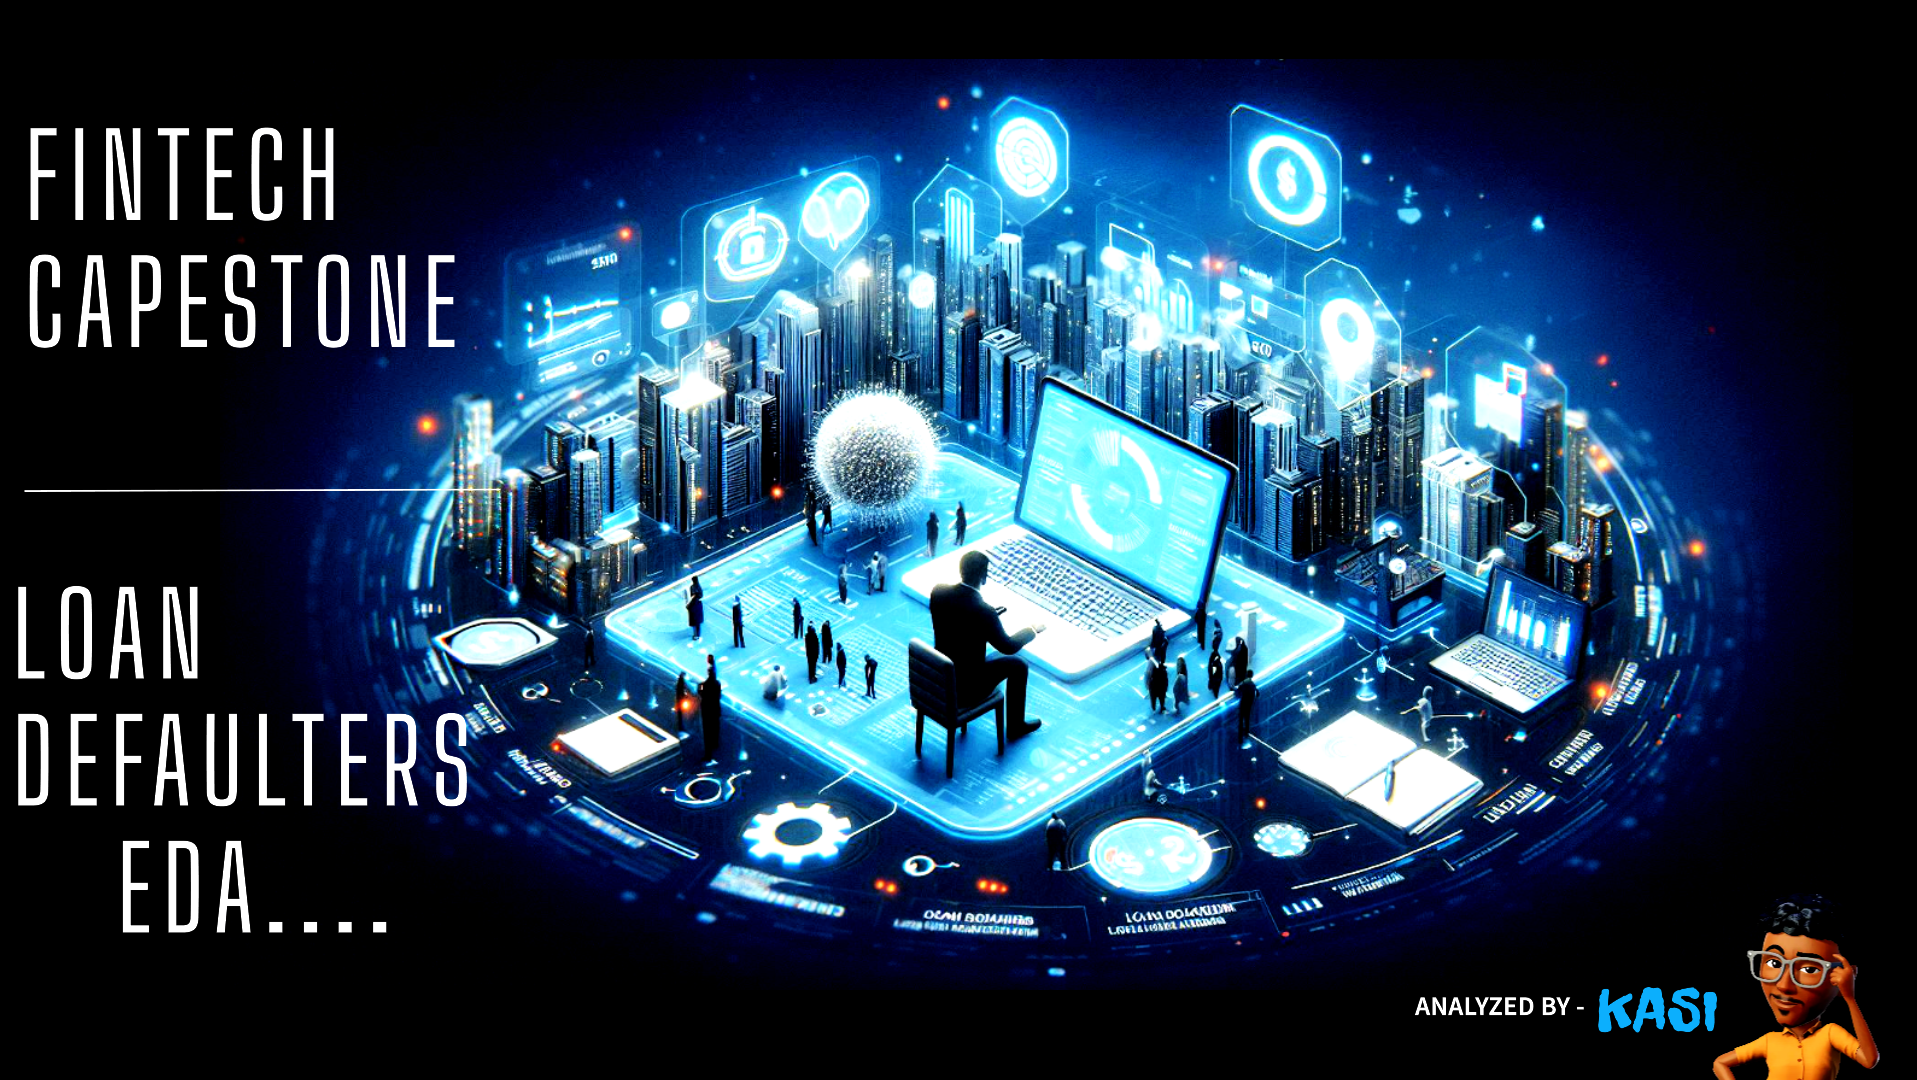

## 🧐<font color="green"><b> About the CaseStudy</font>

This project explores **risk analytics** in the **banking and financial services sector**, focusing on **data-driven methods** to reduce lending risks. It examines key variables such as **loan type**, **purpose**, **commercial nature**, and **credit score** to identify factors influencing **loan defaults**. Additionally, the relationship between **upfront charges**, **loan amounts**, **interest rates**, and **property values** with default likelihood will be analyzed to uncover valuable insights. The ultimate goal is to improve **risk assessment strategies**, enabling better **decision-making** and proactive measures to prevent **loan defaults**.


## <font color="green"><b>🤔 Introduction</font>

In the highly competitive and dynamic landscape of **banking and financial services**, effective **risk management** is crucial for maintaining **financial stability** and **profitability**. Lending institutions face significant risks, particularly the risk of **loan defaults**, which can have severe financial repercussions. **To mitigate these risks, it is essential to develop a robust understanding of the factors that influence loan repayment behavior and the likelihood of default.** This project explores the intersection of **data analytics** and **risk management**, focusing on how various variables related to loans and borrowers impact **default rates**. By leveraging data, we can gain valuable insights that will enable lenders to make more informed decisions, optimize lending practices, and reduce the risk of **financial loss**.

## <font color="green"><b>🎯 Objectives</font>

The primary objectives of this project are to:

> **Understanding Risk Analytics:** Gain a comprehensive understanding of **risk analytics** in the context of **banking and financial services**, with a particular focus on **loan default risks**.

> **Exploring Key Variables:** Investigate how variables such as **loan type**, **loan purpose**, **business nature**, and **credit scores** influence the likelihood of **loan defaults**.

> **Analyzing Financial Indicators:** Examine the correlation between financial indicators like **upfront charges**, **loan amounts**, **interest rates**, and **property values** with **default tendencies**.

> **Enhancing Risk Assessment:** Develop strategies to improve **risk assessment** in lending institutions by incorporating **data-driven insights**.

> **Proactive Default Prevention:** Propose measures to proactively prevent **loan defaults** based on the findings of the analysis.

## <font color="green"><b>📰 Scope of the Study</font>

    This project is designed to serve as a foundational exploration of risk analytics in the financial services industry. While the initial focus is on specific variables and their impact on loan defaults, the scope of the study is open-ended, allowing for deeper exploration and additional research. By going beyond the provided topics, the project encourages a thorough investigation that could lead to innovative risk management strategies and insights that are valuable to the industry.

## <font color="green"><b>📄 Data Description</font>

| Field                       | Description                                                      |
|-----------------------------|------------------------------------------------------------------|
| ID                          | Unique identifier for each row                                   |
| year                        | Year when the loan was taken                                    |
| loan_limit                  | Indicates if the loan limit is fixed (cf-confirm/fixed) or variable (ncf-not confirm/not fixed) |
| Gender                      | Gender of the applicant (male, female, not specified, joint)   |
| loan_type                   | Type of loan (masked data, type-1, type-2, type-3)             |
| loan_purpose                | Purpose of the loan (masked data, p1, p2, p3, p4)               |
| business_or_commercial      | Indicates if the loan is for a commercial or personal establishment |
| loan_amount                 | Amount of the loan                                              |
| rate_of_interest            | Rate of interest for the loan                                   |
| Upfront_charges             | Down payment made by the applicant                              |
| property_value              | Value of the property being constructed with the loan           |
| occupancy_type              | Type of occupancy for the establishment                         |
| income                      | Income of the applicant                                         |
| credit_type                 | Credit type (EXP, EQUI, CRIF, CIB)                             |
| Credit_Score                | Credit score of the applicant                                   |
| co-applicant_credit_type    | Credit type for co-applicant                                    |
| age                         | Age of the applicant                                           |
| LTV                         | Lifetime value of the applicant                                 |
| Region                      | Region of the applicant                                         |
| Status                      | Indicates if the applicant is a defaulter (1) or normal (0)   |
| Default                     | Indicates if the loan defaulted (1) or not (0)                |


## <font color="green"><b>🕵 Research Methodology</font>

* **Data Collection:** Gather relevant data from **financial institutions**, including **loan details**, **borrower profiles**, and **financial metrics**.

* **Data Analysis:** Use **statistical** and **machine learning techniques** to analyze the data and identify patterns and correlations between the variables and **loan default rates**.

* **Visualization:** Create visual representations of the findings to make the insights more **accessible** and **actionable** for stakeholders.

* **Recommendations:** Based on the analysis, provide **recommendations** for improving **risk assessment** and **default prevention strategies** in lending institutions.


## <font color="green"><b>🕵📝 Expected Outcomes</font>

> At the conclusion of this project, we aim to produce a collection of **actionable insights** and **recommendations** to assist **financial institutions** in better evaluating and managing lending risks. These insights are expected to foster more effective **risk mitigation strategies**, thereby decreasing the likelihood of **loan defaults** and improving the overall **financial stability** of the involved institutions.


### <font color="green"><b>📚 Importing Libraries and Modules</font>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import scipy.stats as stats
from scipy.stats import chi2_contingency,fisher_exact,shapiro,levene,mannwhitneyu,bartlett,anderson,jarque_bera,boxcox,probplot

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set Pandas options to display all columns & rows
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

### <font color="green"><b>🗒️🧹 Data Wrangling</font>

In [3]:
data = pd.read_csv('loan.csv')

In [4]:
data.head()

ID  year loan_limit             Gender loan_type loan_purpose  \
0  24890  2019         cf  Sex Not Available     type1           p1   
1  24891  2019         cf               Male     type2           p1   
2  24892  2019         cf               Male     type1           p1   
3  24893  2019         cf               Male     type1           p4   
4  24894  2019         cf              Joint     type1           p1   

  business_or_commercial  loan_amount  rate_of_interest  Upfront_charges  \
0                  nob/c       116500               NaN              NaN   
1                    b/c       206500               NaN              NaN   
2                  nob/c       406500              4.56            595.0   
3                  nob/c       456500              4.25              NaN   
4                  nob/c       696500              4.00              0.0   

   property_value occupancy_type   income credit_type  Credit_Score  \
0        118000.0             pr   1740.0         EXP           758   
1             NaN             pr   4980.0        EQUI           552   
2        508000.0             pr   9480.0         EXP           834   
3        658000.0             pr  11880.0         EXP           587   
4        758000.0             pr  10440.0        CRIF           602   

  co-applicant_credit_type    age        LTV Region  Status  
0                      CIB  25-34  98.728814  south       1  
1                      EXP  55-64        NaN  North       1  
2                      CIB  35-44  80.019685  south       0  
3                      CIB  45-54  69.376900  North       0  
4                      EXP  25-34  91.886544  North       0

In [5]:
# Checking the number of rows and columns
print(f"The number of rows: {data.shape[0]:,} \nThe number of columns: {data.shape[1]}")

The number of rows: 148,670 
The number of columns: 20


In [6]:
# Check all column names
data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Upfront_charges', 'property_value', 'occupancy_type', 'income',
       'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'LTV',
       'Region', 'Status'],
      dtype='object')

**🤏🏽OBSERVATION**

> The dataset has **1,48,670  rows** and **20 columns**

**Column Name	Description:**

1. **ID:** Id for each row
2. **year:** year when the loan was taken
3. **loan_limit:** if the loan limit is fixed or variable, cf- confirm/fixed, ncf- not confirm/not fixed
4. **Gender:** gender of the applicant, can be male, female, not specified, joint (in case of applling as a couple for home loan)
5. **loan_type:** type of loan (masked data), type-1, type-2, type-3
6. **loan_purpose:** purpose of the loan (masked data ) p1, p2, p3, p4
7. **business_or_commercial:** if the loan is for sommercial establishment or personal
establishment
8. **loan_amount:** amount of the loan
9. **rate_of_interest:** rate of interest for the loan
10. **Upfront_charges:** down payment done by the applicant
11. **property_value:** value of the property being constructed for which the loan is taken.
12. **occupancy_type:** for the establishment
13. **income:** income of the applicant
14. **credit_type** 'EXP' 'EQUI' 'CRIF' 'CIB'
15. **Credit_Score:** credit score of applicant
16. **co-applicant_credit_type:** credit type for co-applicant
17. **age:** age of applicant
18. **LTV lifetime:** value of the applicant
19. **Region:** region of the applicant
20. **Status:** defaulter(1) or normal(0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        148670 non-null  int64  
 1   year                      148670 non-null  int64  
 2   loan_limit                145326 non-null  object 
 3   Gender                    148670 non-null  object 
 4   loan_type                 148670 non-null  object 
 5   loan_purpose              148536 non-null  object 
 6   business_or_commercial    148670 non-null  object 
 7   loan_amount               148670 non-null  int64  
 8   rate_of_interest          112231 non-null  float64
 9   Upfront_charges           109028 non-null  float64
 10  property_value            133572 non-null  float64
 11  occupancy_type            148670 non-null  object 
 12  income                    139520 non-null  float64
 13  credit_type               148670 non-null  o

In [8]:
# Number of unique values in each coluumn and datatype:
print("Number of unique values in each coluumn and datatype:")
print("-" * 55)
for i, elem in (enumerate(data.columns)):
    print(f"{i+1}. {elem}: {data[elem].nunique(), data[elem].dtypes}")

Number of unique values in each coluumn and datatype:
-------------------------------------------------------
1. ID: (148670, dtype('int64'))
2. year: (1, dtype('int64'))
3. loan_limit: (2, dtype('O'))
4. Gender: (4, dtype('O'))
5. loan_type: (3, dtype('O'))
6. loan_purpose: (4, dtype('O'))
7. business_or_commercial: (2, dtype('O'))
8. loan_amount: (211, dtype('int64'))
9. rate_of_interest: (131, dtype('float64'))
10. Upfront_charges: (58271, dtype('float64'))
11. property_value: (385, dtype('float64'))
12. occupancy_type: (3, dtype('O'))
13. income: (1001, dtype('float64'))
14. credit_type: (4, dtype('O'))
15. Credit_Score: (401, dtype('int64'))
16. co-applicant_credit_type: (2, dtype('O'))
17. age: (7, dtype('O'))
18. LTV: (8484, dtype('float64'))
19. Region: (4, dtype('O'))
20. Status: (2, dtype('int64'))


In [9]:
# Columns thet are to be converted to Category datatype
print("Columns thet are to be converted to Category datatype:")
print("-" * 55)
for i, elem in (enumerate(data.columns)):
    if data[elem].nunique() < 8 and data[elem].dtypes == 'O':
        print(f"{i+1}. {elem}: {data[elem].nunique(), data[elem].dtypes}")

Columns thet are to be converted to Category datatype:
-------------------------------------------------------
3. loan_limit: (2, dtype('O'))
4. Gender: (4, dtype('O'))
5. loan_type: (3, dtype('O'))
6. loan_purpose: (4, dtype('O'))
7. business_or_commercial: (2, dtype('O'))
12. occupancy_type: (3, dtype('O'))
14. credit_type: (4, dtype('O'))
16. co-applicant_credit_type: (2, dtype('O'))
17. age: (7, dtype('O'))
19. Region: (4, dtype('O'))


**🤏🏽OBSERVATION**

Converting columns to categorical is necessary to improve:

- Memory efficiency
- Performance in machine learning models
- Proper representation and analysis of the data

This is especially important when working with large datasets, as it helps streamline both the analysis and modeling phases.

- Status need to be converted to catgory datatype

In [10]:
# Creating a deep copy for backup
df = data.copy()

In [11]:
# Convert columns to categorical
cols_to_cat = ['loan_limit', 'Gender', 'loan_type', 'loan_purpose', 'business_or_commercial', 'occupancy_type', 'credit_type', 'co-applicant_credit_type', 'age', 'Region', 'Status']
for col in cols_to_cat:
    df[col] = df[col].astype('category')
print("Required columns are converted to categorical")

Required columns are converted to categorical


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        148670 non-null  int64   
 1   year                      148670 non-null  int64   
 2   loan_limit                145326 non-null  category
 3   Gender                    148670 non-null  category
 4   loan_type                 148670 non-null  category
 5   loan_purpose              148536 non-null  category
 6   business_or_commercial    148670 non-null  category
 7   loan_amount               148670 non-null  int64   
 8   rate_of_interest          112231 non-null  float64 
 9   Upfront_charges           109028 non-null  float64 
 10  property_value            133572 non-null  float64 
 11  occupancy_type            148670 non-null  category
 12  income                    139520 non-null  float64 
 13  credit_type               148

In [13]:
df['Status'].unique()

[1, 0]
Categories (2, int64): [0, 1]

**🤏🏽OBSERVATION**

Lets rename the column elements
> `1 -> defaulter`  
> `0 -> normal`

In [14]:
# Renamed the elements
df['Status'] = df['Status'].apply(lambda x: 'defaulter' if x == 1 else 'normal')

In [15]:
# Display the range of attributes
print("Range of attributes:")
print("-" * 20)
df.describe(include='all').T

Range of attributes:
--------------------


count unique     top    freq           mean  \
ID                        148670.0    NaN     NaN     NaN        99224.5   
year                      148670.0    NaN     NaN     NaN         2019.0   
loan_limit                  145326      2      cf  135348            NaN   
Gender                      148670      4    Male   42346            NaN   
loan_type                   148670      3   type1  113173            NaN   
loan_purpose                148536      4      p3   55934            NaN   
business_or_commercial      148670      2   nob/c  127908            NaN   
loan_amount               148670.0    NaN     NaN     NaN  331117.743997   
rate_of_interest          112231.0    NaN     NaN     NaN       4.045476   
Upfront_charges           109028.0    NaN     NaN     NaN    3224.996127   
property_value            133572.0    NaN     NaN     NaN  497893.465696   
occupancy_type              148670      3      pr  138201            NaN   
income                    139520.0    NaN     NaN     NaN    6957.338876   
credit_type                 148670      4     CIB   48152            NaN   
Credit_Score              148670.0    NaN     NaN     NaN     699.789103   
co-applicant_credit_type    148670      2     CIB   74392            NaN   
age                         148470      7   45-54   34720            NaN   
LTV                       133572.0    NaN     NaN     NaN      72.746457   
Region                      148670      4   North   74722            NaN   
Status                      148670      2  normal  112031            NaN   

                                    std       min       25%       50%  \
ID                         42917.476598   24890.0  62057.25   99224.5   
year                                0.0    2019.0    2019.0    2019.0   
loan_limit                          NaN       NaN       NaN       NaN   
Gender                              NaN       NaN       NaN       NaN   
loan_type                           NaN       NaN       NaN       NaN   
loan_purpose                        NaN       NaN       NaN       NaN   
business_or_commercial              NaN       NaN       NaN       NaN   
loan_amount               183909.310127   16500.0  196500.0  296500.0   
rate_of_interest               0.561391       0.0     3.625      3.99   
Upfront_charges              3251.12151       0.0    581.49   2596.45   
property_value            359935.315562    8000.0  268000.0  418000.0   
occupancy_type                      NaN       NaN       NaN       NaN   
income                      6496.586382       0.0    3720.0    5760.0   
credit_type                         NaN       NaN       NaN       NaN   
Credit_Score                 115.875857     500.0     599.0     699.0   
co-applicant_credit_type            NaN       NaN       NaN       NaN   
age                                 NaN       NaN       NaN       NaN   
LTV                           39.967603  0.967478  60.47486  75.13587   
Region                              NaN       NaN       NaN       NaN   
Status                              NaN       NaN       NaN       NaN   

                                75%         max  
ID                        136391.75    173559.0  
year                         2019.0      2019.0  
loan_limit                      NaN         NaN  
Gender                          NaN         NaN  
loan_type                       NaN         NaN  
loan_purpose                    NaN         NaN  
business_or_commercial          NaN         NaN  
loan_amount                436500.0   3576500.0  
rate_of_interest              4.375         8.0  
Upfront_charges              4812.5     60000.0  
property_value             628000.0  16508000.0  
occupancy_type                  NaN         NaN  
income                       8520.0    578580.0  
credit_type                     NaN         NaN  
Credit_Score                  800.0       900.0  
co-applicant_credit_type        NaN         NaN  
age                             NaN         NaN 

In [16]:
# Display the statistical summary
print("statistical summary:")
print("-" * 20)
df.describe().T

statistical summary:
--------------------


count           mean            std           min  \
ID                148670.0   99224.500000   42917.476598  24890.000000   
year              148670.0    2019.000000       0.000000   2019.000000   
loan_amount       148670.0  331117.743997  183909.310127  16500.000000   
rate_of_interest  112231.0       4.045476       0.561391      0.000000   
Upfront_charges   109028.0    3224.996127    3251.121510      0.000000   
property_value    133572.0  497893.465696  359935.315562   8000.000000   
income            139520.0    6957.338876    6496.586382      0.000000   
Credit_Score      148670.0     699.789103     115.875857    500.000000   
LTV               133572.0      72.746457      39.967603      0.967478   

                           25%           50%            75%          max  
ID                 62057.25000   99224.50000  136391.750000    173559.00  
year                2019.00000    2019.00000    2019.000000      2019.00  
loan_amount       196500.00000  296500.00000  436500.000000   3576500.00  
rate_of_interest       3.62500       3.99000       4.375000         8.00  
Upfront_charges      581.49000    2596.45000    4812.500000     60000.00  
property_value    268000.00000  418000.00000  628000.000000  16508000.00  
income              3720.00000    5760.00000    8520.000000    578580.00  
Credit_Score         599.00000     699.00000     800.000000       900.00  
LTV                   60.47486      75.13587      86.184211      7831.25

**🤏🏽OBSERVATION**

1. **ID**s are unique identifiers with a broad range. This column is not used in analysis but ensures each entry's uniqueness.
2. **Year**: Range: 2019, All entries are from the year 2019, indicating a single year’s dataset.
3. **Loan Limit**
    - Unique Values: 2 (e.g., 'cf' for fixed, 'ncf' for not fixed)
    - Most Frequent: 'cf'. They are predominant, potentially affecting risk and repayment patterns.
4. **Gender**:
    - Unique Values: 4 (e.g., 'Male', 'Female', 'Not Specified', 'Joint')
    - Most Frequent: 'Male'. Gender distribution varies, with a higher count for 'Male'. Gender may influence default risk but requires further analysis.
5. **Loan Type**:
    - Unique Values: 3 (e.g., 'type1', 'type2', 'type3')
    - Most Frequent: 'type1' which could be relevant for understanding default patterns specific to loan types.
6. **Loan Purpose**:
    - Unique Values: 4 (e.g., 'p1', 'p2', 'p3', 'p4')
    - Most Frequent: 'p3'. The purpose of loans varies, with 'p3' being the most frequent. Different purposes may correlate with varying default rates.
7. **Business or Commercial**:
    - Unique Values: 2 (e.g., 'b' for business, 'c' for commercial)
    - Most Frequent: 'c'.Commercial loans are more frequent than business loans. This distinction could be significant for risk assessment.
8. **Loan Amount**:
    - Average: 331,118 dollers
    - Range: 16,500 to 3,576,500 dollers. Significant variation in loan amounts, suggesting diverse borrower needs and potential risk factors.
9. **Rate of Interest**:
    - Average: 4.05%
    - Range: 0% to 8%
    - Interest rates vary widely, impacting loan affordability and default risk.
10. **Upfront Charges**:
    - Average: 3,225 dollers
    - Range: 0 to 60,000 dollers
    - Upfront charges vary greatly. High upfront charges might affect borrower willingness and default likelihood.
11. **Property Value**:
    - Average: 497,893 dollers
    - Range: 8,000 to 16,508,000 dollers
    - Large variation in property values, indicating different property types and potential risk associated with high-value properties.
12. **Occupancy Type**:
    - Unique Values: 3 (e.g., 'pr' for primary residence, etc.)
    - Most Frequent: 'pr'
    - Primary residences are most common, which might influence default patterns.
13. **Income**:
    - Average: 6,957 dollers
    - Range: 0 to 578,580 dollers
    - Wide range in income levels. Lower income might be associated with higher default risk.
14. **Credit Type**:
    - Unique Values: 4 (e.g., 'EXP', 'EQUI', 'CRIF', 'CIB')
    - Most Frequent: 'CIB'
    - 'CIB' is the most frequent credit type, which could have implications for default risk.
15. **Credit Score**:
    - Average: 700
    - Range: 500 to 900
    - Credit scores vary, with most falling between 599 and 800. Higher credit scores are generally associated with lower default risk.
16. **Co-Applicant Credit Type**:
    - Unique Values: 2 (e.g., 'CIB' most frequent)
    - Most Frequent: 'CIB'
    - Similar to credit type for applicants, the co-applicant's credit type could also impact the risk assessment.
17. **Age**:
    - Unique Values: 7 (e.g., '45-54' is the most common)
    - Most Frequent: '45-54'
    - Age distribution shows a concentration in the 45-54 age group, which might influence borrowing behavior and risk.
18. **LTV (Loan-to-Value)**:
    - Average: 72.75%
    - Range: 0.97% to 7,831.25%
    - Significant range in LTV values. Higher LTVs might indicate higher risk, particularly if approaching or exceeding 100%.
19. **Region**:
    - Unique Values: 4 (e.g., 'North' is the most frequent)
    - Most Frequent: 'North'
    - Regional distribution shows 'North' as the most common region. Regional variations could impact default rates and risk strategies.
20. **Status**:
    - Unique Values: 2 ('normal' is the most frequent)
    - Most Frequent: 'normal'
    - The majority of entries are 'normal', indicating a lower proportion of defaults. This distribution is crucial for analyzing default risk.

### <font color=green>**👬 Checking for Duplicates**</font>

In [17]:
df[data.duplicated()]

Empty DataFrame
Columns: [ID, year, loan_limit, Gender, loan_type, loan_purpose, business_or_commercial, loan_amount, rate_of_interest, Upfront_charges, property_value, occupancy_type, income, credit_type, Credit_Score, co-applicant_credit_type, age, LTV, Region, Status]
Index: []

**🤏🏽OBSERVATION**

- There is no duplicate records.

### <font color=green>**❓ Missing value treatment and Cleaning**</font>

In [18]:
# How many percentage of data is missing in each column
missing_value = pd.DataFrame({'Missing Value': df.isnull().sum(), 'Percentage': (((df.isnull().sum() / len(df))*100)).round(2)})
sorted_missing_value = missing_value.sort_values(by='Percentage', ascending=False)
sorted_missing_value

Missing Value  Percentage
Upfront_charges                   39642       26.66
rate_of_interest                  36439       24.51
property_value                    15098       10.16
LTV                               15098       10.16
income                             9150        6.15
loan_limit                         3344        2.25
age                                 200        0.13
loan_purpose                        134        0.09
Region                                0        0.00
co-applicant_credit_type              0        0.00
Credit_Score                          0        0.00
credit_type                           0        0.00
ID                                    0        0.00
occupancy_type                        0        0.00
year                                  0        0.00
loan_amount                           0        0.00
business_or_commercial                0        0.00
loan_type                             0        0.00
Gender                                0        0.00
Status                                0        0.00

In [19]:
# Columns to be handlled for missing values
missing_value_treatment_columns = sorted_missing_value.index[0:8]
missing_value_treatment_columns

Index(['Upfront_charges', 'rate_of_interest', 'property_value', 'LTV',
       'income', 'loan_limit', 'age', 'loan_purpose'],
      dtype='object')

In [20]:
# Catrgorical columns to be handlled for missing values
missing_value_treatment_columns_cat = df[missing_value_treatment_columns].select_dtypes(include=['category']).columns
missing_value_treatment_columns_cat

Index(['loan_limit', 'age', 'loan_purpose'], dtype='object')

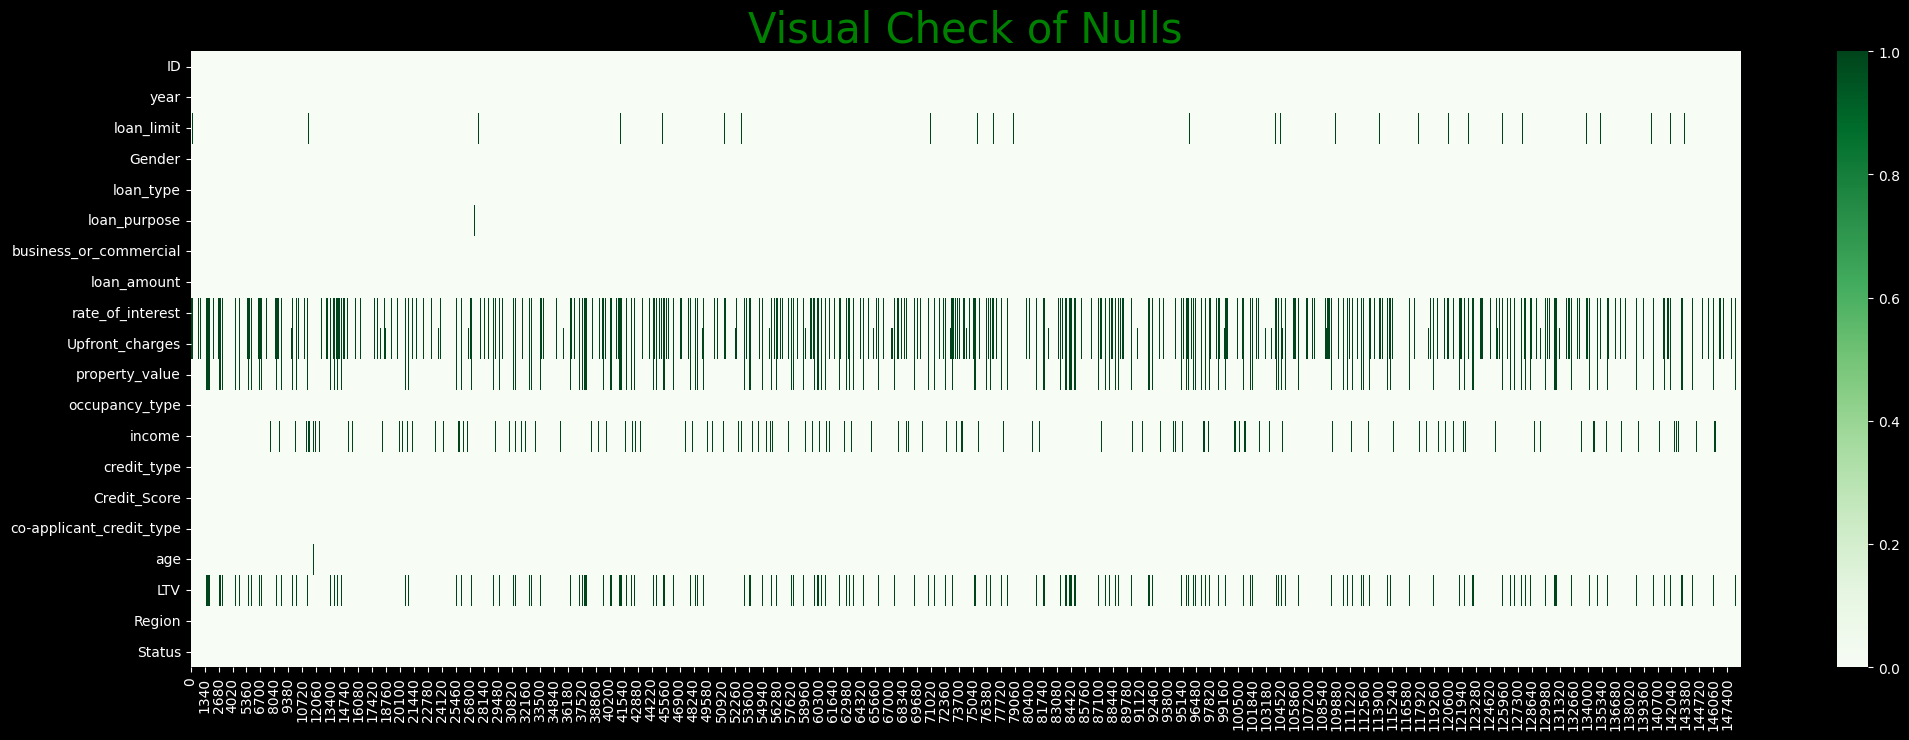

In [38]:
# Null value heatmap:

plt.figure(figsize=(25,8))
plt.style.use('dark_background')
sns.heatmap(df.isnull().T,cmap='Greens')
plt.title('Visual Check of Nulls',fontsize=30,color='green')
plt.show()

#### <font color=#17B169>**🤔Decision for imputation**</font>

In [21]:
# Numerical columns to be handlled for missing values
missing_value_treatment_columns_num = df[missing_value_treatment_columns].select_dtypes(include='number').skew().round(2).reset_index().rename(columns={'index':'columns', 0:"skewness_coeff"})['columns'].to_list()
missing_value_treatment_columns_num

['Upfront_charges', 'rate_of_interest', 'property_value', 'LTV', 'income']

In [22]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


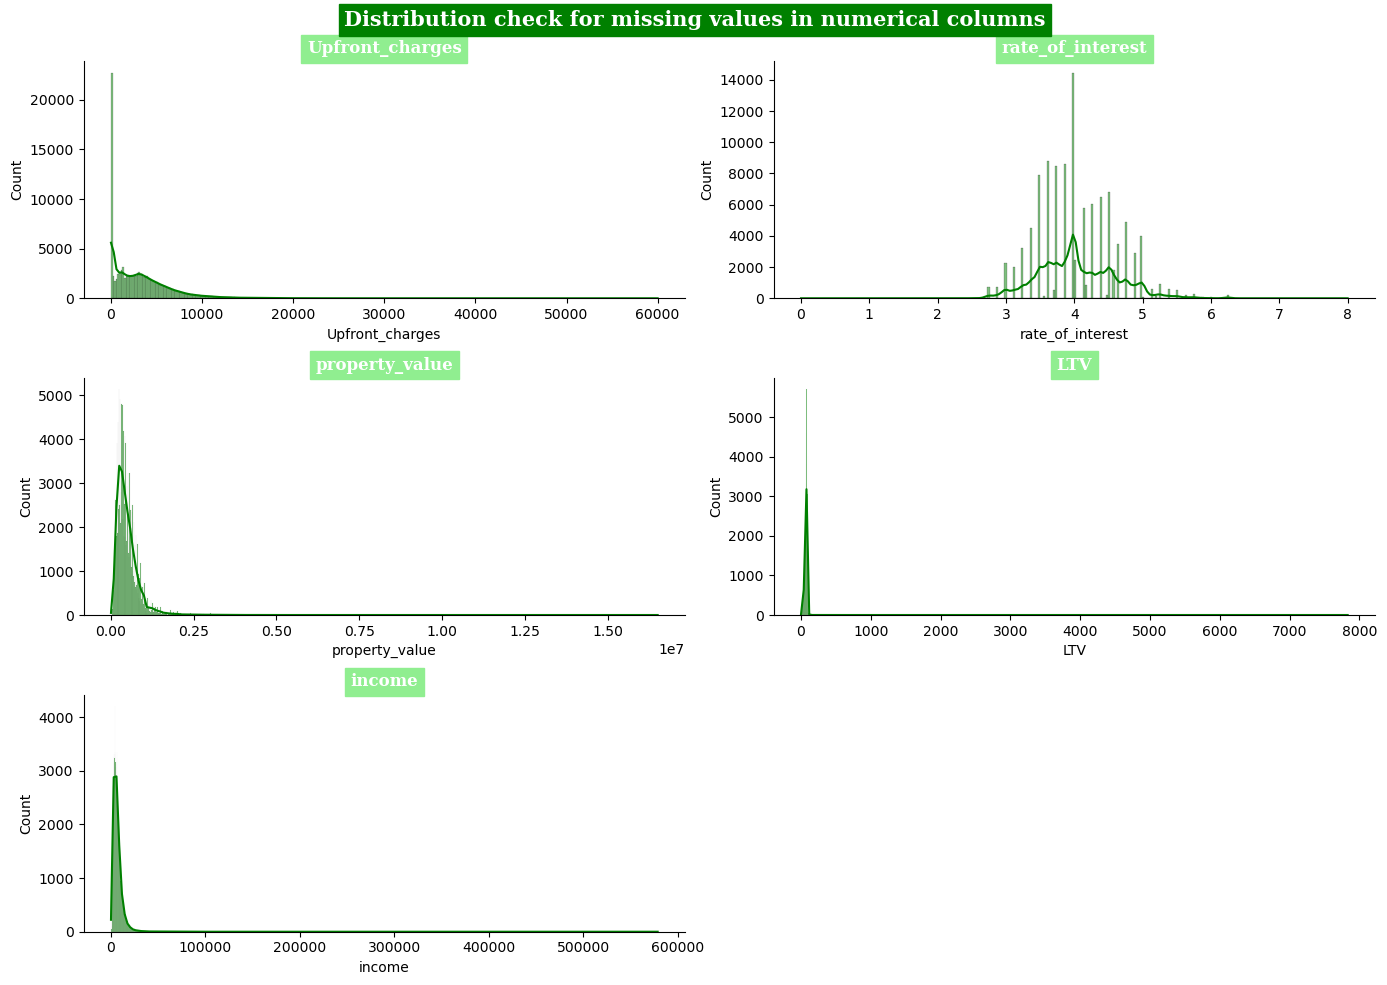

In [23]:
# Distribution check for missing numerical columns:
plt.figure(figsize=(14,10))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
for i, elem in enumerate(missing_value_treatment_columns_num):
    plt.subplot(3,2,i+1)
    sns.histplot(df[elem], kde=True,color='green')
    plt.title(elem,fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='lightgreen',color='w')

plt.suptitle("Distribution check for missing values in numerical columns",
             fontsize=15,fontfamily='serif',fontweight='bold',backgroundcolor='green',color='w')
plt.tight_layout()
sns.despine()
plt.show()

In [24]:
# Skewness coefficient for missing value numerical columns
df[missing_value_treatment_columns].select_dtypes(include='number').skew().round(2).reset_index().rename(columns={'index':'columns', 0:"skewness_coeff"})

columns  skewness_coeff
0   Upfront_charges            1.75
1  rate_of_interest            0.39
2    property_value            4.59
3               LTV          120.62
4            income           17.31

In [25]:
# Skewness coefficient for missing value numerical columns
df[missing_value_treatment_columns].select_dtypes(include='number').kurt().round(2).reset_index().rename(columns={'index':'columns', 0:"kurtosis_coeff"})

columns  kurtosis_coeff
0   Upfront_charges            6.37
1  rate_of_interest            0.34
2    property_value           73.22
3               LTV        19979.04
4            income          885.29

> **Visualizing Missing Data Patterns**

> **Missingno Library:** The missingno library is great for visualizing patterns in missing data.



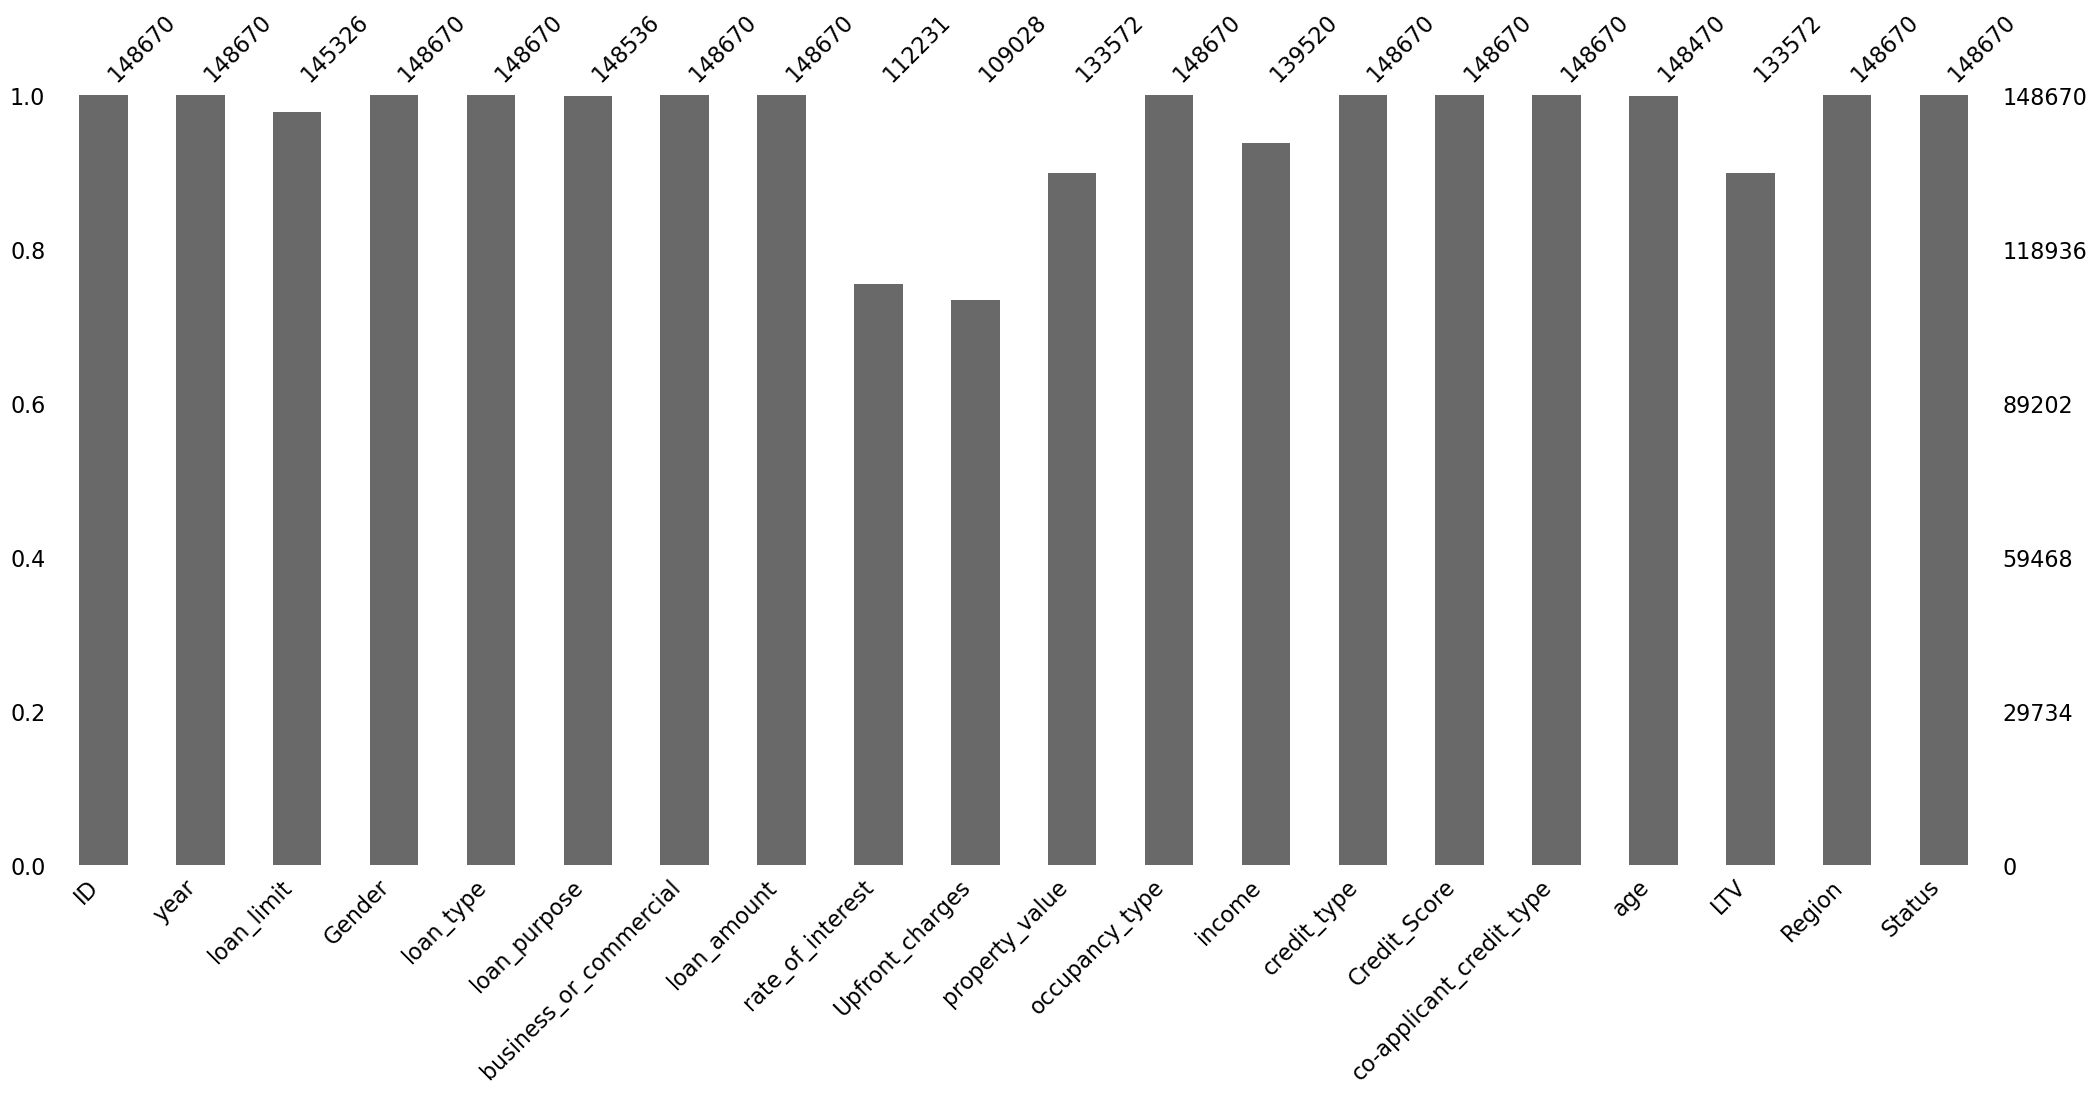

In [28]:
import missingno as msno
# Missing data bar plot
msno.bar(df)
plt.show()

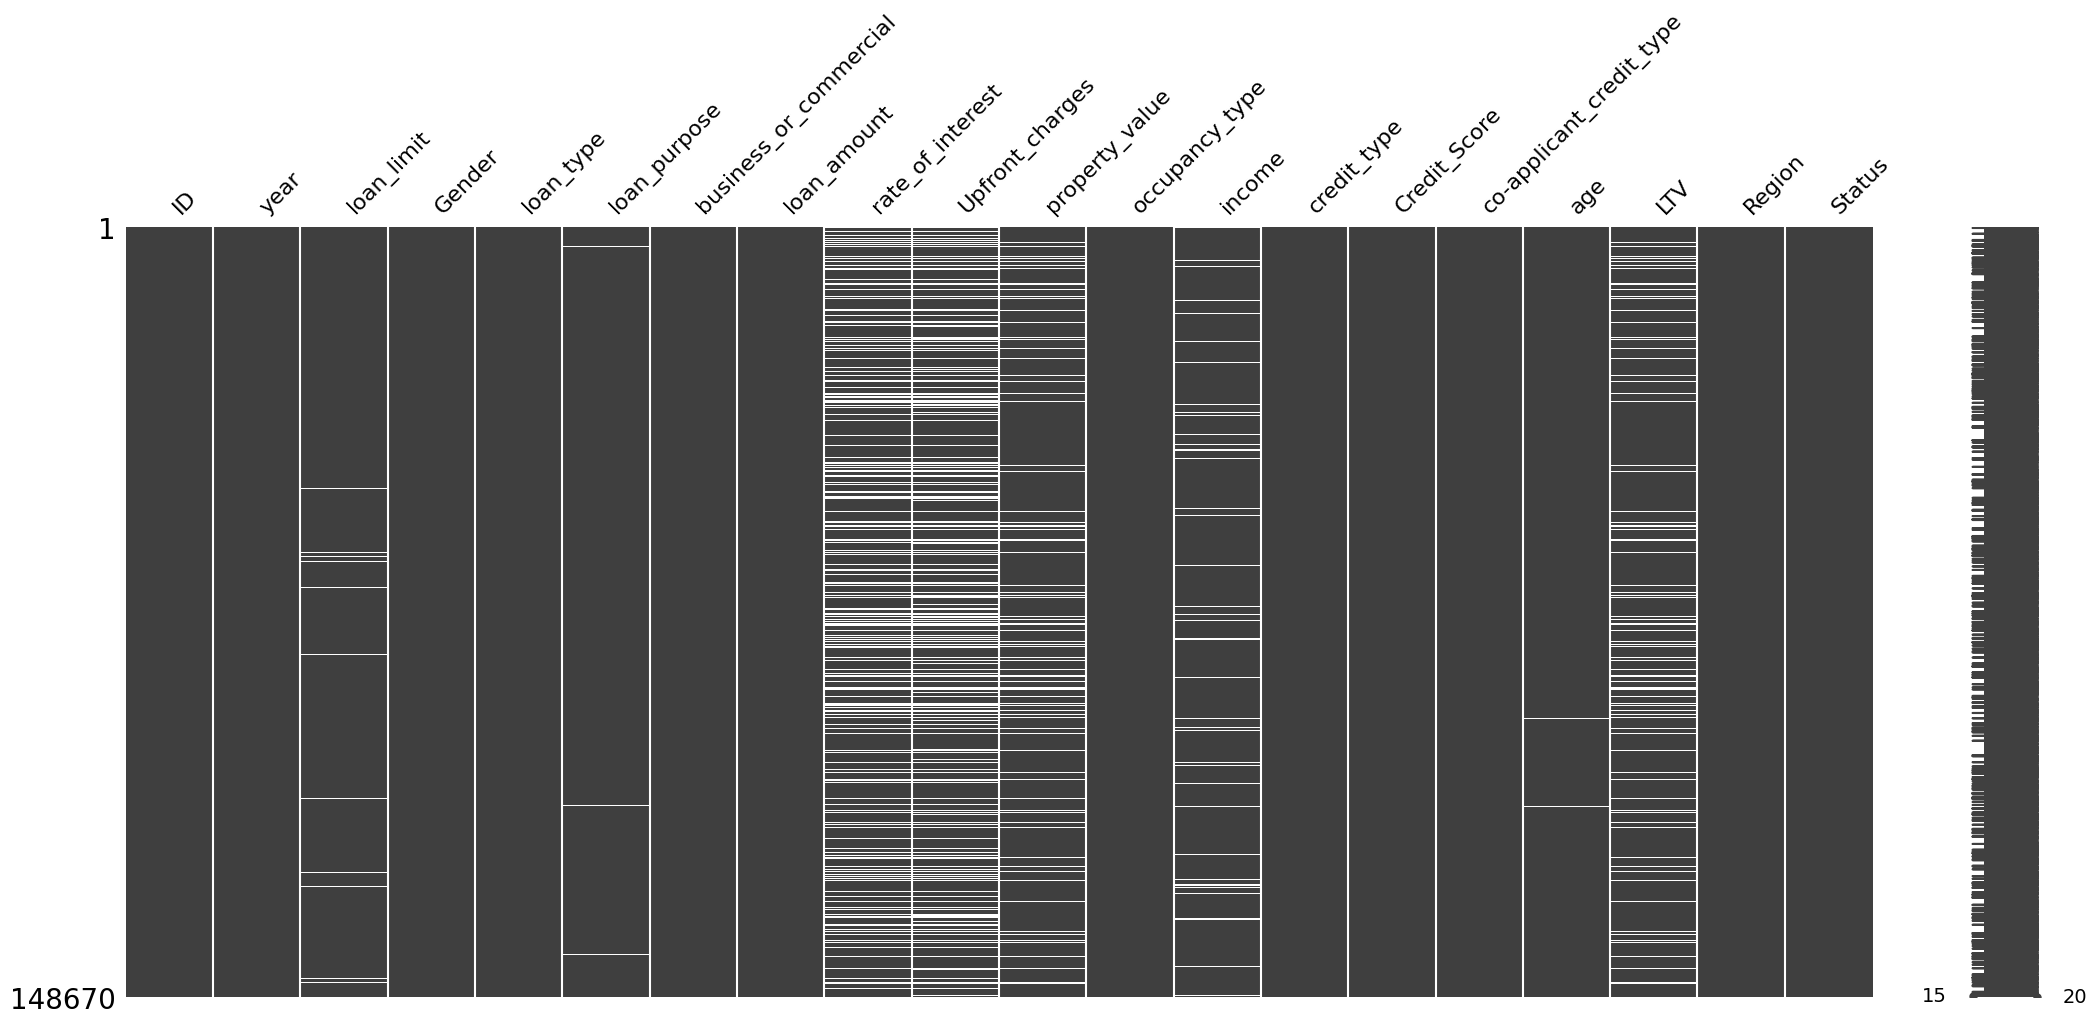

In [26]:
# Missing data matrix plot
msno.matrix(df)
plt.show()

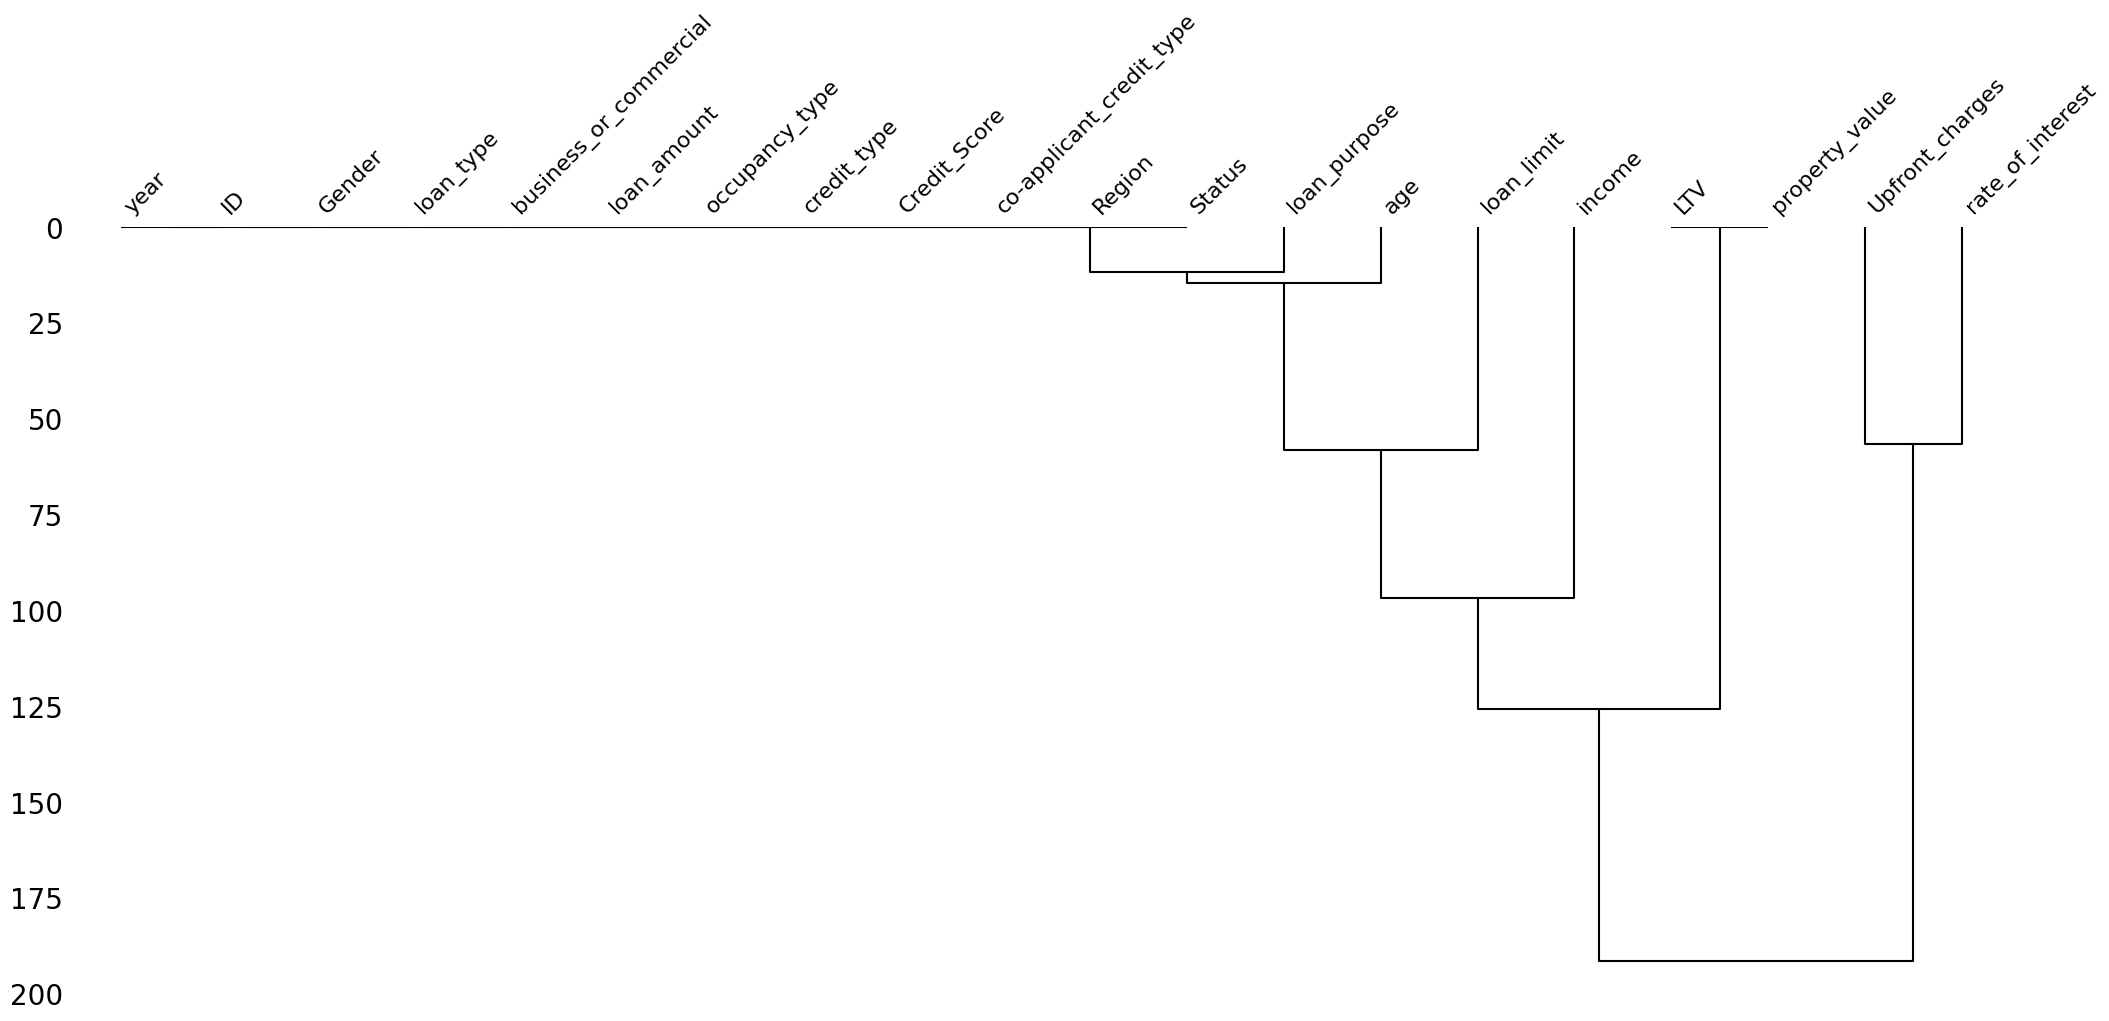

In [27]:
# Dendrogram to show correlation in missing data
msno.dendrogram(df)
plt.show()

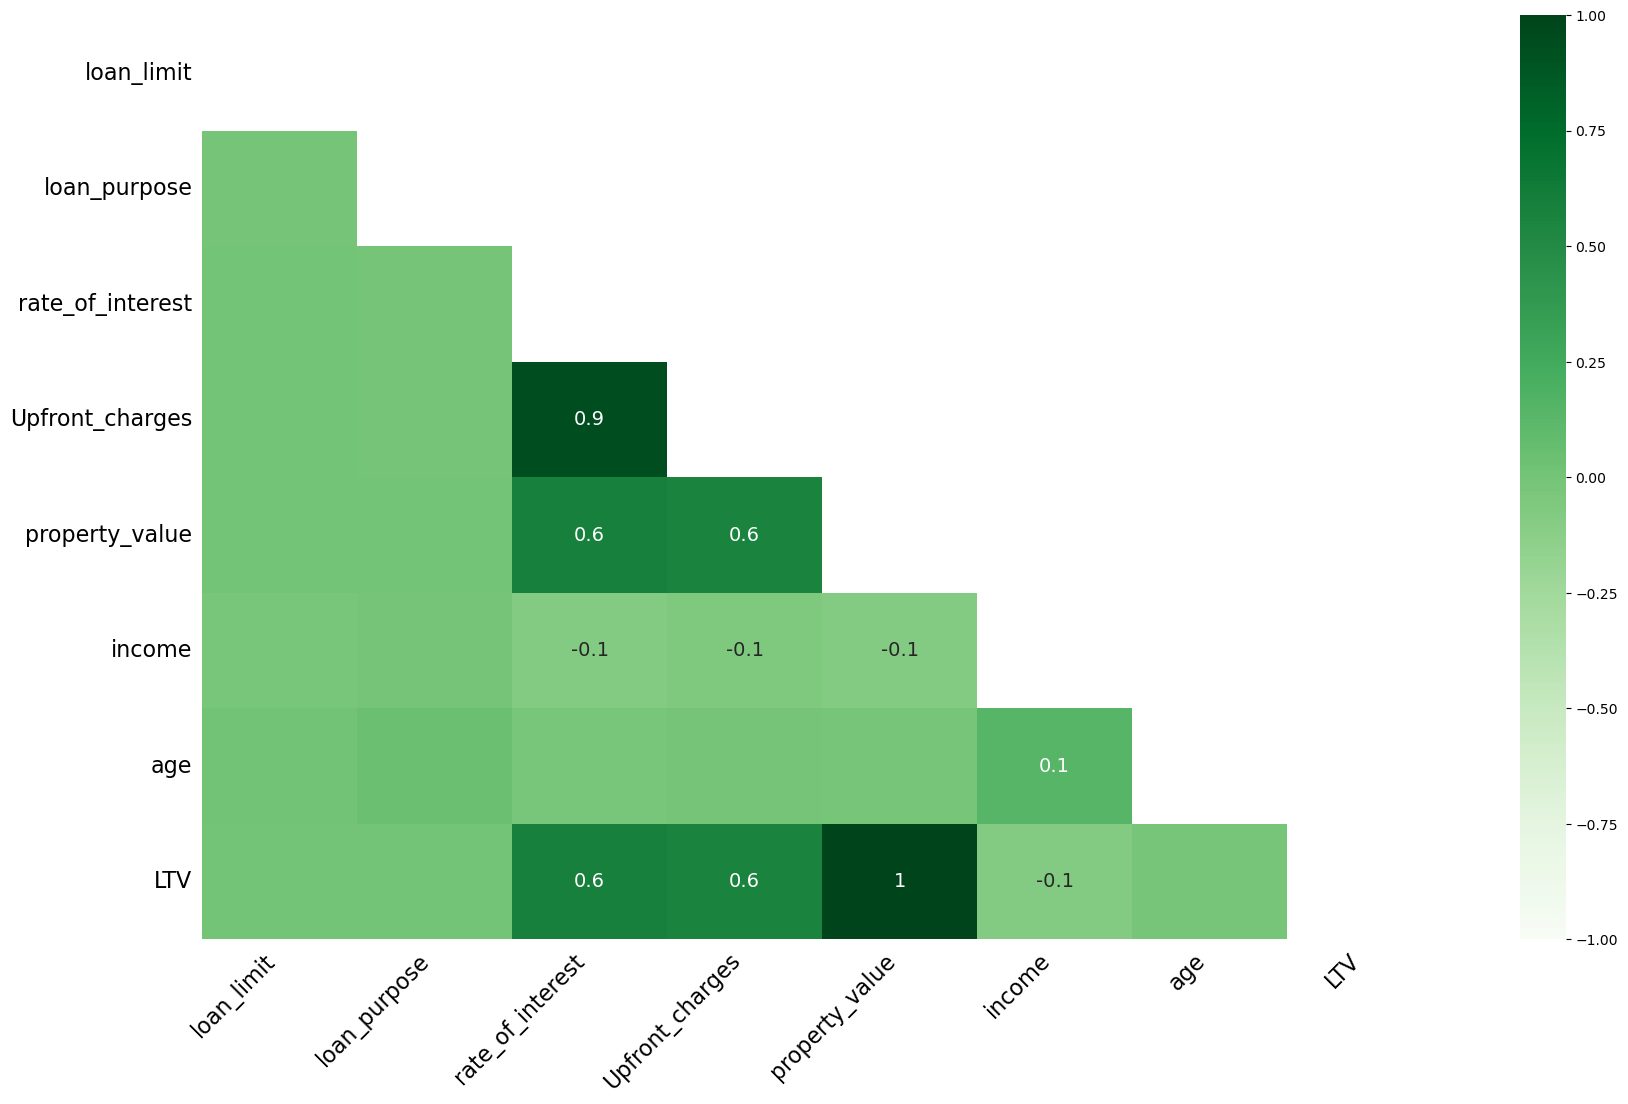

In [29]:
# Heatmap
msno.heatmap(df,cmap='Greens')
plt.show()

> * These plots help identify if missing values are scattered randomly or if they are more structured.   
> * The dendrogram in particular helps identify clusters of columns that have similar missing data patterns.

**Correlation Matrix of Continuous Variables**

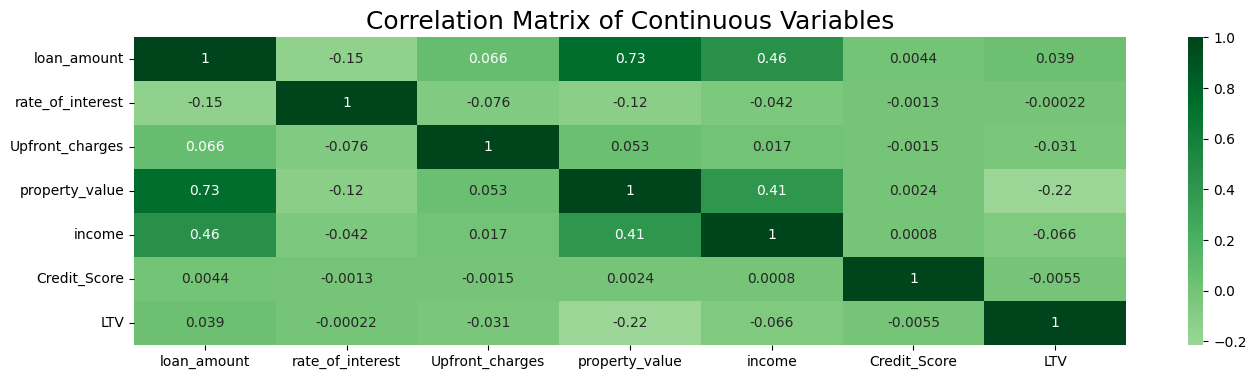

In [29]:
# Selecting the categorical columns
numerical_df = df.select_dtypes(include=['int64','float64'])
numerical_df_req = numerical_df[numerical_df.columns[2:]]

# Correlation Matrix of Continuous Variables
plt.figure(figsize=(16, 4))
corr_matrix = numerical_df_req.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Greens', center=0)
plt.title('Correlation Matrix of Continuous Variables', fontsize = 18)
plt.show()

### <font color=#17B169>**🎋 Treatment - `ML - Random Forest & XGboost` for Numerical variables**</font>

```python
from sklearn.ensemble import RandomForestRegressor

# Columns to impute (numerical only)
num_cols = ['Upfront_charges', 'rate_of_interest', 'property_value', 'income']

# Imputation for numerical columns using RandomForestRegressor
for col in num_cols:
    missing = df[col].isnull()  # Identify missing values in the column
    if missing.sum() > 0:
        # Training data: rows where this column is not missing
        X_train = df.loc[~missing, num_cols].drop(columns=[col])
        y_train = df.loc[~missing, col]

        # Missing data: rows where this column is missing
        X_missing = df.loc[missing, num_cols].drop(columns=[col])

        # Fit RandomForestRegressor on the training data
        rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
        rf_reg.fit(X_train, y_train)

        # Predict and fill the missing values
        df.loc[missing, col] = rf_reg.predict(X_missing)
```

Using both `RandomForestRegressor` and `XGBRegressor` for imputing missing numerical values can be a good strategy, as each model has its strengths. Here's why combining them can be beneficial:

> Benefits of Using Both Models

1. **Different Learning Approaches:**
   - **Random Forest** is an ensemble of decision trees and is robust to overfitting. It can capture complex relationships and interactions between features.
   - **XGBoost** (Extreme Gradient Boosting) is also an ensemble method but is based on boosting, which tends to perform better on many structured data problems due to its ability to optimize model performance through sequential learning.

2. **Improved Accuracy:**
   - By using predictions from both models, you can leverage the strengths of each. You might average the predictions or choose one based on their performance metrics (e.g., RMSE, MAE).

3. **Robustness to Different Data Characteristics:**
   - Different models may perform better with different distributions or characteristics of the data. Using both allows you to cover a broader range of scenarios.

> Implementation Considerations

1. **Model Selection:**
   - After training both models, you might consider evaluating their performance on a validation set (if available) to see which model performs better for imputation.

2. **Combining Predictions:**
   - You can either take the average of predictions from both models or use a more sophisticated method like stacking or weighted averaging based on model performance.

3. **Performance Monitoring:**
   - Keep track of how well your imputation improves the model performance on downstream tasks (e.g., regression or classification) after handling the missing values.

> Example of Combining Predictions

Here’s a basic approach to averaging predictions from both models:

```python
for col in num_cols:
    missing = df[col].isnull()
    if missing.sum() > 0:
        X_train = df.loc[~missing, num_cols].drop(columns=[col])
        y_train = df.loc[~missing, col]
        X_missing = df.loc[missing, num_cols].drop(columns=[col])

        # Random Forest Imputation
        rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
        rf_reg.fit(X_train, y_train)
        rf_predictions = rf_reg.predict(X_missing)

        # XGBoost Imputation
        xgb_reg = XGBRegressor(n_estimators=100, random_state=0)
        xgb_reg.fit(X_train, y_train)
        xgb_predictions = xgb_reg.predict(X_missing)

        # Average the predictions
        df.loc[missing, col] = (rf_predictions + xgb_predictions) / 2
```

> Conclusion

Using both `RandomForestRegressor` and `XGBRegressor` for imputing missing numerical values is a valid and potentially effective approach. It allows you to leverage the strengths of both models, improving the robustness and accuracy of your imputations. Just be sure to evaluate the combined performance to ensure it adds value to your analysis.

In [30]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Columns to impute (numerical only)
num_cols = ['Upfront_charges', 'rate_of_interest', 'property_value', 'income']

# Initial check for missing values
print(df[num_cols].isnull().sum())

# Imputation for numerical columns using RandomForestRegressor and XGBRegressor
for col in num_cols:
    missing = df[col].isnull()
    if missing.sum() > 0:
        print(f"Processing column: {col}")  # Debug statement
        X_train = df.loc[~missing, num_cols].drop(columns=[col])
        y_train = df.loc[~missing, col]
        X_missing = df.loc[missing, num_cols].drop(columns=[col])

        # Random Forest Imputation
        rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
        rf_reg.fit(X_train, y_train)
        rf_predictions = rf_reg.predict(X_missing)

        # XGBoost Imputation
        xgb_reg = XGBRegressor(n_estimators=100, random_state=0)
        xgb_reg.fit(X_train, y_train)
        xgb_predictions = xgb_reg.predict(X_missing)

        # Average the predictions
        df.loc[missing, col] = (rf_predictions + xgb_predictions) / 2
        
        differences = abs(rf_predictions - xgb_predictions)
        if differences.sum() > 0:
            print(f"Differences for {col}: {differences}")
        else:
            print(f"No differences for {col}.")


Upfront_charges     39642
rate_of_interest    36439
property_value      15098
income               9150
dtype: int64
Processing column: Upfront_charges
Differences for Upfront_charges: [ 539.65396422 3771.35932119  214.23412943 ... 1765.99577423  904.72821228
 2304.8196898 ]
Processing column: rate_of_interest
Differences for rate_of_interest: [0.34621949 0.0491049  0.07331363 ... 0.1917175  0.23189375 0.06622979]
Processing column: property_value
Differences for property_value: [ 20245.53125   97472.625    481152.25     ... 120811.40625   48221.4375
  88124.484375]
Processing column: income
Differences for income: [  96.88707579  826.73896484 1336.43369141 ... 1236.50889788 2282.23417969
  760.92646484]


In [31]:
df.isna().sum()

ID                              0
year                            0
loan_limit                   3344
Gender                          0
loan_type                       0
loan_purpose                  134
business_or_commercial          0
loan_amount                     0
rate_of_interest                0
Upfront_charges                 0
property_value                  0
occupancy_type                  0
income                          0
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
LTV                         15098
Region                          0
Status                          0
dtype: int64

**🕵🏽🕵🏽‍♂️ OBSERVATION**

**Reason for Choosing Random Forest & XGBoost for Imputation of Numerical Variables:** 

- **Handling Non-linear Relationships:** Random Forest is a flexible model that captures non-linear relationships between features. In datasets where the relationships between numerical variables are not linear, Random Forest performs well by considering the complex patterns in the data.

- **Feature Importance:** Random Forest inherently estimates the importance of features, which helps it make better predictions for missing values by considering the most relevant features.

- **Robustness to Outliers:** Random Forest is not sensitive to outliers, making it a robust method for handling numerical variables that may contain extreme values.

- **Handling Large Datasets:** It is computationally efficient for larger datasets, making it suitable when working with large amounts of missing data in numerical variables.

- **Boosting Approach:** XGBoost employs a boosting technique that focuses on correcting errors made by previous models. This iterative approach improves accuracy and effectively captures complex patterns in the data.

- **Regularization:** XGBoost includes built-in regularization (L1 and L2), which helps prevent overfitting, especially in noisy datasets or those with many features.

- **Handling Missing Values:** XGBoost has a robust mechanism for handling missing values internally, allowing it to utilize available data efficiently without extensive preprocessing.

- **High Performance:** XGBoost is known for its speed and efficiency, optimized for performance and capable of handling large datasets with missing values quickly.

- **Feature Interaction:** The tree-based structure of XGBoost effectively models interactions between features, capturing complex relationships that may be present in the data.

- **Scalability:** XGBoost is designed to scale well with large datasets and can be distributed across multiple cores or machines, making it suitable for big data applications.


#### <font color=green>**✍🏽 Logically based imputation for LTV**</font>

In [32]:
# Fill missing LTV values where property_value is not null
df['LTV'].fillna((df['loan_amount'] / df['property_value']) * 100, inplace=True)

In [33]:
df['LTV'].describe()

count    148670.000000
mean         71.941745
std          39.714462
min           0.967478
25%          58.928571
50%          74.371069
75%          86.073825
max        7831.250000
Name: LTV, dtype: float64

**🤏🏽OBSERVATION**

- Missing LTV values are filled logically based on the relationship between the loan amount and property value, maintaining consistency across the dataset.

In [34]:
df.isna().sum()

ID                             0
year                           0
loan_limit                  3344
Gender                         0
loan_type                      0
loan_purpose                 134
business_or_commercial         0
loan_amount                    0
rate_of_interest               0
Upfront_charges                0
property_value                 0
occupancy_type                 0
income                         0
credit_type                    0
Credit_Score                   0
co-applicant_credit_type       0
age                          200
LTV                            0
Region                         0
Status                         0
dtype: int64

#### <font color=#17B169>**‼️ Drop Nulls**</font>

In [35]:
cols = ['age', 'loan_purpose']
for col in cols:
    df.dropna(subset=[col], inplace=True)
    print(f"Dropped rows with nulls for column: {col}")

Dropped rows with nulls for column: age
Dropped rows with nulls for column: loan_purpose


**🤏🏽OBSERVATION**

Low Percentage of Missing Values: Both age (0.13%) and loan_purpose (0.09%) have a very small percentage of missing values in the dataset. When the proportion of missing data is low, dropping null values can have minimal impact on the overall dataset and reduce the complexity of imputation.

#### <font color=#17B169>**🔁 Mode imputation**</font>

In [36]:
df.groupby(['loan_type', 'Region'])[['loan_limit', 'age', 'loan_purpose']].apply(lambda x: x.mode().iloc[0])

0                    loan_limit    age loan_purpose
loan_type Region                                   
type1     North              cf  45-54           p4
          North-East         cf  45-54           p3
          central            cf  55-64           p3
          south              cf  45-54           p4
type2     North              cf  45-54           p3
          North-East         cf  35-44           p3
          central            cf  45-54           p3
          south              cf  45-54           p3
type3     North              cf  65-74           p3
          North-East         cf  65-74           p3
          central            cf  55-64           p3
          south              cf  65-74           p4

In [37]:
df['loan_limit'].mode()

0    cf
Name: loan_limit, dtype: category
Categories (2, object): ['cf', 'ncf']

In [38]:
# Impute the mode values for loan_limit
df['loan_limit'].fillna(df['loan_limit'].mode()[0], inplace=True)
print("Mode value is imputed for column loan_limit")

Mode value is imputed for column loan_limit


**🤏🏽OBSERVATION**

* Categorical Nature of Data: The loan_limit column is a categorical variable, and imputing missing values with the mode (the most frequent category) is a simple and effective method to handle missing categorical data.

In [39]:
# How many percentage of data is missing in each column
missing_value = pd.DataFrame({'Missing Value': df.isnull().sum(), 'Percentage': (((df.isnull().sum() / len(df))*100)).round(2)})
sorted_missing_value = missing_value.sort_values(by='Percentage', ascending=False)
sorted_missing_value

Missing Value  Percentage
ID                                    0         0.0
year                                  0         0.0
Region                                0         0.0
LTV                                   0         0.0
age                                   0         0.0
co-applicant_credit_type              0         0.0
Credit_Score                          0         0.0
credit_type                           0         0.0
income                                0         0.0
occupancy_type                        0         0.0
property_value                        0         0.0
Upfront_charges                       0         0.0
rate_of_interest                      0         0.0
loan_amount                           0         0.0
business_or_commercial                0         0.0
loan_purpose                          0         0.0
loan_type                             0         0.0
Gender                                0         0.0
loan_limit                            0         0.0
Status                                0         0.0

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148344 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        148344 non-null  int64   
 1   year                      148344 non-null  int64   
 2   loan_limit                148344 non-null  category
 3   Gender                    148344 non-null  category
 4   loan_type                 148344 non-null  category
 5   loan_purpose              148344 non-null  category
 6   business_or_commercial    148344 non-null  category
 7   loan_amount               148344 non-null  int64   
 8   rate_of_interest          148344 non-null  float64 
 9   Upfront_charges           148344 non-null  float64 
 10  property_value            148344 non-null  float64 
 11  occupancy_type            148344 non-null  category
 12  income                    148344 non-null  float64 
 13  credit_type               148

In [41]:
df.head(5)

ID  year loan_limit             Gender loan_type loan_purpose  \
0  24890  2019         cf  Sex Not Available     type1           p1   
1  24891  2019         cf               Male     type2           p1   
2  24892  2019         cf               Male     type1           p1   
3  24893  2019         cf               Male     type1           p4   
4  24894  2019         cf              Joint     type1           p1   

  business_or_commercial  loan_amount  rate_of_interest  Upfront_charges  \
0                  nob/c       116500          4.310010      2371.304033   
1                    b/c       206500          4.460548      2369.913334   
2                  nob/c       406500          4.560000       595.000000   
3                  nob/c       456500          4.250000      3552.310181   
4                  nob/c       696500          4.000000         0.000000   

   property_value occupancy_type   income credit_type  Credit_Score  \
0   118000.000000             pr   1740.0         EXP           758   
1   283477.234375             pr   4980.0        EQUI           552   
2   508000.000000             pr   9480.0         EXP           834   
3   658000.000000             pr  11880.0         EXP           587   
4   758000.000000             pr  10440.0        CRIF           602   

  co-applicant_credit_type    age        LTV Region     Status  
0                      CIB  25-34  98.728814  south  defaulter  
1                      EXP  55-64  72.845356  North  defaulter  
2                      CIB  35-44  80.019685  south     normal  
3                      CIB  45-54  69.376900  North     normal  
4                      EXP  25-34  91.886544  North     normal

### <font color=#17B169>**📊Exploratory data analysis📈**</font>

#### <font color=#00836c>**Univariate Analysis📈**</font>

#### <font color=#17B169>**Categorical Features**</font>

In [42]:
# Required colour palette
green_palette = ['#32de84', '#17B169', '#00AB66', '#008200', '#8cc751', '#40a829', '#1DB954', '#1DB954', '#006241', '#40a829', '#00674b']
# #367c2b, #004526

In [43]:
# Selecting the categorical columns
categorical_cols = df.select_dtypes(include='category').columns
categorical_cols

Index(['loan_limit', 'Gender', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'occupancy_type', 'credit_type',
       'co-applicant_credit_type', 'age', 'Region', 'Status'],
      dtype='object')

In [44]:
# Value couts for categorical columns
for elem in categorical_cols:
  print(f"Column Name: {elem}")
  print(df[elem].value_counts())
  print()
  print(round(((df[elem].value_counts(normalize=True)) * 100),2))
  print("_" * 35)
  print()

Column Name: loan_limit
cf     138543
ncf      9801
Name: loan_limit, dtype: int64

cf     93.39
ncf     6.61
Name: loan_limit, dtype: float64
___________________________________

Column Name: Gender
Male                 42304
Joint                41358
Sex Not Available    37440
Female               27242
Name: Gender, dtype: int64

Male                 28.52
Joint                27.88
Sex Not Available    25.24
Female               18.36
Name: Gender, dtype: float64
___________________________________

Column Name: loan_type
type1    113043
type2     20581
type3     14720
Name: loan_type, dtype: int64

type1    76.20
type2    13.87
type3     9.92
Name: loan_type, dtype: float64
___________________________________

Column Name: loan_purpose
p3    55871
p4    54766
p1    34437
p2     3270
Name: loan_purpose, dtype: int64

p3    37.66
p4    36.92
p1    23.21
p2     2.20
Name: loan_purpose, dtype: float64
___________________________________

Column Name: business_or_commercial
nob/c    1

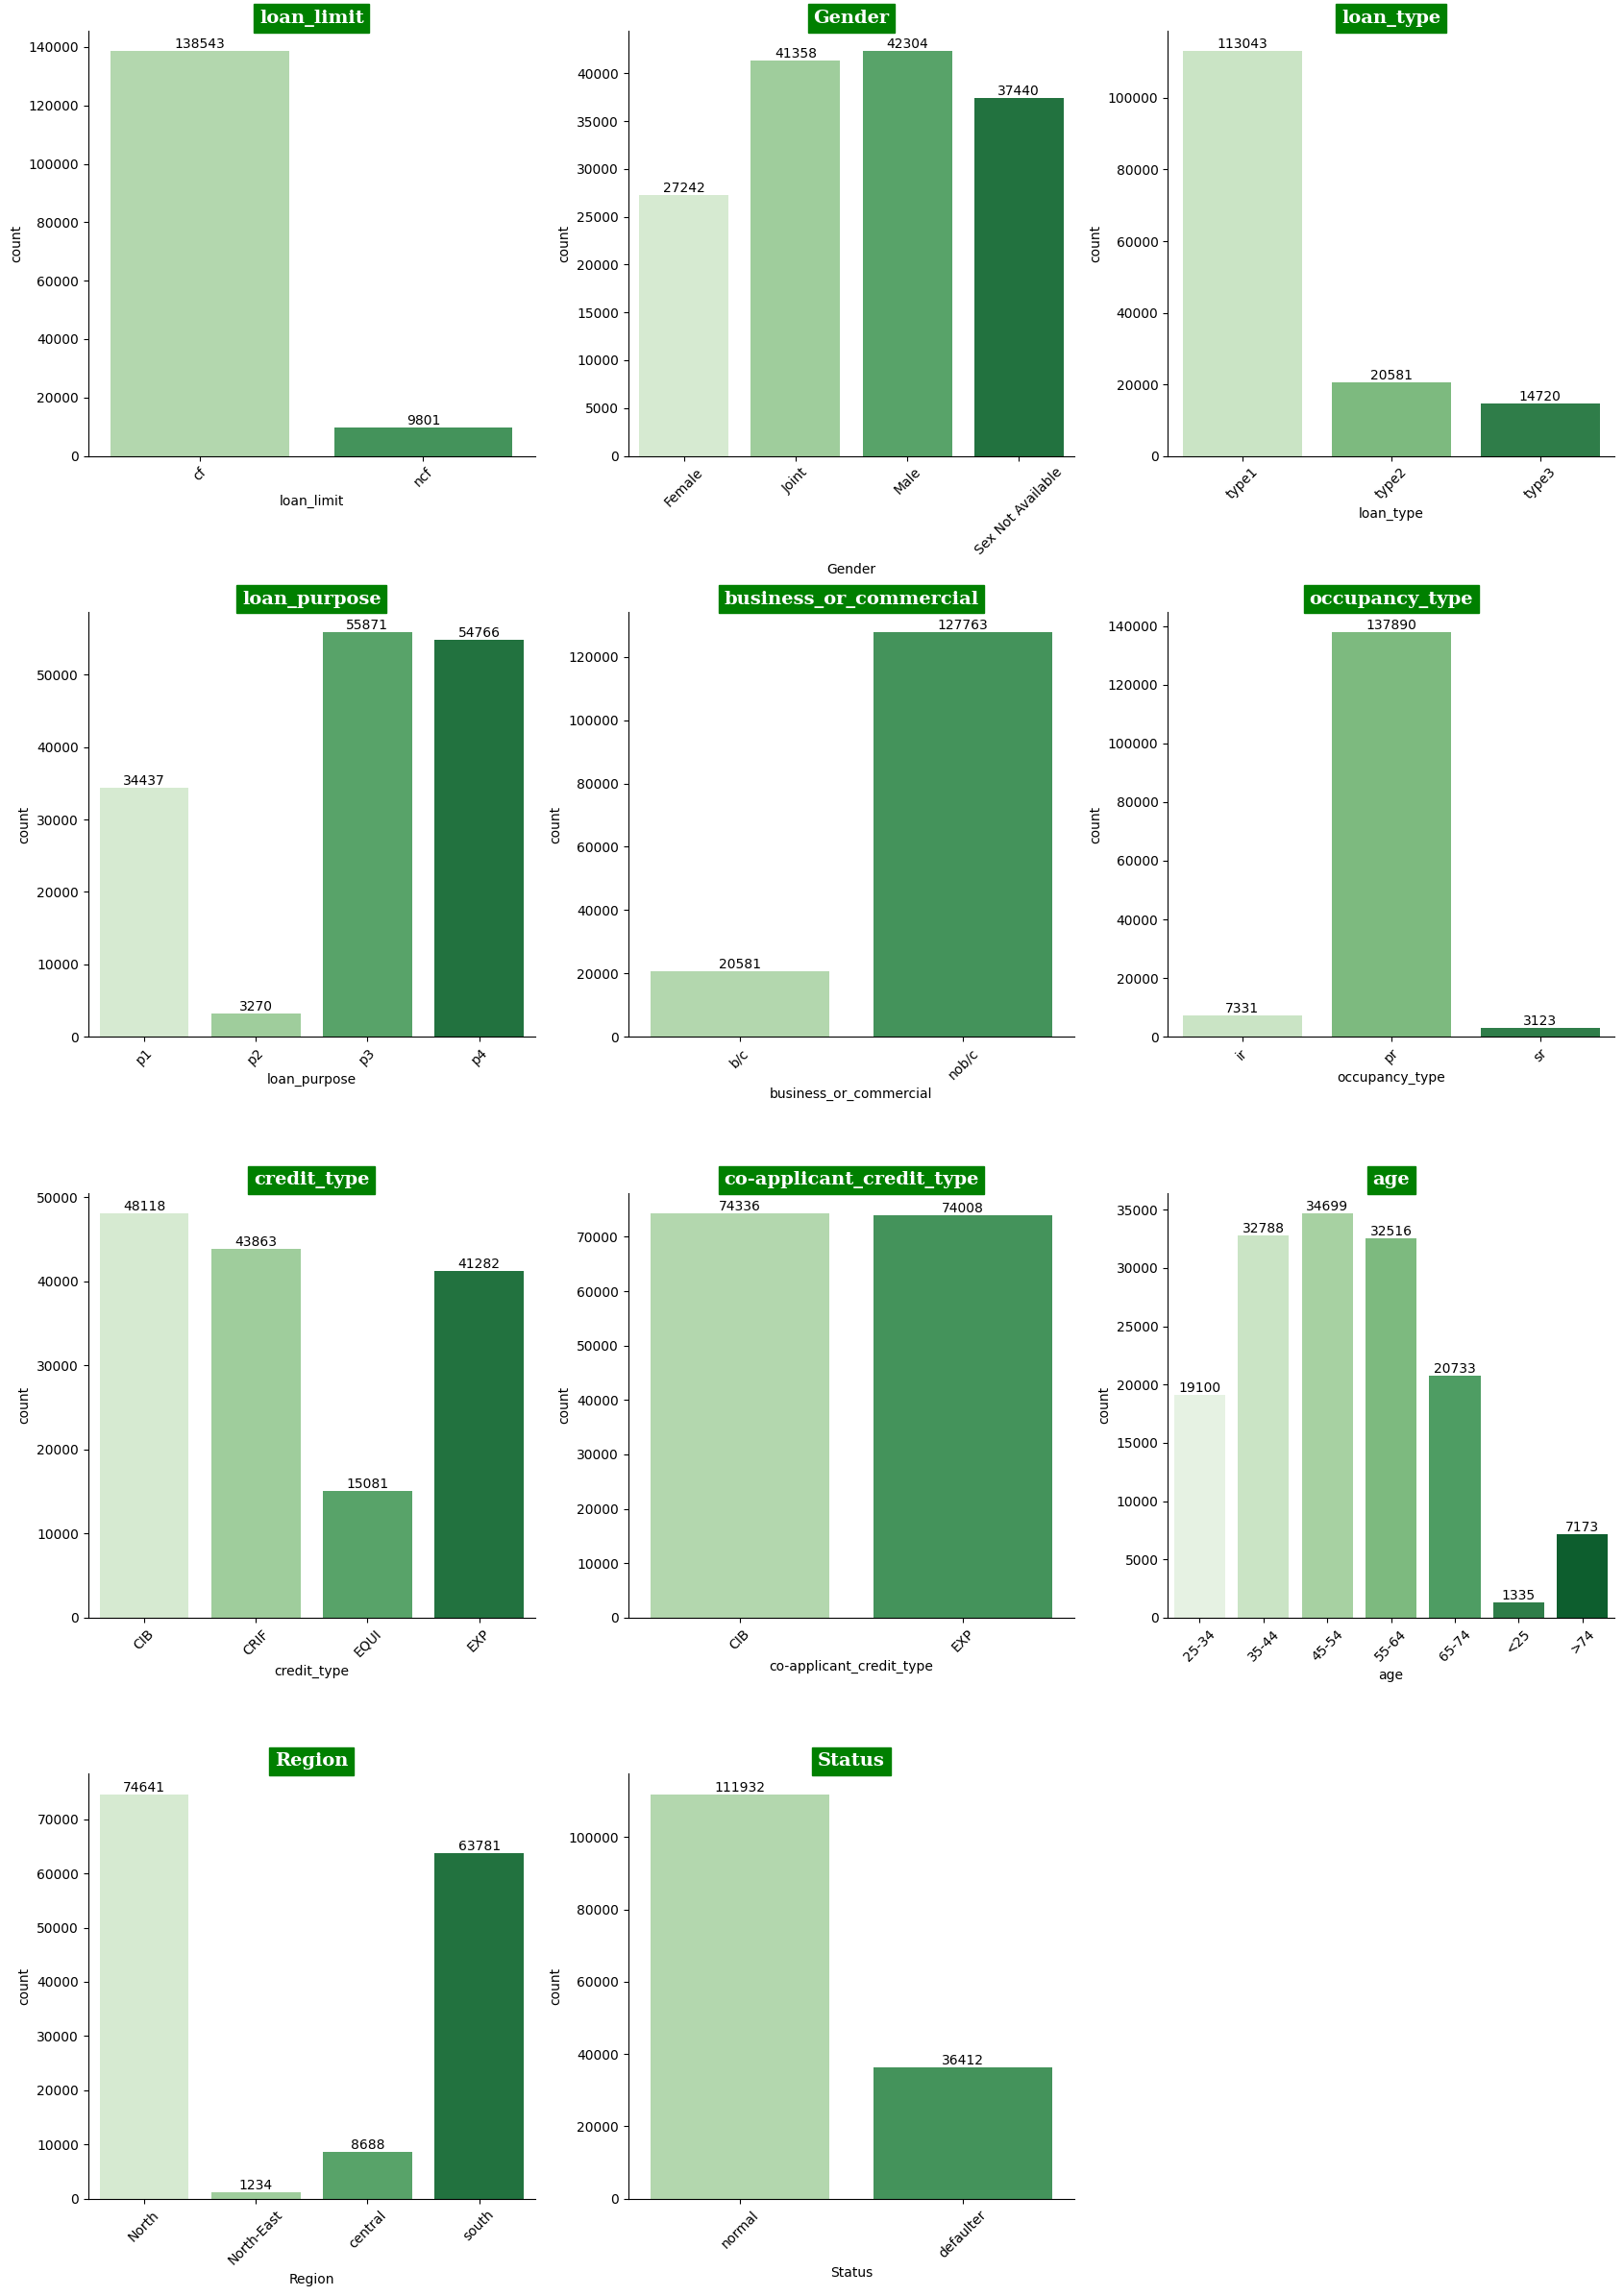

In [129]:
# Count Plots for Categorical features
plt.figure(figsize=(17,24))
for i, elem in enumerate(categorical_cols):
  plt.subplot(4,3,i+1)
  label = sns.countplot(data = df, x = elem, palette = 'Greens')
  for i in label.containers:
    label.bar_label(i)

  plt.xticks(rotation = 45)
  plt.ylabel('count')
  plt.title(elem, fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='green',color='w')

#plt.suptitle("Count Plots for Categorical features", fontsize = 18)
plt.tight_layout()
sns.despine()
plt.show()

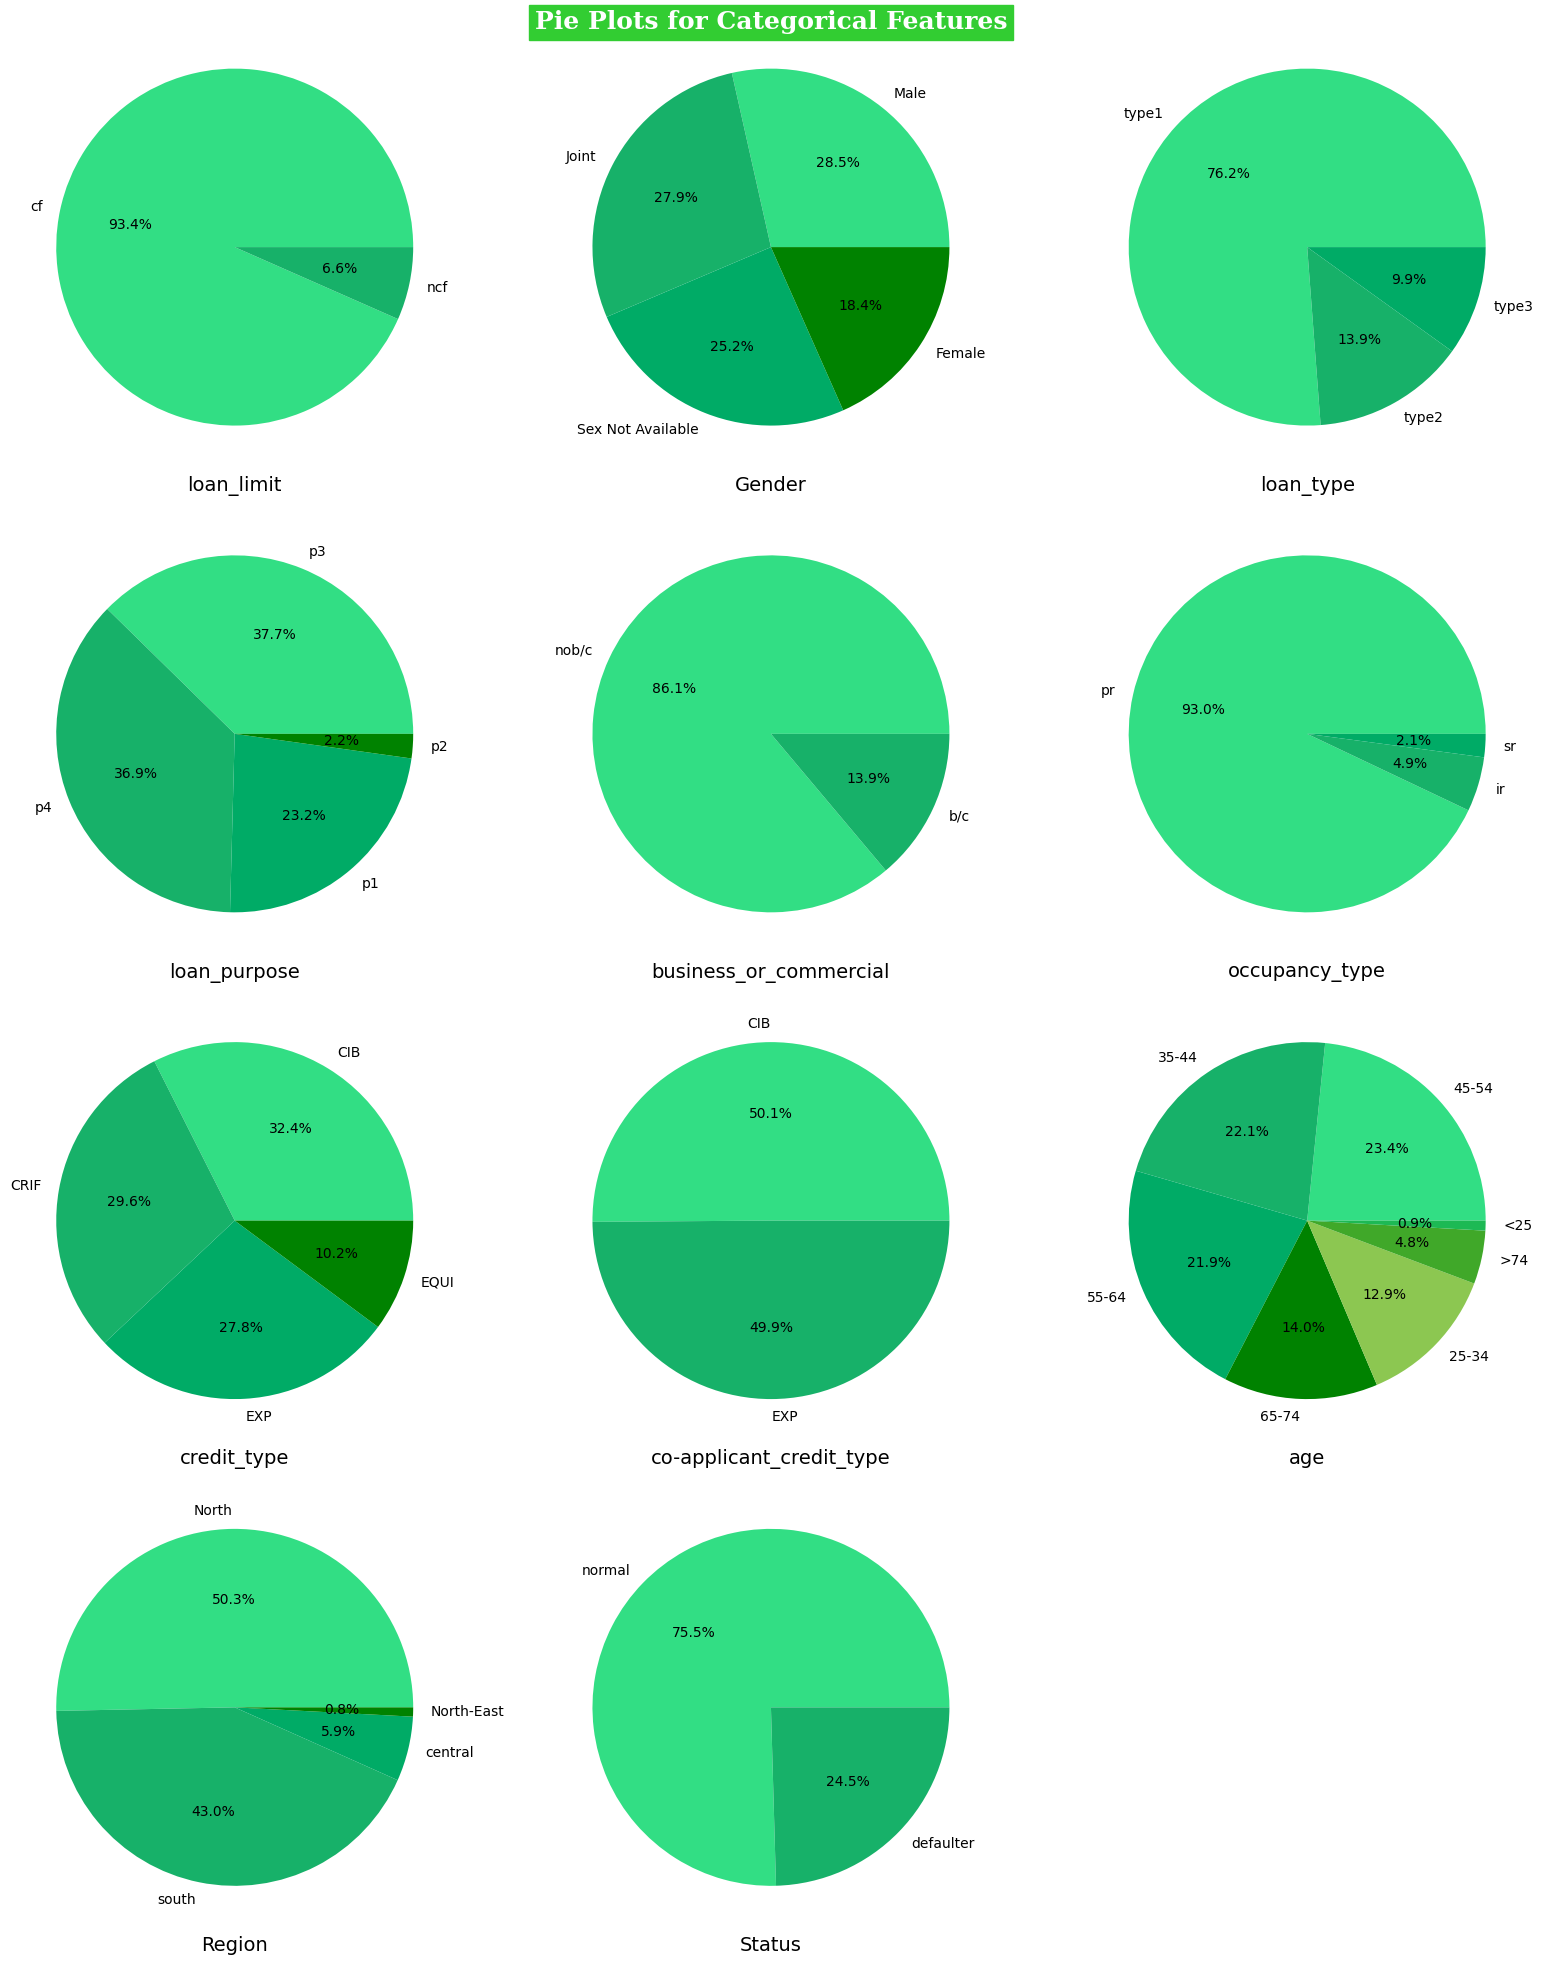

In [139]:
plt.figure(figsize=(16, 20))
for i, elem in enumerate(categorical_cols):
    plt.subplot(4, 3, i + 1)
    labels = df[elem].value_counts().index
    plt.pie(df[elem].value_counts().values, labels=labels, autopct="%1.1f%%", colors=green_palette)
    plt.xlabel(elem, fontsize=14)

plt.suptitle("Pie Plots for Categorical Features", fontsize=18, fontfamily='serif', fontweight='bold', backgroundcolor='limegreen', color='w')
plt.tight_layout()
plt.show()

**🤏🏽OBSERVATION**

1. **Loan Limit:**
    - 93.39% of loans have a limit classified as "cf" (conforming), while 6.61% are "ncf" (non-conforming).
    - The majority of loans fall under the conforming category, indicating a preference or higher eligibility for loans that meet standard criteria.
2. **Gender:**
    - Males represent 28.52%, Joint applicants 27.88%, "Sex Not Available" 25.24%, and Females 18.36%.
    - There is a near-even split between male and joint applications, with a relatively high number of cases where gender information is unavailable. Female applicants represent the smallest group.
3. **Loan Type:**
    - Type 1 dominates with 76.20%, followed by Type 2 (13.87%) and Type 3 (9.92%).
    - The vast majority of loans belong to loan type 1, showing a strong concentration in this category.
4. **Loan Purpose:**
    - Purposes p3 (37.66%) and p4 (36.92%) are nearly equal, followed by p1 (23.21%), with p2 (2.20%) being the least common.
    - The majority of loans are associated with purposes p3 and p4, indicating a focus on certain use cases for loans.
5. **Business or Commercial Use:**
    - 86.13% of loans are not for business or commercial use, while 13.87% are.
    - The data suggests that most loans are for personal or non-business purposes, with a small proportion allocated for commercial needs.
6. **Occupancy Type:**
    - Primary residences make up 92.95%, investment residences 4.94%, and secondary residences 2.11%.
    - The vast majority of loans are tied to primary residences, with investment and secondary residences making up only a small fraction.
7. **Credit Type:**
    - CIB (32.44%) and CRIF (29.57%) lead in credit type usage, followed by EXP (27.83%) and EQUI (10.17%).
    - The distribution of credit types is somewhat balanced, with CIB leading, but a significant portion of applicants also use CRIF and EXP.
8. **Co-applicant Credit Type:**
    - CIB (50.11%) and EXP (49.89%) are almost evenly split among co-applicants.
    - There is no significant preference for one credit type over the other when it comes to co-applicants.
9. **Age:**
    - The largest age group is 45-54 (23.39%), followed by 35-44 (22.10%) and 55-64 (21.92%). The under-25 age group makes up only 0.90%.
    - Most applicants fall within the middle-age range, particularly between 35 and 64. Younger and older age groups are underrepresented.
10. **Region:**
    - North leads with 50.32%, followed by South (43.00%), Central (5.86%), and North-East (0.83%).
    - The majority of applicants are from the North and South regions, with very few from the Central and North-East regions.
11. **Status:**
    - 75.45% of applicants are classified as "normal" (non-defaulters), while 24.55% are defaulters.
    - Most loans are in good standing, but with nearly a quarter of loans in default, there may be a need for risk mitigation strategies.


#### <font color=#17B169>**🔢Numerical Features**</font>

In [45]:
# Selecting the categorical columns
numerical_df = df.select_dtypes(include=['int64','float64'])
numerical_df_req = numerical_df[numerical_df.columns[2:]]
numerical_df_req.columns

Index(['loan_amount', 'rate_of_interest', 'Upfront_charges', 'property_value',
       'income', 'Credit_Score', 'LTV'],
      dtype='object')

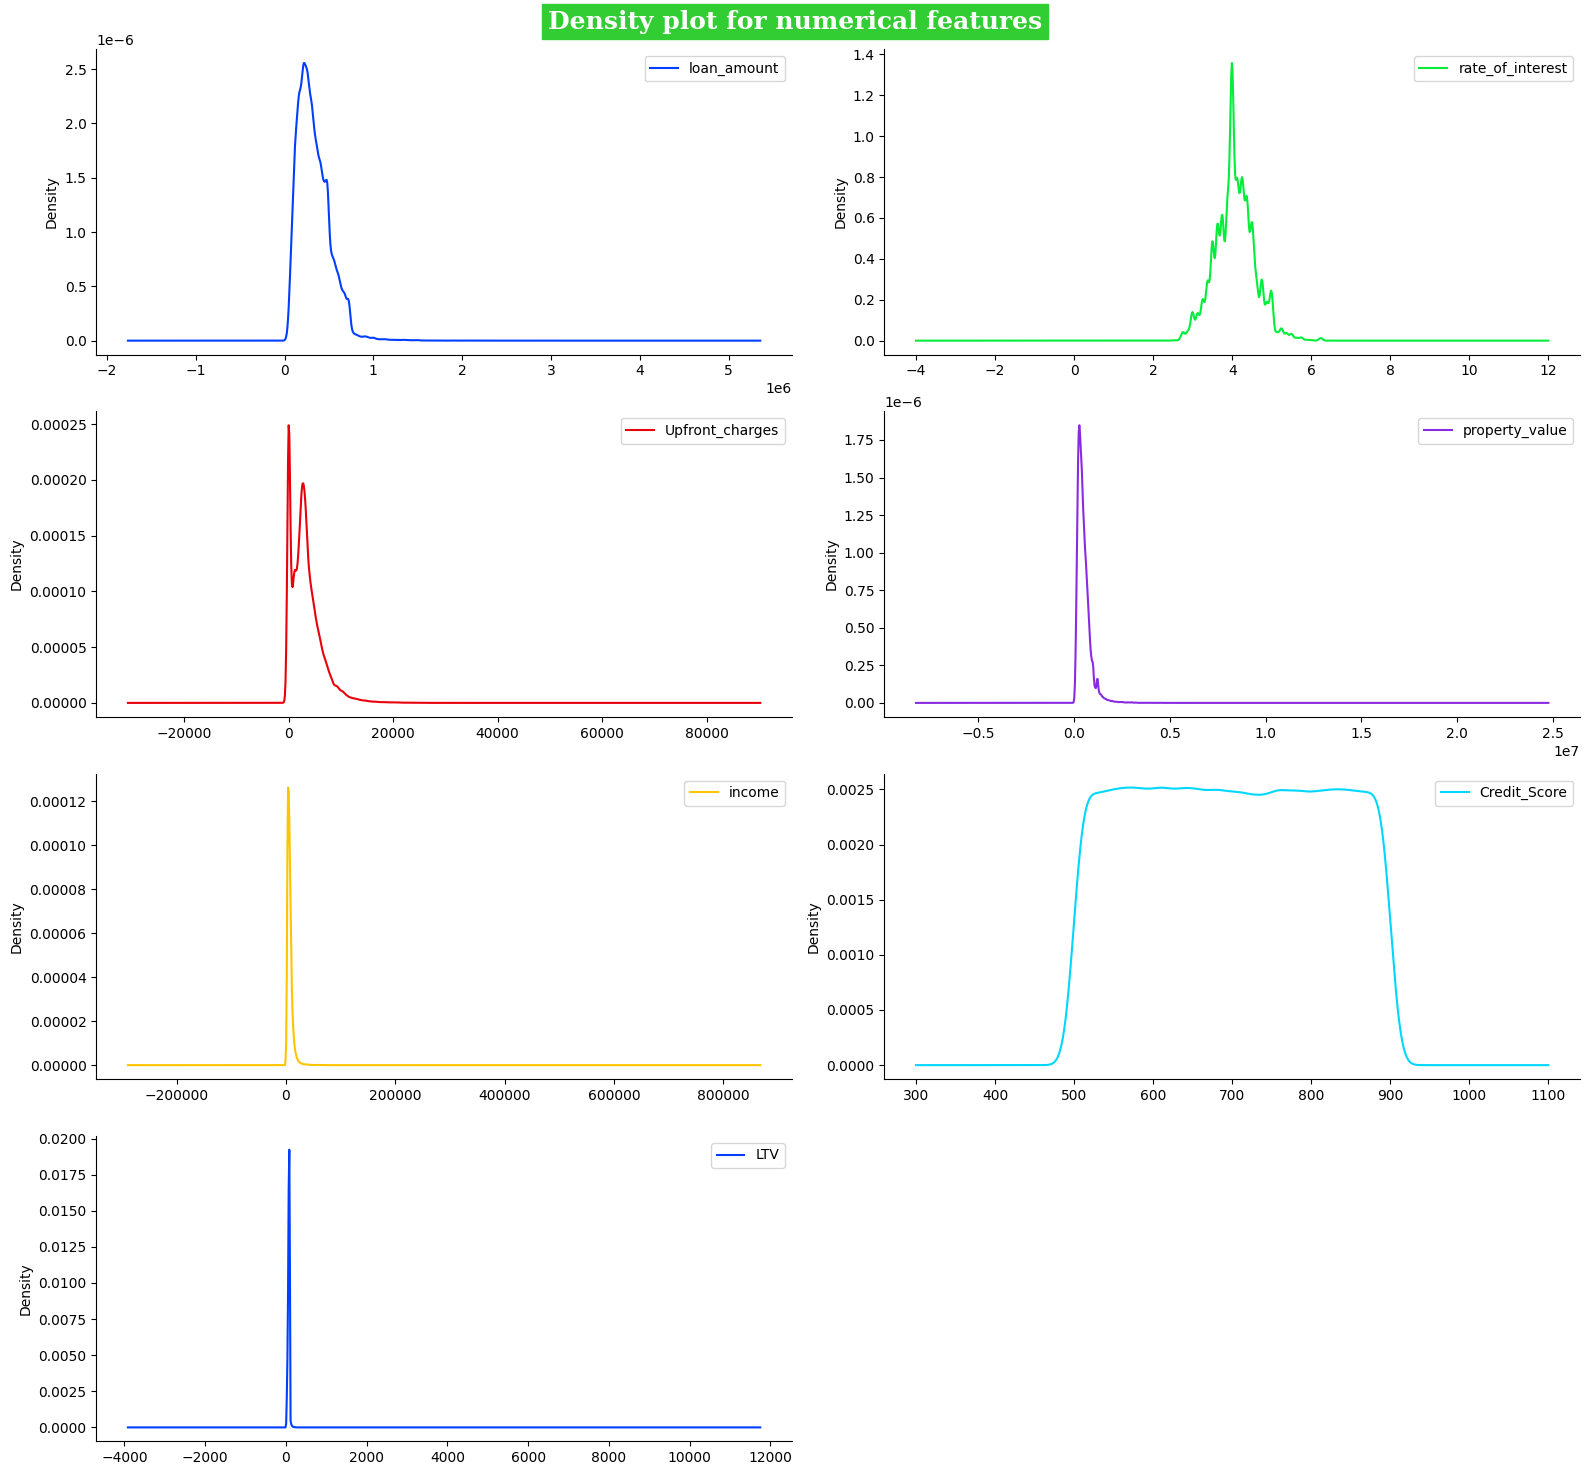

In [144]:
# Density plot for numerical columns
plt.rcParams["figure.figsize"] = [16,15]
numerical_df_req.plot(kind="density", subplots = True, layout = (4,2), sharex = False)
plt.suptitle("Density plot for numerical features", fontsize = 18,fontfamily='serif',fontweight='bold',backgroundcolor='limegreen',color='w')
plt.tight_layout()
sns.despine()
plt.show()

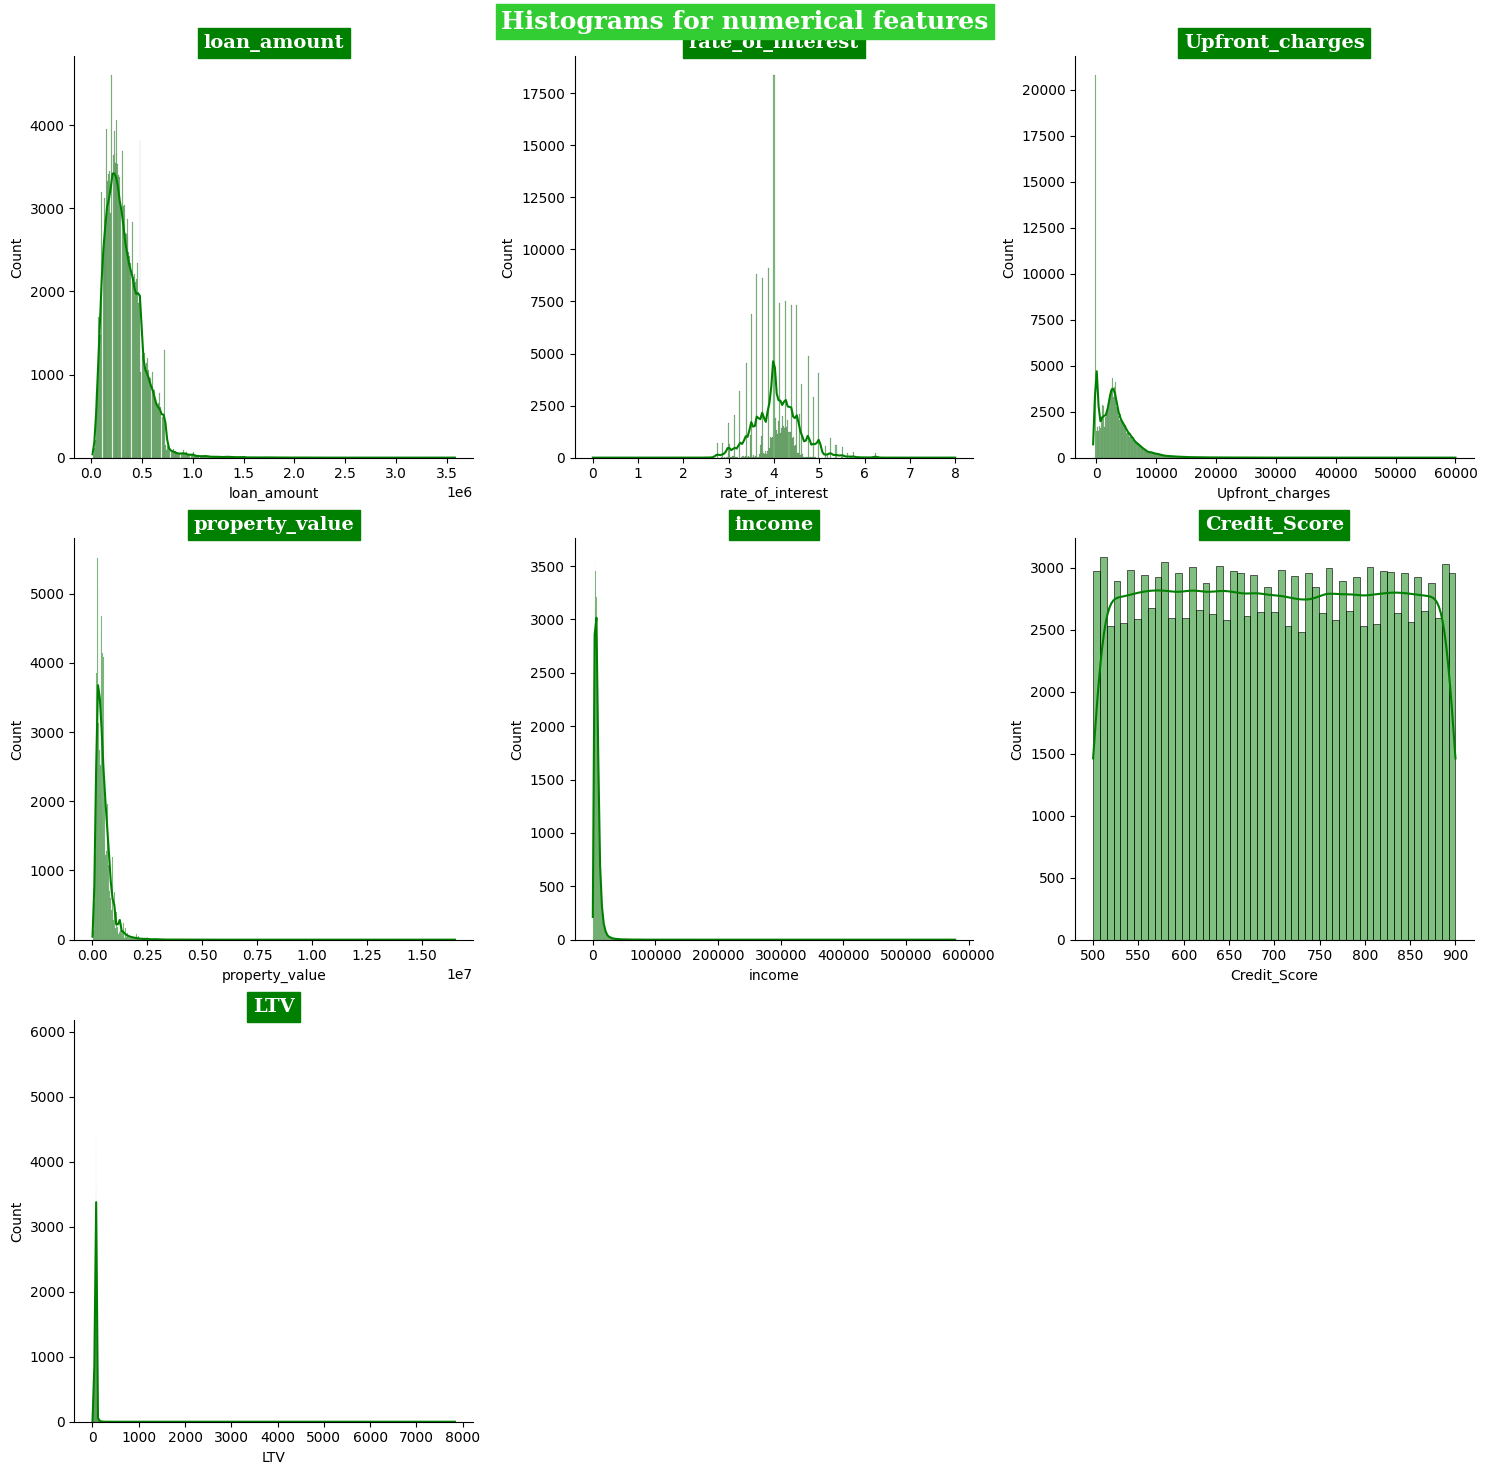

In [150]:
# Histograms for numerical columns
numerical_cols = numerical_df_req.columns

plt.figure(figsize=(15,15))
for i, elem in enumerate(numerical_cols):
  plt.subplot(3,3,i+1)
  sns.histplot(df[elem], kde=True, color='green')
  plt.title(elem, fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='green',color='w')

plt.suptitle("Histograms for numerical features", fontsize = 18,fontfamily='serif',fontweight='bold',backgroundcolor='limegreen',color='w')
plt.tight_layout()
sns.despine()
plt.show()

In [28]:
# Skewness Coefficient:
print("Skewness Coefficient")
print("-" * 20)
print(numerical_df_req.skew().round(2))

Skewness Coefficient
--------------------
loan_amount           1.67
rate_of_interest      0.27
Upfront_charges       1.83
property_value        4.25
income               17.58
Credit_Score          0.00
LTV                 110.53
dtype: float64


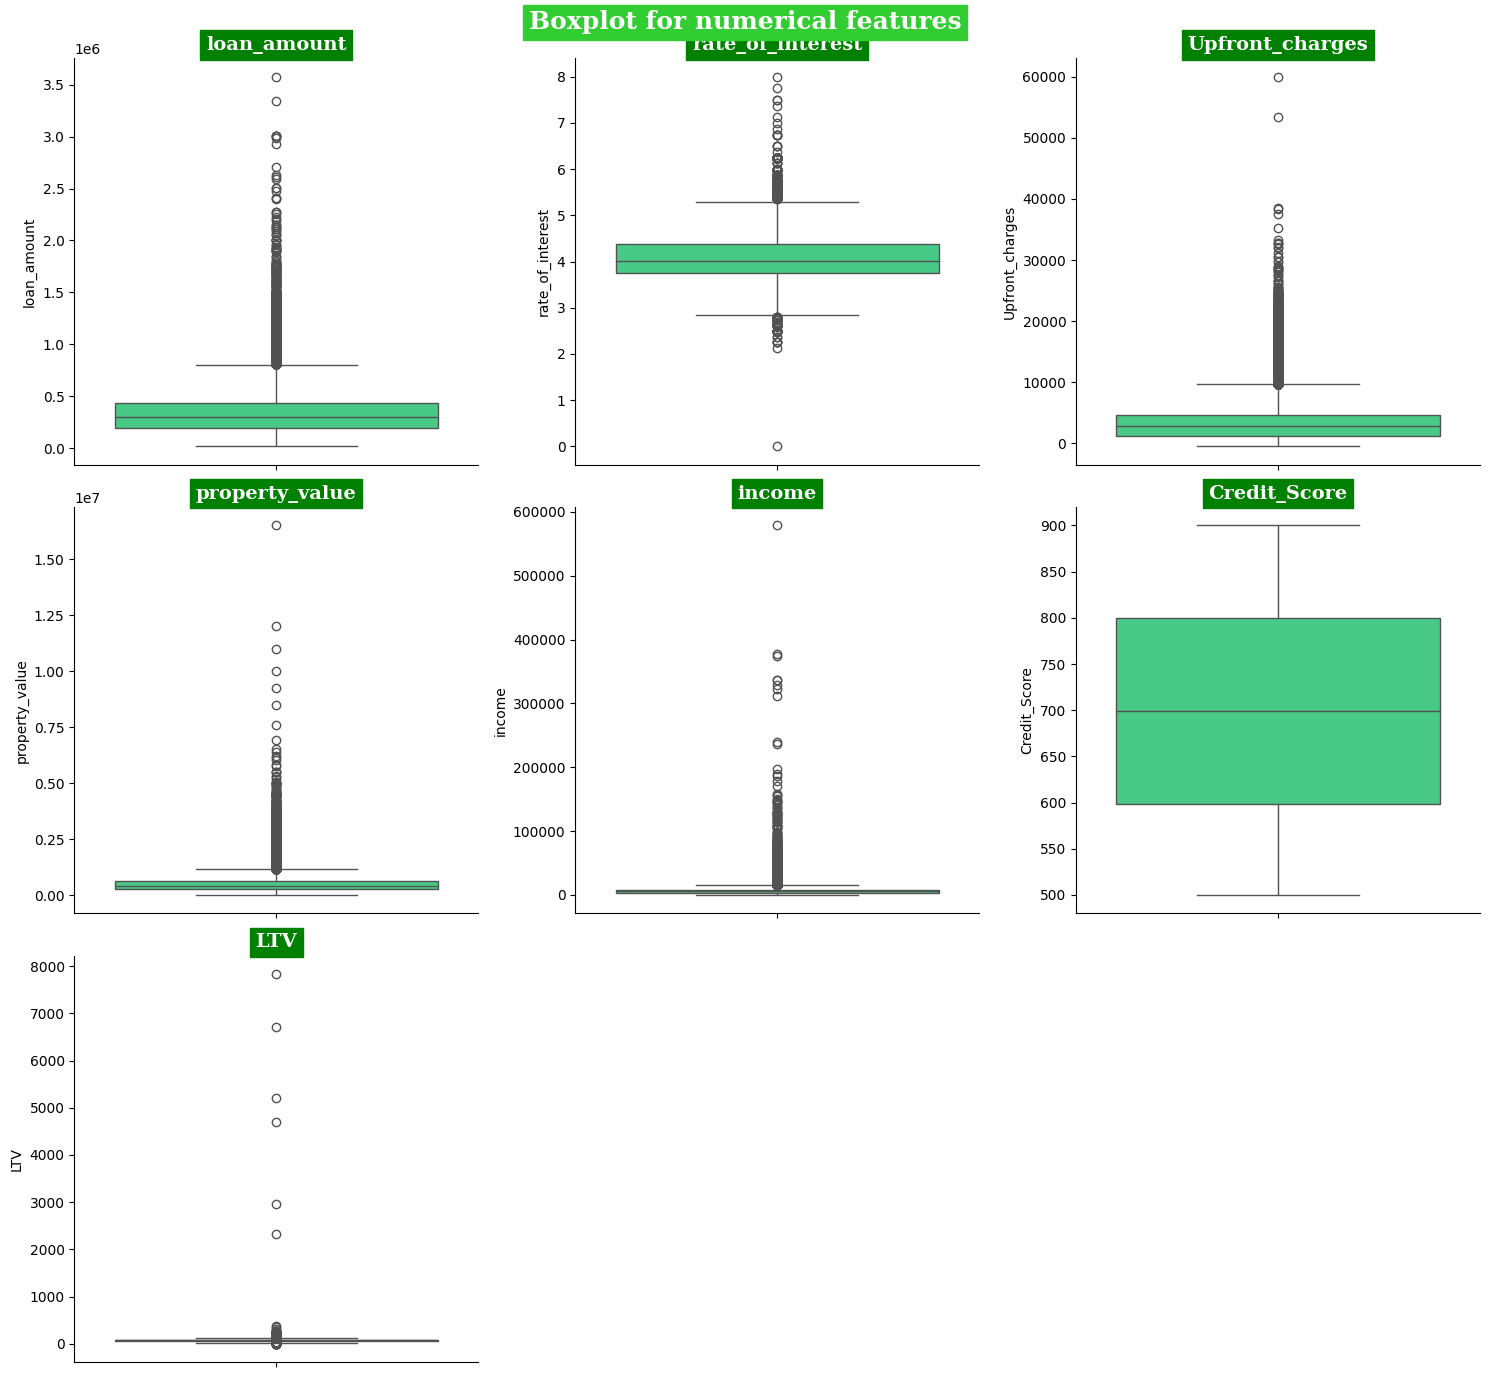

In [154]:
# Box plots for numerical columns
green = ['#32de84']

plt.figure(figsize=(15, 14))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col],palette = green)
    plt.title(col, fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='green',color='w')

plt.suptitle("Boxplot for numerical features", fontsize = 18,fontfamily='serif',fontweight='bold',backgroundcolor='limegreen',color='w')
plt.tight_layout()
sns.despine()
plt.show()

In [29]:
# kurtosis co-efficient:
print("kurtosis co-efficient")
print("-" * 22)
print(numerical_df_req.kurt().round(2))

kurtosis co-efficient
----------------------
loan_amount             9.14
rate_of_interest        0.88
Upfront_charges         7.73
property_value         65.53
income                921.50
Credit_Score           -1.20
LTV                 18399.87
dtype: float64


**🤏🏽OBSERVATION**
1. **Loan Amount**
    - Skewness: 1.67 (moderately skewed right)
    - Kurtosis: 9.14 (high kurtosis)
    - The loan amount distribution is positively skewed, indicating that there are more loans on the lower side of the spectrum, with fewer larger loans. The high kurtosis (9.14) suggests the presence of extreme outliers, where a small number of very large loans exist, significantly impacting the distribution.
2. **Rate of Interest**
    - Skewness: 0.30 (approximately symmetric)
    - Kurtosis: 0.87 (close to normal)
    - The rate of interest is close to a normal distribution, with very little skewness and kurtosis. This means the interest rates are evenly distributed around the mean, with few outliers or extremes.
3. **Upfront Charges**
    - Skewness: 1.85 (moderately skewed right)
    - Kurtosis: 8.17 (high kurtosis)
    - Upfront charges are positively skewed, indicating a concentration of smaller upfront charges with a few large outliers. The high kurtosis shows a fat-tailed distribution, meaning there are significant outliers or extreme values that stand out in the dataset.
4. **Property Value**
    - Skewness: 4.70 (highly skewed right)
    - Kurtosis: 77.97 (extremely high kurtosis)
    - Property values are highly positively skewed, with most properties being of lower value, and a few very high-value properties pulling the distribution to the right. The extreme kurtosis (77.97) indicates that there are some exceptionally high-value properties in the dataset, creating a long tail of outliers.
5. **Income**
    - Skewness: 17.51 (extremely skewed right)
    - Kurtosis: 916.59 (extremely high kurtosis)
    - Income is extremely right-skewed, with most borrowers having low incomes, but a small number of very high-income individuals pulling the distribution to the right. The incredibly high kurtosis indicates the presence of severe outliers, with some incomes being disproportionately large compared to the rest of the dataset.
6. **Credit Score**
    - Skewness: 0.00 (no skewness)
    - Kurtosis: -1.20 (platykurtic, less peaked than a normal distribution)
    - Credit score is symmetrically distributed, indicating that scores are spread evenly across the range. The negative kurtosis suggests that the distribution is flatter than a normal distribution, with fewer extreme values and less concentration around the mean.
7. **Loan-to-Value (LTV) Ratio**
    - Skewness: 108.81 (extremely skewed right)
    - Kurtosis: 18004.85 (extremely high kurtosis)
    - The LTV ratio shows an extreme positive skewness, with most LTV ratios being low but a few extremely high LTVs pulling the distribution to the right. The almost unimaginable kurtosis (18004.85) signifies that there are a handful of exceptionally high LTV ratios (close to or exceeding 100%), which may represent high-risk loans. This could be a potential area of concern for lenders as such loans carry higher default risks.



> <font color="green"><b>**🧐General Insights:**</font></b>

- **Outliers:** The high kurtosis values in variables like loan amount, upfront charges, property value, income, and LTV suggest the presence of significant outliers, which might need further investigation.

- **Skewness:** Most of the variables are positively skewed, meaning the bulk of the data lies on the lower end of the spectrum, with extreme values stretching out to the right.

- Credit Score is the only variable with no skewness and lower kurtosis, indicating a well-distributed, stable feature.

#### <font color=#00836c>**📉📊 Multivariate Analysis and Hypothesis Testing📉💹🧪**</font>

In [109]:
class StatisticalAnalysis:
    
    def __init__(self, group_1, group_1_name, group_2, group_2_name):
        self.group_1 = group_1
        self.group_1_name = group_1_name
        self.group_2 = group_2
        self.group_2_name = group_2_name

    def normality_plots(self):
        fig, axes = plt.subplots(2, 2, figsize=(14, 8))
        plt.suptitle("Normality check",fontsize=18,fontfamily='serif',fontweight='bold',backgroundcolor='green',color='w')

        # Histogram for group_1
        sns.histplot(data=self.group_1, kde=True, color='limegreen', ax=axes[0, 0])
        axes[0, 0].set_title(f'Histogram of {self.group_1_name}',fontsize=15,fontfamily='serif',fontweight='bold',backgroundcolor='limegreen',color='w')

        # Q-Q plot for group_1
        probplot(self.group_1, dist="norm", plot=axes[0, 1])
        axes[0, 1].set_title(f'Q-Q Plot of {self.group_1_name}',fontsize=15,fontfamily='serif',fontweight='bold',backgroundcolor='limegreen',color='w')

        # Histogram for group_2
        sns.histplot(data=self.group_2, kde=True, color='green', ax=axes[1, 0])
        axes[1, 0].set_title(f'Histogram of {self.group_2_name}',fontsize=15,fontfamily='serif',fontweight='bold',backgroundcolor='limegreen',color='w')

        # Q-Q plot for group_2
        probplot(self.group_2, dist="norm", plot=axes[1, 1])
        axes[1, 1].set_title(f'Q-Q Plot of {self.group_2_name}',fontsize=15,fontfamily='serif',fontweight='bold',backgroundcolor='limegreen',color='w')

        plt.tight_layout()
        sns.despine()
        plt.show()

    def normality_tests(self):
        def perform_normality_tests(data, name):
            # Shapiro-Wilk Test
            shapiro_stat, shapiro_p_val = shapiro(data)
            shapiro_result = 'Gaussian distribution' if shapiro_p_val >= 0.05 else 'Not Gaussian distribution'

            # Anderson-Darling Test
            anderson_result = anderson(data, dist='norm')
            anderson_stat = anderson_result.statistic
            anderson_critical_values = anderson_result.critical_values
            anderson_test_result = 'Not Gaussian distribution'
            for i in range(len(anderson_critical_values)):
                if anderson_stat < anderson_critical_values[i]:
                    anderson_test_result = 'Gaussian distribution'
                    break

            # Jarque-Bera Test
            jb_stat, jb_p_val = jarque_bera(data)
            jb_result = 'Gaussian distribution' if jb_p_val >= 0.05 else 'Not Gaussian distribution'

            # Print results
            print(f'Normality Tests for {name}:')
            print(f'- Shapiro-Wilk Test: Statistics={shapiro_stat:.4f}, p-value={shapiro_p_val:.4f} => {shapiro_result}')
            print(f'- Anderson-Darling Test: Statistic={anderson_stat:.4f}, Critical Values={anderson_critical_values} => {anderson_test_result}')
            print(f'- Jarque-Bera Test: Statistics={jb_stat:.4f}, p-value={jb_p_val:.4f} => {jb_result}')
            print()

        # Normality tests on the original groups
        perform_normality_tests(self.group_1, self.group_1_name)
        perform_normality_tests(self.group_2, self.group_2_name)

        # Box-Cox transformation (only applicable for positive data)
        try:
            transformed_group_1, _ = boxcox(self.group_1)
            transformed_group_2, _ = boxcox(self.group_2)

            print("After Box-Cox Transformation:")
            perform_normality_tests(transformed_group_1, f'Transformed {self.group_1_name}')
            perform_normality_tests(transformed_group_2, f'Transformed {self.group_2_name}')
        except Exception as e:
            print("Box-Cox transformation failed:", e)
            print()

    def variance_tests(self):
        # Levene's Test (tests for equal variances)
        levene_stat, levene_p = levene(self.group_1, self.group_2)
        print(f"Levene's Test for {self.group_1_name} and {self.group_2_name}:")
        print(f'- Statistic: {levene_stat:.4f}, p-value: {levene_p:.4f}')
        if levene_p < 0.05:
            print(f"Variances of {self.group_1_name} and {self.group_2_name} are significantly different.\n")
        else:
            print(f"Variances of {self.group_1_name} and {self.group_2_name} are approximately equal.\n")

        # Bartlett's Test (tests for equal variances)
        bartlett_stat, bartlett_p = bartlett(self.group_1, self.group_2)
        print(f"Bartlett's Test for {self.group_1_name} and {self.group_2_name}:")
        print(f'- Statistic: {bartlett_stat:.4f}, p-value: {bartlett_p:.4f}')
        if bartlett_p < 0.05:
            print(f"Variances of {self.group_1_name} and {self.group_2_name} are significantly different.")
        else:
            print(f"Variances of {self.group_1_name} and {self.group_2_name} are approximately equal.")


# analysis = StatisticalAnalysis(group_1, "Group 1", group_2, "Group 2")
# analysis.normality_plots()  # Plot histograms and Q-Q plots
# analysis.normality_tests()  # Perform normality tests
# analysis.variance_tests()   # Perform variance tests


In [52]:
# Function for Chi_Square Test
from scipy.stats import chi2_contingency

def ht_Chi_Square(column, alpha = 0.05):
  # Assumption:
  '''
  # Ho: (Independent) Columns are not Dependent
  # Ha: (Dependent) Columns are Dependent

  Chi-square independence test
  '''
  observed = pd.crosstab(index=df[column], columns=df["Status"]).values
  # Calculate Stastistics and p-value:
  chi_stat, p_value, dof, exp_freq = chi2_contingency(observed)

  # Conclusion:
  #alpha = 0.05
  if p_value < alpha:
      decision = "Reject the null hypothesis"
  else:
      decision = "Fail to reject the null hypothesis"

  if decision == "Reject the null hypothesis":
      conclusion = f"{column} and Status are Dependent"
  else:
      conclusion = f"{column} and Status are not Dependent"

  # Print the results
  print(f"CONCLUSION: {conclusion}")
  return None

In [53]:
# Function for Fisher_exact Test
from scipy.stats import fisher_exact

def ht_fisher_exact(column, alpha=0.05):
    # Assumption:
    '''
    # Ho: (Independent) Columns are not Dependent
    # Ha: (Dependent) Columns are Dependent

    Fisher's Exact Test for independence
    '''
    # Create a contingency table
    observed = pd.crosstab(index=df[column], columns=df["Status"])

    # Check if the contingency table is suitable for Fisher's Exact Test
    if observed.shape[0] < 2 or observed.shape[1] < 2:
        print("Fisher's Exact Test is not applicable for this table.")
        return None

    # If the table is not 2x2, you can either:
    # 1. Combine categories, or
    # 2. Just take the first two categories for testing.
    if observed.shape[0] > 2:
        # Example: Combine all but the first two categories
        combined = observed.iloc[:2].copy()
        combined.loc['Combined'] = observed.iloc[2:].sum()
        observed = combined

    if observed.shape[0] > 2 or observed.shape[1] > 2:
        print("Resulting contingency table must be 2x2 for Fisher's Exact Test.")
        return None

    # Calculate the statistics and p-value:
    odds_ratio, p_value = fisher_exact(observed)

    # Conclusion:
    # alpha = 0.05
    if p_value < alpha:
        decision = "Reject the null hypothesis"
    else:
        decision = "Fail to reject the null hypothesis"

    if decision == "Reject the null hypothesis":
        conclusion = f"{column} and Status are Dependent"
    else:
        conclusion = f"{column} and Status are not Dependent"

    # Print the results
    print(f"CONCLUSION: {conclusion}")
    #print(f"P-value: {p_value}, Odds Ratio: {odds_ratio}")
    return None

In [54]:
# Function for Mann-Whitney U test
from scipy.stats import mannwhitneyu

def mannwhitneyu_u_test(group_1, group_1_name, group_2, group_2_name, alternative='two-sided'):
    # Formulate Hypotheses two-sided
    # H0: The mean of two groups are equal
    # H1: The mean of two groups are different

    # Formulate Hypotheses greater
    # H0: There is no difference (in terms of central tendency) between two groups
    # H1: The central tendency of group_1 is greater than group_2

    # Formulate Hypotheses less
    # H0: There is no difference (in terms of central tendency) between two groups
    # H1: The central tendency of group_1 is less than group_2

    # Choose the significance level
    alpha = 0.05

    # Perform Mann-Whitney U test
    test_stat, p_value = mannwhitneyu(group_1, group_2, alternative=alternative)

    print(f"Mann-Whitney U test: ({alternative})")
    if alternative == 'two-sided':
        if p_value < alpha:
            print(f'There is a difference (with respect to the central tendency) between {group_1_name} and {group_2_name}.')
        else:
            print(f'There is no difference (in terms of central tendency) between {group_1_name} and {group_2_name}')

    elif alternative == 'greater':
        if p_value < alpha:
            print(f'The central tendency of {group_1_name} is greater than {group_2_name}.')
        else:
            print(f'There is no difference (in terms of central tendency) between {group_1_name} and {group_2_name}')

    elif alternative == 'less':
        if p_value < alpha:
            print(f'The central tendency of {group_1_name} is less than {group_2_name}.')
        else:
            print(f'There is no difference (in terms of central tendency) between {group_1_name} and {group_2_name}')

    return None

In [55]:
# Function for single bar plot:
def single_bar_chart(column, dodge=True):
  label = sns.countplot(data=df, x=column, hue='Status', palette = 'Greens', dodge=dodge)
  for i in label.containers:
    label.bar_label(i)
  #plt.xticks(rotation=45)
  plt.title(f"{column} vs. Status",fontsize = 15,fontfamily='serif',fontweight='bold',backgroundcolor='limegreen',color='w')
  sns.despine()
  plt.show()
  return None

## <font color=#17B169>**Hypothesis Testing**</font>
### <font color=#17B169>**Categorical Features**</font>

##### <font color=#32de84>**LTV_range Vs Status**</font>

In [56]:
# Define the bin edges and corresponding labels
ltv_bins = [-float('inf'), 100, 200, 1000, float('inf')]  # Bin edges
ltv_ranges = ['<100', '100-200', '200-1000', '>=1000']    # Bin labels

# Create a new column 'LTV_range' by binning 'LTV' values into the specified ranges
df['LTV_range'] = pd.cut(df['LTV'], bins=ltv_bins, labels=ltv_ranges, right=False)

In [57]:
df['LTV_range'].value_counts()

<100        144355
100-200       3883
200-1000       100
>=1000           6
Name: LTV_range, dtype: int64

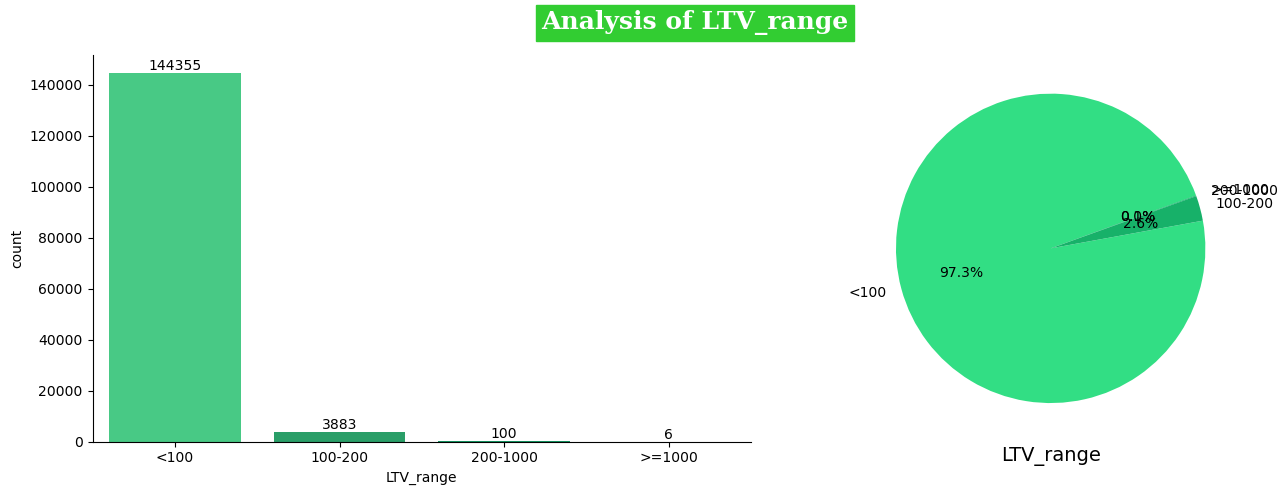

In [58]:
# Analysis of income_category
req_palette = ['#32de84', '#008200']

plt.figure(figsize=(14, 5))

plt.subplot(121)
label = sns.countplot(data=df, x='LTV_range', palette=green_palette)
for i in label.containers:
  label.bar_label(i)
#plt.title("income_category")

plt.subplot(122)
labels = df.groupby('LTV_range')['LTV_range'].count().index.categories
plt.pie(df.groupby('LTV_range')['LTV_range'].count().values, labels = labels, autopct = "%1.1f%%", colors=green_palette,startangle=20)
plt.xlabel('LTV_range', fontsize=14)
#plt.title("income_category")

plt.suptitle("Analysis of LTV_range", fontsize = 18,fontfamily='serif',fontweight='bold',backgroundcolor='limegreen',color='w')
plt.tight_layout()
sns.despine()
plt.show()

**🤏🏽OBSERVATION**

**Distribution of LTV Range:**
* (<100): The majority of loans (143,226 loans) have an LTV ratio of less than 100%, indicating that borrowers generally have more equity in the property than the loan amount.
* (100-200): A small portion (4,992 loans) falls into the 100-200% LTV range, where the loan amount exceeds the property value, indicating higher risk.
* (200-1000): Only 120 loans have an LTV in the range of 200-1000%, signifying extreme cases where the loan amount is significantly higher than the property value.
* (>=1000): Very few loans (6 loans) have an LTV ratio greater than 1000%, which is a rare and extremely high-risk situation.

> <font color=#0BDA51>**HT: Chi-Square Test of Independence**</font>

In [59]:
pd.crosstab(index=df['LTV_range'], columns=df["Status"])

Status     normal  defaulter
LTV_range                   
<100       111305      33050
100-200       621       3262
200-1000        1         99
>=1000          5          1

**Issues Identified:**

- **Chi-Square Assumptions:** The Chi-Square test assumes that the expected frequency in each cell should be 5 or more. In your case, the LTV ranges "200-1000" and ">=1000" may have expected frequencies that are too low.

- **Fisher's Exact Test:** This test requires a 2x2 contingency table, which is not applicable here since your table has more than 2 categories for LTV_range.

**Recommended Approach:**

Since the Chi-Square test may not be valid due to low expected frequencies, and Fisher’s Exact Test cannot be applied, consider the following steps:

**Combine Categories**

- Combine some of the LTV ranges into broader categories to ensure that each category has sufficient observations. For example:

- Combine 200-1000, and >=1000 into a single category called High LTV or simply >=200.

In [60]:
# Combain 200-1000, and >=1000
observed = pd.crosstab(index=df['LTV_range'], columns=df["Status"])
combined = observed.iloc[:2].copy()
combined.loc['Combined'] = observed.iloc[2:].sum()
observed = combined
observed

Status     normal  defaulter
LTV_range                   
<100       111305      33050
100-200       621       3262
Combined        6        100

In [61]:
# Assumption:
'''
# Ho: (Independent) Columns are not Dependent
# Ha: (Dependent) Columns are Dependent

Chi-square independence test
'''
# Calculate Stastistics and p-value:
chi_stat, p_value, dof, exp_freq = chi2_contingency(observed)

# Conclusion:
alpha = 0.05
if p_value < alpha:
    decision = "Reject the null hypothesis"
else:
    decision = "Fail to reject the null hypothesis"

if decision == "Reject the null hypothesis":
    conclusion = "LTV_range and Status are Dependent"
else:
    conclusion = "LTV_range and Status are not Dependent"

# Print the results
print(f"CONCLUSION: {conclusion}")

CONCLUSION: LTV_range and Status are Dependent


**🤏🏽OBSERVATION**
- The result of the Chi-Square test indicates that there is a statistically significant relationship between the Loan-to-Value (LTV) range and the loan status (normal vs. defaulter). This suggests that the likelihood of default is influenced by the LTV range of the loans.

> <font color=#0BDA51>**Analysis**</font>

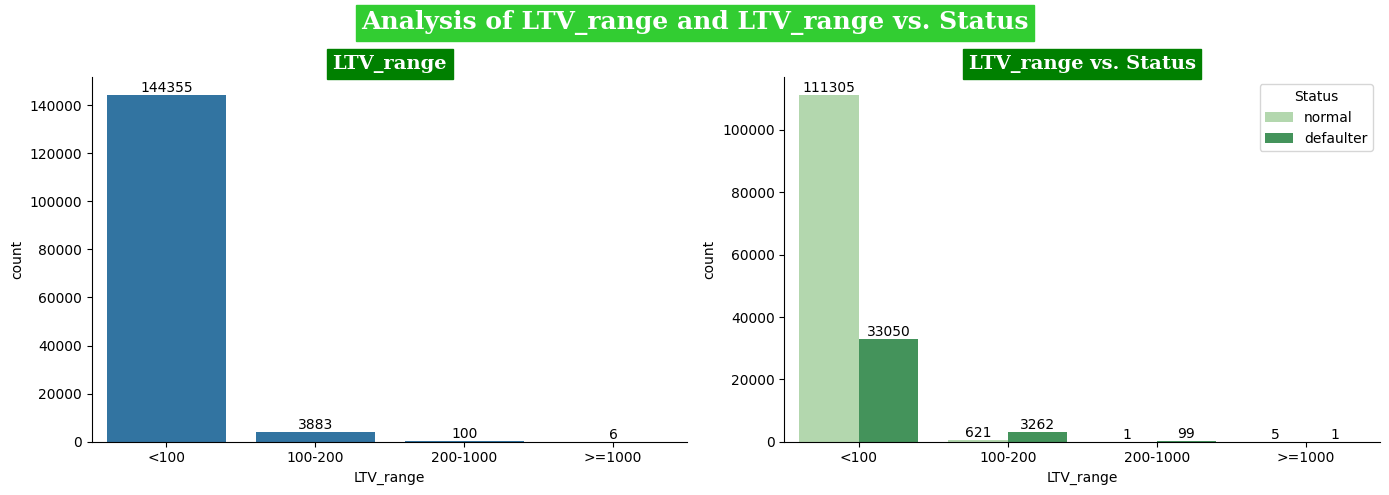

In [66]:
# Analysis of LTV_range and LTV_range vs. Status
req_palette = ['#32de84', '#008200']

plt.figure(figsize=(14, 5))

plt.subplot(121)
label = sns.countplot(data=df, x='LTV_range')
for i in label.containers:
  label.bar_label(i)
plt.title("LTV_range",fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='green',color='w')

plt.subplot(122)
label = sns.countplot(data=df, x='LTV_range',hue='Status', palette='Greens')
for i in label.containers:
  label.bar_label(i)
plt.title("LTV_range vs. Status",fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='green',color='w')

plt.suptitle("Analysis of LTV_range and LTV_range vs. Status", fontsize = 18,fontfamily='serif',fontweight='bold',backgroundcolor='limegreen',color='w')
plt.tight_layout()
sns.despine()
plt.show()

**🤏🏽OBSERVATION**

**LTV Distribution Based on Loan Status (Normal vs Defaulter):**

1. **<100 LTV Range:**

    - Normal: 111,306 loans are in "normal" status.
    - Defaulter: 31,920 loans are in default status.
    - Although most loans with LTV < 100 are performing well, a notable 22% of them (31,920) are in default. This suggests that even loans with sufficient equity (LTV < 100) can face default risks, perhaps due to other factors like borrower income, economic conditions, etc.

2. **100-200 LTV Range:**

    - Normal: 620 loans are performing normally.
    - Defaulter: 4,372 loans are in default.
    - A significant majority (87.6%) of loans in the 100-200% LTV range are in default, indicating that loans where the borrower owes more than the property value (LTV > 100) are highly likely to default. This is a key risk area for lenders.

3. **200-1000 LTV Range:**

    - Normal: Only 1 loan is performing normally.
    - Defaulter: 119 loans are in default.
    - Almost all loans with LTV between 200 and 1000% are in default (99.17%), showing that excessively high LTV ratios lead to an extremely high risk of default. Borrowers in this range are clearly overleveraged, and the loans are unsustainable.

4. **>=1000 LTV Range:**

    - Normal: 5 loans are performing normally.
    - Defaulter: 1 loan is in default.
    - While this range is rare, the fact that 5 out of 6 loans are still performing normally is surprising. However, given the extremely high LTV, these loans pose a very high risk of future default.


**Key Insights and Observations:**

1. **LTV < 100 is Relatively Safe but Not Risk-Free:**

    - The majority of loans with LTV < 100 are performing well, but a significant portion (22%) is in default. This suggests that low LTV alone is not sufficient to guarantee loan performance, and other factors (e.g., borrower income, credit score) also play a role in default risk.

2. **LTV > 100 is a Red Flag:**

    - As LTV increases above 100, the risk of default skyrockets. Specifically.
    - 87.6% of loans with LTV between 100 and 200 are in default.
    - Almost 100% of loans with LTV between 200 and 1000 are in default.
    - This shows that when the loan amount exceeds the property value, borrowers are significantly more likely to default, making these high LTV loans extremely risky for lenders.

3. **Extreme LTVs (>1000):**

    - Though rare, LTVs over 1000 represent an exceptional risk. It’s notable that 5 out of 6 of these loans are still performing, but this situation is unsustainable, and these loans are likely at high risk of future default.


**🕵🏽Insights:**

- Lenders should be cautious in approving loans where LTV exceeds 100, as these loans are prone to default. Special attention should be given to loans with LTV > 200, as they are almost guaranteed to default.

- Implementing stricter lending criteria and focusing on other factors such as income, credit score, and property value for high-LTV loans could help mitigate risks.

In [62]:
# Details about the people with Extreamly high LTV
Extrem_LTV = df[df['LTV_range'] == '>=1000']
Extrem_LTV

ID  year loan_limit  Gender loan_type loan_purpose  \
16951    41841  2019        ncf   Joint     type2           p4   
46287    71177  2019         cf   Joint     type2           p4   
47807    72697  2019         cf   Joint     type2           p4   
55286    80176  2019         cf   Joint     type2           p4   
65238    90128  2019         cf   Joint     type2           p4   
123343  148233  2019         cf  Female     type2           p4   

       business_or_commercial  loan_amount  rate_of_interest  Upfront_charges  \
16951                     b/c       626500          3.875000         0.000000   
46287                     b/c       236500          4.264607       747.276955   
47807                     b/c       416500          3.500000         0.000000   
55286                     b/c       536500          3.750000         0.000000   
65238                     b/c       376500          3.750000         0.000000   
123343                    b/c       186500          3.990000         0.000000   

        property_value occupancy_type       income credit_type  Credit_Score  \
16951           8000.0             pr  2723.837061         CIB           522   
46287           8000.0             pr  1918.894080        CRIF           724   
47807           8000.0             pr  2619.568286         EXP           571   
55286           8000.0             pr  2741.123853        CRIF           591   
65238           8000.0             pr  2741.123853         CIB           691   
123343          8000.0             pr  2662.635181         CIB           826   

       co-applicant_credit_type    age      LTV Region     Status LTV_range  
16951                       EXP  65-74  7831.25  south     normal    >=1000  
46287                       EXP  45-54  2956.25  south  defaulter    >=1000  
47807                       EXP  35-44  5206.25  North     normal    >=1000  
55286                       EXP  45-54  6706.25  North     normal    >=1000  
65238                       EXP  45-54  4706.25  south     normal    >=1000  
123343                      CIB  45-54  2331.25  North     normal    >=1000

In [63]:
# Display the statistical summary for Extreamly high LTV
print("statistical summary:")
print("-" * 20)
Extrem_LTV.describe().T

statistical summary:
--------------------


count           mean            std           min  \
ID                  6.0   84042.000000   35348.582670   41841.00000   
year                6.0    2019.000000       0.000000    2019.00000   
loan_amount         6.0  396500.000000  169115.345253  186500.00000   
rate_of_interest    6.0       3.854934       0.258642       3.50000   
Upfront_charges     6.0     124.546159     305.074539       0.00000   
property_value      6.0    8000.000000       0.000000    8000.00000   
income              6.0    2567.863719     321.615428    1918.89408   
Credit_Score        6.0     654.166667     113.256199     522.00000   
LTV                 6.0    4956.250000    2113.941816    2331.25000   

                           25%            50%            75%            max  
ID                 71557.00000   76436.500000   87640.000000  148233.000000  
year                2019.00000    2019.000000    2019.000000    2019.000000  
loan_amount       271500.00000  396500.000000  506500.000000  626500.000000  
rate_of_interest       3.75000       3.812500       3.961250       4.264607  
Upfront_charges        0.00000       0.000000       0.000000     747.276955  
property_value      8000.00000    8000.000000    8000.000000    8000.000000  
income              2630.33501    2693.236121    2736.802155    2741.123853  
Credit_Score         576.00000     641.000000     715.750000     826.000000  
LTV                 3393.75000    4956.250000    6331.250000    7831.250000

**🤏🏽OBSERVATION**

- **High Risk of Default:** Loans with LTV ratios above 1000% are highly overleveraged. Borrowers are far more likely to default due to the large discrepancy between the loan amount and property value, compounded by their relatively low income.
- **Inconsistent Application of Upfront Charges:** The absence of upfront charges for most loans in this group may have been an incentive for borrowers, but it also suggests that the loans were not structured to offset the inherent risk of high LTV.
- **Potential Mismatch in Loan Approval:** Despite the high LTV risk, some borrowers in this group have decent credit scores (up to 826), suggesting that the approval criteria were not strict enough regarding the LTV threshold.
- **Risk Mitigation:** This subset of loans poses an extreme risk to lenders, and these types of loans should be closely monitored or avoided in the future to prevent substantial financial losses.

##### <font color=#32de84>**Credit_types vs. Status**</font>

In [64]:
pd.crosstab(index=df['credit_type'], columns=df["Status"])

Status       normal  defaulter
credit_type                   
CIB           40510       7608
CRIF          36741       7122
EQUI              1      15080
EXP           34680       6602

**Approach:**

Categorical data that does not meet the assumptions required for Chi-Square tests or Fisher's Exact Test, or where combining categories isn't feasible, we can go for graphical analysis

In [65]:
# Analysis of credit_type vs. Status
df.groupby(['credit_type', 'Status'])['ID'].count()

credit_type  Status   
CIB          normal       40510
             defaulter     7608
CRIF         normal       36741
             defaulter     7122
EQUI         normal           1
             defaulter    15080
EXP          normal       34680
             defaulter     6602
Name: ID, dtype: int64

In [66]:
# Analysis of co-applicant_credit_type vs. Ststus
df.groupby(['co-applicant_credit_type', 'Status'])['ID'].count()

co-applicant_credit_type  Status   
CIB                       normal       60628
                          defaulter    13708
EXP                       normal       51304
                          defaulter    22704
Name: ID, dtype: int64

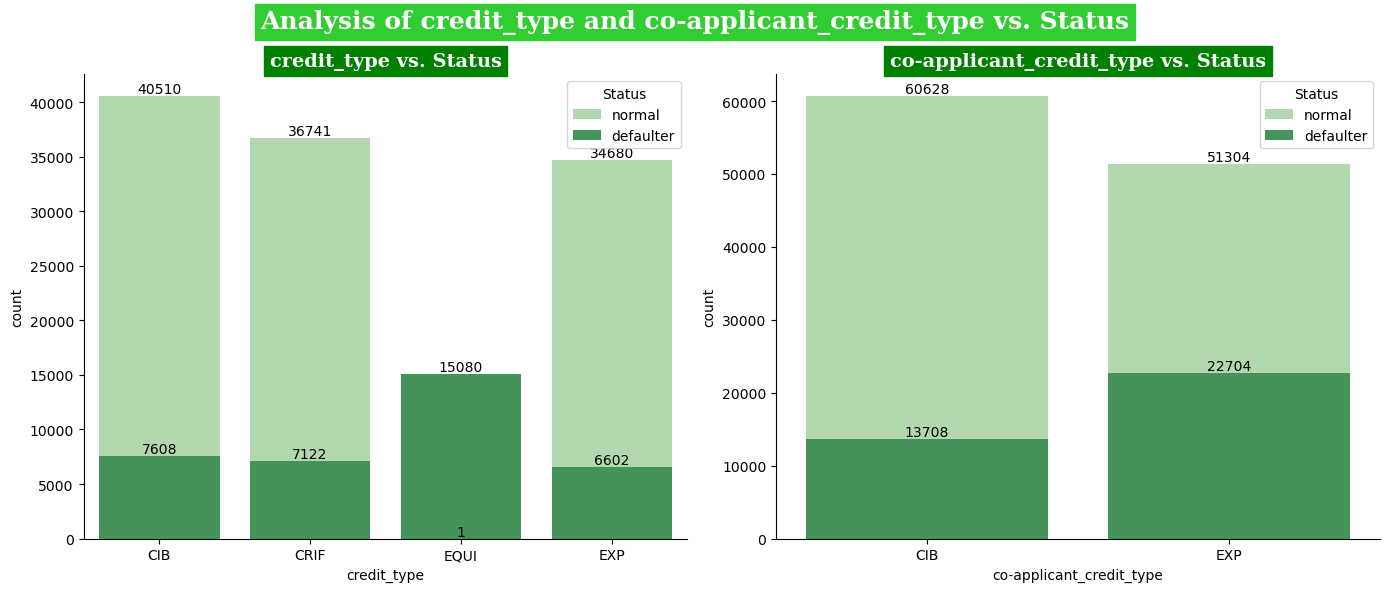

In [67]:
# Analysis of credit_type and co-applicant_credit_type vs. Status
plt.figure(figsize=(14, 6))

plt.subplot(121)
label = sns.countplot(data=df, x='credit_type',hue='Status', palette = 'Greens', dodge=False)
for i in label.containers:
  label.bar_label(i)
plt.title("credit_type vs. Status",fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='green',color='w')

plt.subplot(122)
label = sns.countplot(data=df, x='co-applicant_credit_type',hue='Status', palette = 'Greens', dodge=False)
for i in label.containers:
  label.bar_label(i)
plt.title("co-applicant_credit_type vs. Status",fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='green',color='w')

plt.suptitle("Analysis of credit_type and co-applicant_credit_type vs. Status", fontsize = 18,fontfamily='serif',
             fontweight='bold',backgroundcolor='limegreen',color='w')
plt.tight_layout()
sns.despine()
plt.show()

**🤏🏽OBSERVATION**

**Credit Type vs. Loan Status:**

1. **CIB Credit Type:**
    - Out of 48,118 borrowers with CIB credit type, 40,510 (84.15%) have a "normal" status, while 7,608 (15.80%) are defaulters.
    - CIB credit type has a relatively strong track record with the lowest default rate among credit types.

2. **CRIF Credit Type:**

    - Out of 43,863 borrowers with CRIF credit type, 36,741 (83.75%) are in "normal" status, and 7,122 (16.25%) are defaulters.
    - The performance of CRIF credit type is very similar to CIB, with a moderate default rate.

3. **EQUI Credit Type:**
    - The EQUI credit type has only 1 normal borrower and 15,080 defaulters. This extreme disparity suggests that EQUI credit is predominantly linked to defaults.
    - EQUI credit type exhibits the highest default rate and poses a significant risk to lenders, indicating poor lending quality.

4. **EXP Credit Type:**
    - Out of 41,282 borrowers with EXP credit type, 34,680 (83.98%) are normal borrowers, and 6,602 (16.00%) are defaulters.
    - EXP credit type has a solid proportion of normal borrowers, indicating a fairly healthy lending pattern similar to CIB and CRIF.

**Co-Applicant Credit Type vs. Loan Status:**

1. **CIB Co-Applicant Credit Type:**
    - Out of 74,336 borrowers with CIB as the co-applicant credit type, 60,628 (81.56%) have a "normal" status, while 13,708 (18.44%) are defaulters.
    - Loans with CIB as the co-applicant credit type show a good proportion of normal status, although slightly higher default risk compared to primary credit types.

2. **EXP Co-Applicant Credit Type:**
    - Out of 74,008 borrowers with EXP as the co-applicant credit type, 51,304 (69.31%) are in "normal" status, while 22,704 (30.69%) are defaulters.
    - Loans with EXP as the co-applicant credit type have a significantly higher default rate, suggesting co-applicants with EXP credit may represent a higher risk.

**🤔Recommendations:**

- Tighten lending criteria for EQUI credit types to mitigate the overwhelming risk of defaults.

- Strengthen co-applicant assessments, especially when EXP is the co-applicant credit type, as this significantly increases the likelihood of default.

- Monitor CIB and CRIF closely, as these credit types maintain a healthy balance of risk but still contribute to defaulters in some cases.

In [68]:
# Analysis of combined_credit_type vs. Status
df.groupby(['credit_type', 'co-applicant_credit_type', 'Status'])['ID'].count()

credit_type  co-applicant_credit_type  Status   
CIB          CIB                       normal       21992
                                       defaulter     4861
             EXP                       normal       18518
                                       defaulter     2747
CRIF         CIB                       normal       19891
                                       defaulter     4559
             EXP                       normal       16850
                                       defaulter     2563
EQUI         CIB                       normal           1
                                       defaulter        1
             EXP                       normal           0
                                       defaulter    15079
EXP          CIB                       normal       18744
                                       defaulter     4287
             EXP                       normal       15936
                                       defaulter     2315
Name: ID, dtype: int64

In [69]:
# Combine the credit_type and co-applicant_credit_type
df['combined_credit_type'] = df['credit_type'].astype(str) + ' & ' + df['co-applicant_credit_type'].astype(str)
df['combined_credit_type'] = df['combined_credit_type'].astype('category')

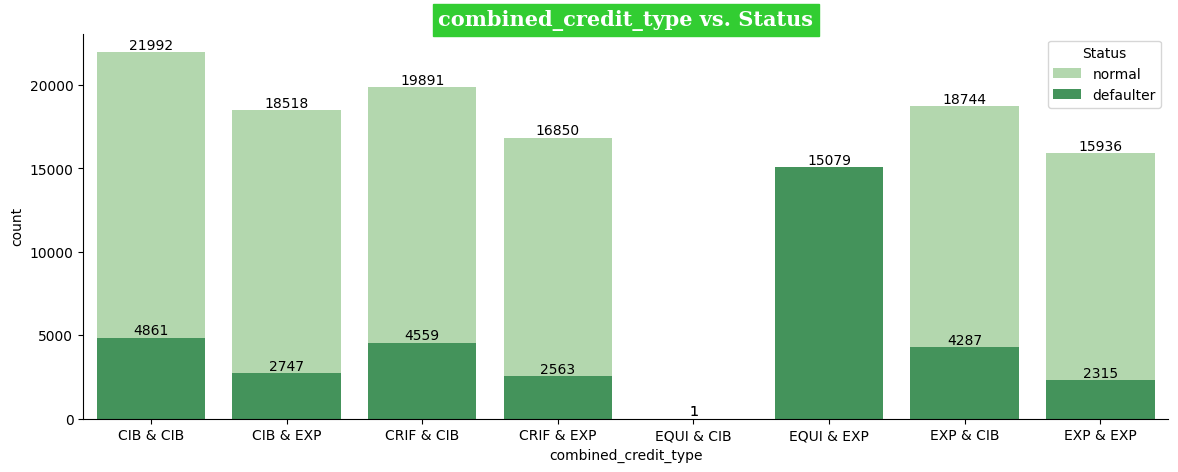

In [81]:
# Analysis
plt.figure(figsize=(14,5))
# Function Calling
single_bar_chart('combined_credit_type', dodge=False)

**🤏🏽OBSERVATION**

1. **CIB as Credit Type:**

    - **CIB Co-Applicant Credit Type:**
      - Out of 26,853 loans where both the credit type and co-applicant credit type are CIB, 21,992 (81.91%) are "normal," while 4,861 (18.09%) are "defaulter."
      - Observation: When both the borrower and co-applicant have CIB as their credit type, the default rate is moderate (18.09%), but overall, this combination appears to be relatively reliable.

    - **EXP Co-Applicant Credit Type:**
      - Out of 21,265 loans where the credit type is CIB and co-applicant credit type is EXP, 18,518 (87.09%) are "normal," while 2,747 (12.91%) are "defaulter."
      - Observation: The combination of CIB (primary credit type) and EXP (co-applicant) shows a higher success rate with a lower default percentage (12.91%) than the CIB-CIB combination.

2. **CRIF as Credit Type:**

    - **CIB Co-Applicant Credit Type:**
      - For 24,450 loans where CRIF is the credit type and CIB is the co-applicant credit type, 19,891 (81.36%) are "normal," while 4,559 (18.64%) are defaulters.
      - Observation: The CRIF-CIB combination mirrors the reliability of the CIB-CIB combination, indicating that CIB as a co-applicant continues to help reduce the likelihood of defaults.

    - **EXP Co-Applicant Credit Type:**
      - In 19,413 loans where CRIF is the credit type and EXP is the co-applicant credit type, 16,850 (86.83%) are normal borrowers, while 2,563 (13.17%) are defaulters.
      - Observation: The CRIF-EXP combination behaves similarly to the CIB-EXP combination, showing a higher success rate and lower default percentage compared to other pairings.

3. **EQUI as Credit Type:**

    - **CIB Co-Applicant Credit Type:**
      - There are only 2 loans where EQUI is the credit type and CIB is the co-applicant. Of these, one is "normal" and one is a "defaulter."
      - Observation: Due to the extremely small sample size, no significant conclusions can be drawn, but this highlights the rarity of this combination.

    - **EXP Co-Applicant Credit Type:**
      - In the case of EQUI as the credit type and EXP as the co-applicant credit type, all 15,079 loans are in default.
      - Observation: This combination shows 100% default, indicating that loans with EQUI as the credit type and EXP as the co-applicant are extremely high-risk, and such combinations should be avoided entirely in lending decisions.
  
4. **EXP as Credit Type:**
    - **CIB Co-Applicant Credit Type:**
      - For 23,031 loans where EXP is the credit type and CIB is the co-applicant credit type, 18,744 (81.38%) are normal borrowers, while 4,287 (18.61%) are defaulters.
      - Observation: This pairing shows a similar default rate (18.61%) to other CIB-related combinations, indicating that CIB as a co-applicant is generally beneficial in reducing default risk.

    - **EXP Co-Applicant Credit Type:**
      - Out of 18,251 loans where both the credit type and co-applicant credit type are EXP, 15,936 (87.14%) are normal, and 2,315 (12.86%) are defaulters.
      - Observation: Interestingly, the EXP-EXP combination has a high proportion of "normal" loans and performs better than expected, with only 12.86% defaults.

  

  


**Overall Insights:**

1. **CIB as Co-Applicant:**
    - CIB as a co-applicant credit type consistently reduces the default rate, making it a more reliable choice across different primary credit types (CIB, CRIF, EXP).

2. **EXP as Co-Applicant:**
    - In most cases, EXP as a co-applicant results in a higher success rate, showing lower default rates compared to other combinations.

3. **EQUI as a Credit Type:**
    - EQUI is highly risky, especially when paired with EXP as the co-applicant credit type, which leads to 100% default rates. This combination should be avoided.

4. **EXP as Both Credit Type and Co-Applicant:**
    - The combination of EXP as both credit type and co-applicant performs surprisingly well, with a low default rate (12.86%). This shows that EXP credit type can be reliable when both borrower and co-applicant have the same credit type.

**🤔Recommendations:**

- Avoid lending to borrowers with EQUI credit type, especially when paired with EXP as the co-applicant credit type, as this combination has an extremely high default risk.
- CIB as a co-applicant remains a strong choice to mitigate default risk across multiple credit types.
- EXP as a credit type, even when paired with an EXP co-applicant, has a reasonable performance, making it a viable option in lower-risk scenarios.

##### <font color=#32de84>**Region vs. Status**</font>

> <font color=#0BDA51>**HT: Chi-Square Test of Independence**</font>

In [70]:
pd.crosstab(index=df['Region'], columns=df["Status"])

Status      normal  defaulter
Region                       
North        57835      16806
North-East     858        376
central       6298       2390
south        46941      16840

**Approach:**

- **Chi-Square Assumptions:** The Chi-Square test assumes that the expected frequency in each cell should be 5 or more.
- Asumptions for Chi-Square test are satisfied

In [71]:
# Function calling
ht_Chi_Square('Region')

CONCLUSION: Region and Status are Dependent


**🤏🏽OBSERVATION**
- The result of the Chi-Square test indicates that there is a statistically significant relationship between the Region and the loan status (normal vs. defaulter). This suggests that the likelihood of normal or default is influenced by the region.

> <font color=#0BDA51>**Analysis**</font>

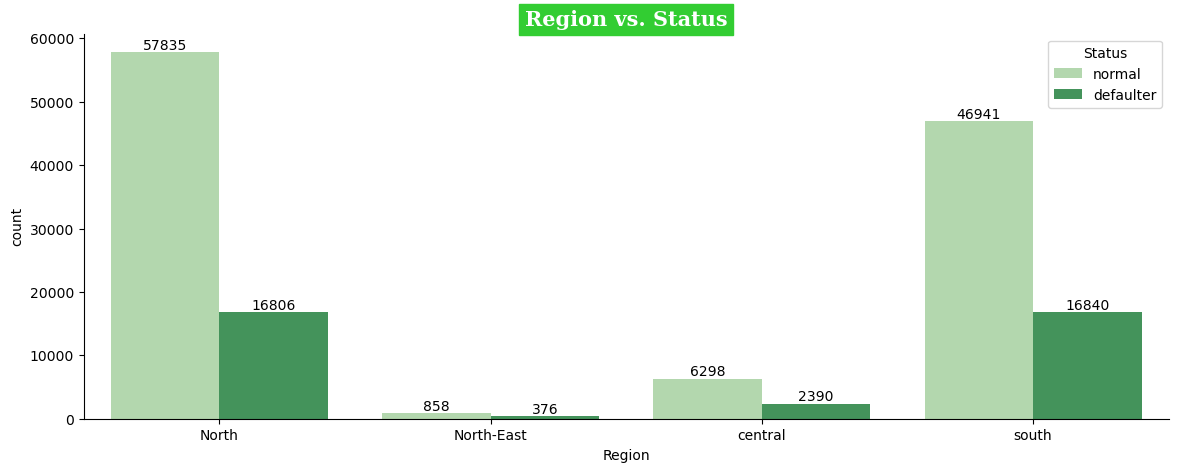

In [72]:
# Anslysis
plt.figure(figsize=(14,5))
# Function Calling
single_bar_chart('Region', dodge=True)

**🤏🏽OBSERVATION**

1. **North Region:**
    - 57,835 loans are "normal" (77.48%), while 16,806 (22.52%) are "defaulter."
    - Observation: The North region has the highest total number of loans and a relatively high proportion of normal borrowers.

2. **North-East Region:**
    - 858 loans are "normal" (69.53%), and 376 (30.47%) are "defaulter."
    - Observation: The North-East region has the smallest number of loans but a higher proportion of defaulters compared to other regions, indicating higher credit risk.

3. **Central Region:**
    - 6,298 loans are "normal" (72.49%), and 2,390 (27.51%) are "defaulter."
    - Observation: The Central region has a moderate default rate, but defaulters account for more than a quarter of all loans, showing some level of credit risk.

4. **South Region:**
    - 46,941 loans are "normal" (73.59%), while 16,840 (26.41%) are "defaulter."
    - Observation: The South region has a substantial number of loans, with a default rate similar to the Central region but much higher in absolute numbers.

**🕵🏽‍♂️Key Insights:**

1. North Region shows a strong performance with the highest number of "normal" loans and a relatively lower default rate.
2. North-East Region is the highest-risk area, with nearly a third of loans in default despite having the smallest number of loans.
3. South Region has the second-highest number of loans but a significant portion of defaulters, making it a region with relatively high credit risk.
4. Central Region has a higher-than-average default rate, but the total number of loans is smaller compared to the North and South regions.

**🤔Recommendations**

1. **Targeted Risk Mitigation in the North-East and Central Regions:**

    - Since the North-East and Central regions show significantly higher default rates, the business should consider implementing stricter loan approval criteria or higher collateral requirements in these areas. Enhanced risk assessments, such as closer scrutiny of borrowers' credit history and income levels, could help reduce defaults. Additionally, offering more education on financial literacy or restructuring loans for borrowers facing difficulties could mitigate future risks.

2. **Leverage the Stability in the North Region to Expand Business:**

    - The North Region has the highest volume of loans and a comparatively lower default rate. This presents an opportunity to increase lending activity in this region. The business could introduce more attractive loan products, such as reduced interest rates or faster approval processes, to capitalize on the region’s relatively stable credit environment. Expanding marketing efforts and partnerships in the North region could further boost profitable lending activities.

##### <font color=#32de84>**Age vs. Status**</font>

> <font color=#0BDA51>**HT: Chi-Square Test of Independence**</font>

In [73]:
pd.crosstab(index=df['age'], columns=df["Status"])

Status  normal  defaulter
age                      
25-34    14856       4244
35-44    25486       7302
45-54    26357       8342
55-64    24097       8419
65-74    15168       5565
<25        948        387
>74       5020       2153

**Approach:**

- **Chi-Square Assumptions:** The Chi-Square test assumes that the expected frequency in each cell should be 5 or more.
- Asumptions for Chi-Square test are satisfied

In [74]:
# Function calling
ht_Chi_Square('age')

CONCLUSION: age and Status are Dependent


**🤏🏽OBSERVATION**
- The result of the Chi-Square test indicates that there is a statistically significant relationship between the age and the loan status (normal vs. defaulter). This suggests that the likelihood of normal or default is influenced by the age.

> <font color=#0BDA51>**Analysis**</font>

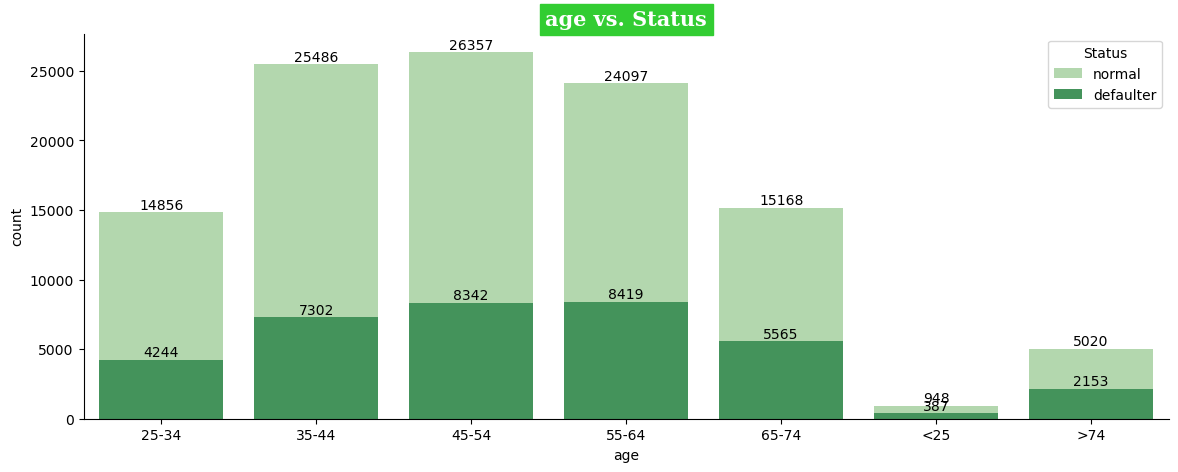

In [75]:
# Anslysis
plt.figure(figsize=(14,5))
# Function Calling
single_bar_chart('age', dodge=False)

**🤏🏽OBSERVATION**

1. **Age Group 45-54:**
    - The 45-54 age group has the highest count of normal borrowers (26,357) and defaulters (8,342). This indicates that middle-aged borrowers are the largest segment of loan recipients but also have a higher risk of default compared to other age groups.

2. **Age Group 35-44:**
    - The 35-44 age group follows closely behind with 25,486 normal borrowers and 7,302 defaulters. This segment is also significant in both loan participation and default risk.

3. **Age Group 55-64:**
    - Borrowers in the 55-64 age group show a high number of normal borrowers (24,097) but also a considerable number of defaulters (8,419). This may suggest a higher default risk as individuals approach retirement age.

4. **Younger Borrowers (<25):**
    - The <25 age group has a lower number of both normal borrowers (948) and defaulters (387), indicating they make up a smaller proportion of the total loan pool, but their default rate is relatively high compared to their participation.

5. **Older Borrowers (>74):**
    - The >74 age group shows 5,020 normal borrowers and 2,153 defaulters, with a relatively high default rate considering their lower number of total loans. This suggests older borrowers might face challenges in repaying loans, possibly due to retirement or fixed incomes.

**Default Risk Across Ages:**
- The default risk seems to increase with age beyond 55, especially for the 65-74 and >74 age groups, where defaulters make up a significant portion of the total. The younger age groups, though fewer in number, show higher sensitivity to economic stress, reflected in their default numbers.

- The age is a crucial factor in both loan participation and default risk, with younger and older borrowers being at a higher risk of default compared to those in middle age.

**🤔Recommendations:**

1. **Targeted Financial Education:** Develop financial literacy programs specifically for older age groups (55 and above) to help them manage debt and reduce default rates.

2. **Customized Loan Products:** Create tailored loan products with flexible repayment options for younger borrowers (<25) and middle-aged borrowers (35-54) to encourage responsible borrowing and lower default risk.

3. **Risk-Based Pricing:** Implement risk-based pricing strategies to account for higher default rates among older borrowers, ensuring that loan terms reflect their risk profiles while providing support to improve repayment rates.

#### <font color=#32de84>**Occupancy_type vs. Status**</font>



> <font color=#0BDA51>**HT: Chi-Square Test of Independence**</font>

In [76]:
pd.crosstab(index=df['occupancy_type'], columns=df["Status"])

Status          normal  defaulter
occupancy_type                   
ir                5134       2197
pr              104522      33368
sr                2276        847

**Approach:**

- **Chi-Square Assumptions:** The Chi-Square test assumes that the expected frequency in each cell should be 5 or more.
- Asumptions for Chi-Square test are satisfied

In [77]:
# Function calling
ht_Chi_Square('occupancy_type')

CONCLUSION: occupancy_type and Status are Dependent


**🤏🏽OBSERVATION**
- The result of the Chi-Square test indicates that there is a statistically significant relationship between the occupancy_type and the loan status (normal vs. defaulter). This suggests that the likelihood of normal or default is influenced by the occupancy_type.

> <font color=#0BDA51>**Analysis**</font>

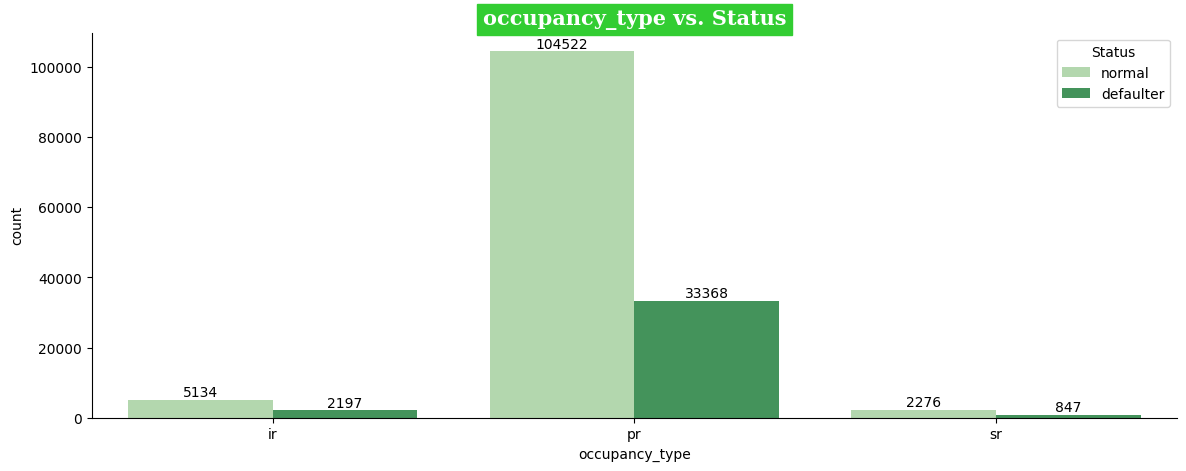

In [90]:
# Anslysis
plt.figure(figsize=(14,5))
# Function Calling
single_bar_chart('occupancy_type', dodge=True)

**🤏🏽OBSERVATION**

1. **Prevalence of Primary Residences:** The majority of borrowers (approximately 76%) occupy their properties as primary residences (occupancy type 'pr'), suggesting that this demographic is primarily focused on homeownership rather than investment or secondary properties.

2. **Higher Default Rates for Investment Residences:** The occupancy type 'ir' (investment residence) has a higher proportion of defaults, with around 42.7% of borrowers defaulting. This indicates a significant risk associated with investment properties, highlighting the need for thorough credit assessments in this category.

3. **Stability in Secondary Residences:** The 'sr' (secondary residence) category shows the lowest number of total borrowers and defaults, indicating a relatively stable group. The default rate in this category is approximately 37%, which is lower than that of investment residences, suggesting that secondary homeowners are managing their finances more effectively.

> **Implication of Default Rates:**
- The high default rates among 'pr' (33.7%) and 'ir' (42.7%) occupants may signal potential economic strain affecting homeowners and investors, warranting closer examination of the underlying causes, such as economic conditions or interest rates.

> **Risk Management Strategies:**
- Given the differences in default rates across occupancy types, financial institutions should consider implementing tailored risk management strategies that address the specific needs and challenges of borrowers based on their occupancy status.

#### <font color=#32de84>**Loan_limit vs. Status**</font>

> <font color=#0BDA51>**HT: Chi-Square Test of Independence**</font>

In [78]:
pd.crosstab(index=df['loan_limit'], columns=df["Status"])

Status      normal  defaulter
loan_limit                   
cf          105272      33271
ncf           6660       3141

**Approach:**

- **Chi-Square Assumptions:** The Chi-Square test assumes that the expected frequency in each cell should be 5 or more.
- Asumptions for Chi-Square test are satisfied

In [79]:
# Function calling
ht_Chi_Square('loan_limit')

CONCLUSION: loan_limit and Status are Dependent


In [80]:
# Checked just for cutiosity since 2x2 matrix
ht_fisher_exact('loan_limit')

CONCLUSION: loan_limit and Status are Dependent


**🤏🏽OBSERVATION**
- There is a significant relationship between the loan limit and loan status (normal vs. defaulter). This suggests that the loan limit significantly impacts whether an individual is likely to default.

> <font color=#0BDA51>**Analysis**</font>

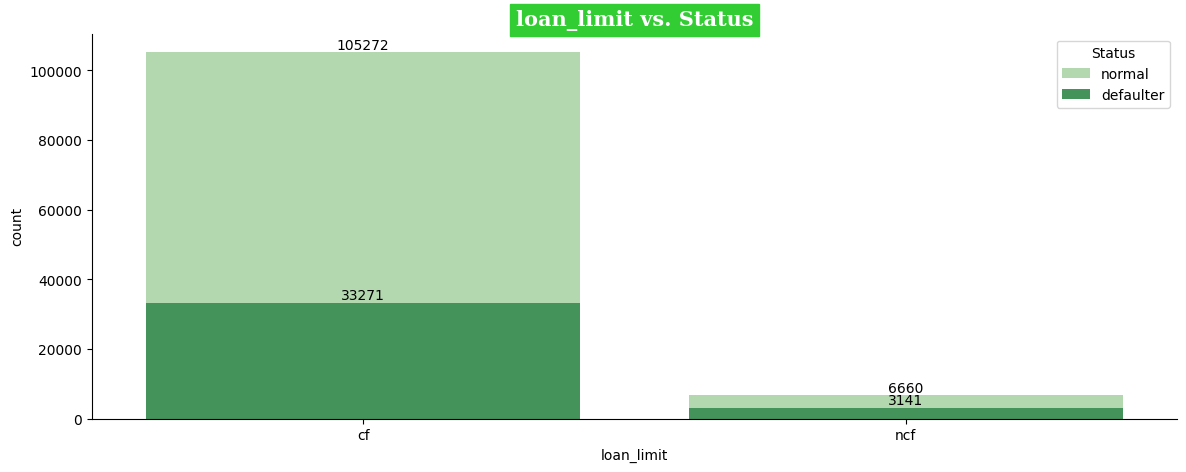

In [94]:
# Anslysis
plt.figure(figsize=(14,5))
# Function Calling
single_bar_chart('loan_limit', dodge=False)

**🤏🏽OBSERVATION**

1. **Higher Stability in Confirmed Loan Limits:** The category with confirmed loan limits ('cf') shows a significantly higher number of borrowers classified as normal (105,272) compared to defaulters (33,271). This indicates that borrowers with confirmed loan limits are generally more stable and less likely to default.

2. **Increased Risk in Non-Confirmed Loan Limits:** The non-confirmed loan limits ('ncf') category has a much smaller total population (9,801) with a notable default rate of approximately 47.2% (3,141 defaulters). This suggests that borrowers with non-confirmed loan limits are at a higher risk of default, potentially due to a lack of verification regarding their financial stability.

> **Implication of Verification Process:**
- The stark contrast in default rates between confirmed and non-confirmed loan limits underscores the importance of thorough verification processes. Financial institutions may need to reconsider their lending criteria for borrowers with non-confirmed limits to mitigate risks associated with defaults.

> **Focus on Confirmed Borrowers:**
- With a high proportion of normal status among confirmed loan limits, lenders may want to prioritize their engagement and offerings to these borrowers, potentially offering them better terms or incentives to encourage loyalty and further borrowing.

> **Opportunity for Improvement:**
- The significant number of defaults among non-confirmed borrowers highlights an opportunity for lenders to improve their assessment procedures and support mechanisms for these clients, possibly through enhanced financial education or tailored repayment plans.

#### <font color=#32de84>**Gender vs. Status**</font>

> <font color=#0BDA51>**HT: Chi-Square Test of Independence**</font>

In [81]:
pd.crosstab(index=df['Gender'], columns=df["Status"])

Status             normal  defaulter
Gender                              
Female              20399       6843
Joint               33432       7926
Male                31225      11079
Sex Not Available   26876      10564

**Approach:**

- **Chi-Square Assumptions:** The Chi-Square test assumes that the expected frequency in each cell should be 5 or more.
- Asumptions for Chi-Square test are satisfied

In [82]:
# Function calling
ht_Chi_Square('Gender')

CONCLUSION: Gender and Status are Dependent


**🤏🏽OBSERVATION**
- The Chi-Square test indicates that gender influences loan status. This means that the likelihood of being a defaulter or maintaining a normal status varies across different gender categories.

> <font color=#0BDA51>**Analysis**</font>

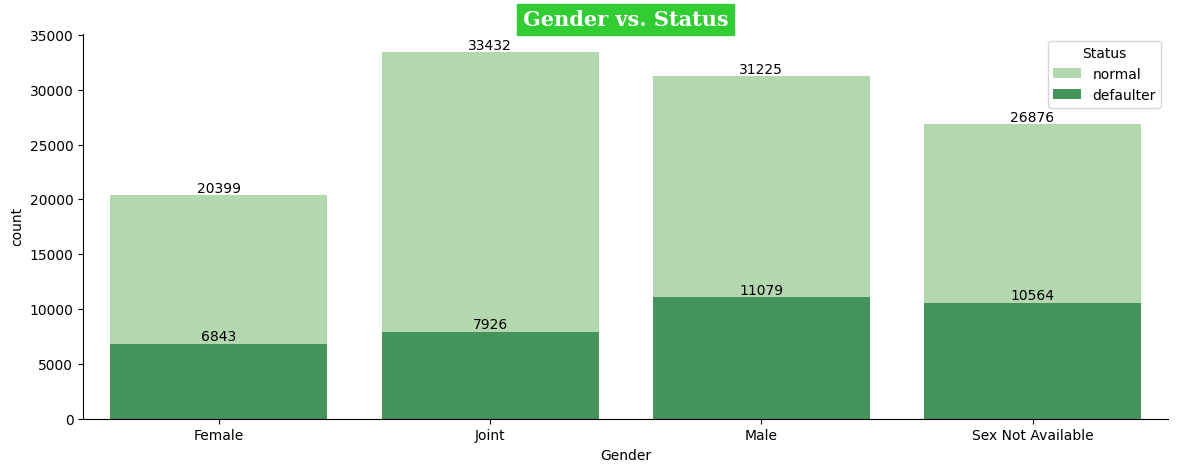

In [97]:
# Anslysis
plt.figure(figsize=(14,5))
# Function Calling
single_bar_chart('Gender', dodge=False)

**🤏🏽OBSERVATION**

1. **Female Borrowers:**
    - Total: 27,242
    - Normal: 20,399 (74.82%)
    - Defaulter: 6,843 (25.18%)
    - Females exhibit a higher default rate compared to the overall norm, indicating a potential risk factor.

2. **Joint Borrowers:**
    - Total: 41,358
    - Normal: 33,432 (80.80%)
    - Defaulter: 7,926 (19.20%)
    - **Joint borrowers show a relatively lower default rate**, suggesting that shared financial responsibility may contribute to loan stability.

3. **Male Borrowers:**
    - Total: 42,304
    - Normal: 31,225 (73.76%)
    - Defaulter: 11,079 (26.24%)
    - Male borrowers have a higher absolute number of defaults, indicating that gender-specific factors may influence loan repayment behavior.

4. **Gender Not Specified:**
    - Total: 37,440
    - Normal: 26,876 (71.77%)
    - Defaulter: 10,564 (28.23%)
    - B**orrowers with unspecified gender also exhibit a high default rate**, suggesting that a lack of information could correlate with higher risk.

> **Summary:**
- Overall, the default rates are notably high for all gender categories, with a significant proportion of male and female borrowers defaulting on loans.
- Joint borrowers seem to perform better in terms of repayment, which may indicate that financial partnerships can reduce default risk.
- The data suggests a potential need for targeted interventions or support for female and unspecified gender borrowers to improve repayment outcomes.

#### <font color=#32de84>**loan_type vs. Status**</font>

> <font color=#0BDA51>**HT: Chi-Square Test of Independence**</font>

In [83]:
pd.crosstab(index=df['loan_type'], columns=df["Status"])

Status     normal  defaulter
loan_type                   
type1       87324      25719
type2       13574       7007
type3       11034       3686

**Approach:**

- **Chi-Square Assumptions:** The Chi-Square test assumes that the expected frequency in each cell should be 5 or more.
- Asumptions for Chi-Square test are satisfied

In [84]:
# Function calling
ht_Chi_Square('loan_type')

CONCLUSION: loan_type and Status are Dependent


**🤏🏽OBSERVATION**
- The result of the Chi-Square test indicates that there is a statistically significant relationship between the loan_type and the loan status (normal vs. defaulter). This suggests that the likelihood of normal or default is influenced by the loan_type.

> <font color=#0BDA51>**Analysis**</font>

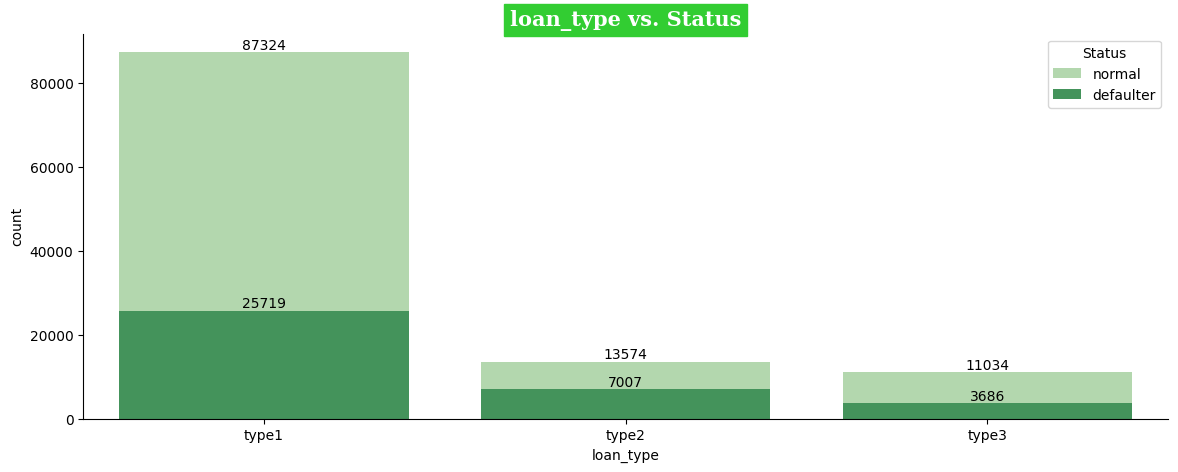

In [100]:
# Anslysis
plt.figure(figsize=(14,5))
# Function Calling
single_bar_chart('loan_type', dodge=False)

**🤏🏽OBSERVATION**

1. **Loan Type 1:**

    - Total: 113,043
    - Normal: 87,324 (76.96%)
    - Defaulter: 25,719 (23.04%)
    - Loan Type 1 has the highest volume of loans and a relatively lower default rate compared to other loan types, indicating it may be the most reliable loan category.

2. **Loan Type 2:**

    - Total: 20,581
    - Normal: 13,574 (65.97%)
    - Defaulter: 7,007 (34.03%)
    - Loan Type 2 has a significantly higher default rate compared to Loan Type 1, suggesting potential issues with creditworthiness or terms associated with this loan type.

3. **Loan Type 3:**
    - Total: 14,720
    - Normal: 11,034 (75.00%)
    - Defaulter: 3,686 (25.00%)
    - Loan Type 3 has a moderate default rate, indicating better performance than Loan Type 2 but slightly lower than Loan Type 1.

> **Summary:**

1. **Overall Performance:** Loan Type 1 stands out as the most favorable in terms of low defaults, while Loan Type 2 presents significant risks with a high default rate.

2. **Risk Management:** Financial institutions may consider reviewing the lending criteria and terms for Loan Type 2 to mitigate the high default rates.

3. **Potential Strategies:** Further investigation into borrower profiles and reasons for default in Loan Type 2 may reveal actionable insights for risk management and loan product improvement.

#### <font color=#32de84>**Loan_purpose vs. Status**</font>

> <font color=#0BDA51>**HT: Chi-Square Test of Independence**</font>

In [101]:
pd.crosstab(index=df['loan_purpose'], columns=df["Status"])

Status        normal  defaulter
loan_purpose                   
p1             25594       8843
p2              2191       1079
p3             41938      13933
p4             42209      12557

**Approach:**

- **Chi-Square Assumptions:** The Chi-Square test assumes that the expected frequency in each cell should be 5 or more.
- Asumptions for Chi-Square test are satisfied

In [102]:
# Function calling
ht_Chi_Square('loan_purpose')

CONCLUSION: loan_purpose and Status are Dependent


**🤏🏽OBSERVATION**
- The result of the Chi-Square test indicates that there is a statistically significant relationship between the loan_purpose and the loan status (normal vs. defaulter). This suggests that the likelihood of normal or default is influenced by the loan_purpose.

> <font color=#0BDA51>**Analysis**</font>

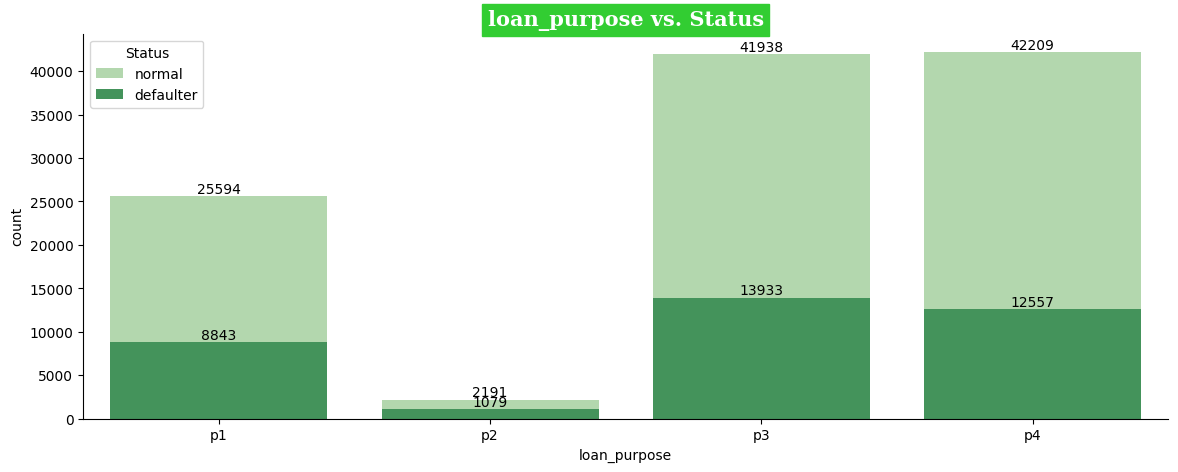

In [103]:
# Anslysis
plt.figure(figsize=(14,5))
# Function Calling
single_bar_chart('loan_purpose', dodge=False)

**🤏🏽OBSERVATION**

1. **Loan Purpose P1:**
    - Total: 34,437
    - Normal: 25,594 (74.34%)
    - Defaulter: 8,843 (25.66%)
    - Loan Purpose P1 has a significant portion of defaults, suggesting that the reasons associated with this purpose may carry higher risk.

2. **Loan Purpose P2:**
    - Total: 3,270
    - Normal: 2,191 (66.87%)
    - Defaulter: 1,079 (33.13%)
    - Similar to P1, Loan Purpose P2 has a high default rate, indicating potential issues related to the purpose of these loans.

3. **Loan Purpose P3:**
    - Total: 55,871
    - Normal: 41,938 (75.00%)
    - Defaulter: 13,933 (25.00%)
    - While Loan Purpose P3 has a decent percentage of normal loans, the absolute number of defaulters is substantial, indicating it might still be a risky category.

4. **Loan Purpose P4:**
    - Total: 54,766
    - Normal: 42,209 (77.00%)
    - Defaulter: 12,557 (23.00%)
    - Loan Purpose P4 performs the best in terms of the percentage of normal loans and lowest default rate, suggesting it may be a safer lending category.

> **Summary:**

1. **Risk Assessment:** Loan Purposes P1 and P2 show high default rates and should be monitored closely for creditworthiness and lending criteria adjustments.
2. **Performance Comparison:** Loan Purpose P4 has the best performance with the lowest default rate, indicating it could be a model for successful lending practices.
3. **Strategy Recommendations:** It may be beneficial to conduct further analysis on the borrowers associated with P1 and P2 to understand the factors contributing to defaults and to improve loan structuring for these purposes.

#### <font color=#32de84>**Business_or_commercial vs. Status**</font>

> <font color=#0BDA51>**HT: Chi-Square Test of Independence**</font>

In [85]:
pd.crosstab(index=df['business_or_commercial'], columns=df["Status"])

Status                  normal  defaulter
business_or_commercial                   
b/c                      13574       7007
nob/c                    98358      29405

**Approach:**

- **Chi-Square Assumptions:** The Chi-Square test assumes that the expected frequency in each cell should be 5 or more.
- Asumptions for Chi-Square test are satisfied

In [86]:
# Function calling
ht_Chi_Square('business_or_commercial')

CONCLUSION: business_or_commercial and Status are Dependent


In [87]:
# Checked just for cutiosity since 2x2 matrix
ht_fisher_exact('business_or_commercial')

CONCLUSION: business_or_commercial and Status are Dependent


**🤏🏽OBSERVATION**
- There is a significant relationship between the business_or_commercial and loan status (normal vs. defaulter). This suggests that the business_or_commercial significantly impacts whether an individual is likely to default.

> <font color=#0BDA51>**Analysis**</font>

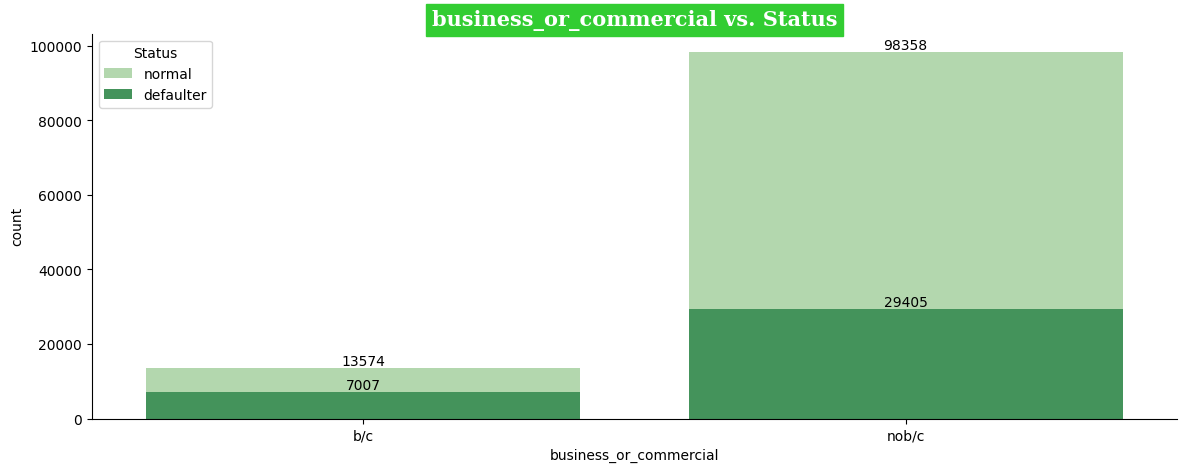

In [107]:
# Analysis of Commercial establishment or Personal establishment vs. Status
plt.figure(figsize=(14,5))
# Function Calling
single_bar_chart('business_or_commercial', dodge=False)

**🤏🏽OBSERVATION**

1. **Business/Commercial (b/c):**
    - Total: 20,581
    - Normal: 13,574 (65.93%)
    - Defaulter: 7,007 (34.07%)
    - A significant percentage of business/commercial loans (34.07%) are in default, indicating potential higher risk in this category.

2. Non-Business/Non-Commercial (nob/c):
    - Total: 127,763
    - Normal: 98,358 (76.99%)
    - Defaulter: 29,405 (23.01%)
    - Personal or non-commercial loans have a better performance, with a lower default rate (23.01%) compared to business/commercial loans.

> **Summary:**

1. **Risk Assessment:** Loans given to business/commercial establishments (b/c) exhibit a higher default rate, indicating that these loans might require stricter lending criteria or additional risk mitigation strategies.
2.**Performance Comparison:** Non-commercial or personal loans (nob/c) demonstrate stronger performance, with a higher proportion of normal loans and a lower default rate.
3. **Recommendations:** Consider revisiting the risk assessment process for business/commercial loans and explore methods to reduce defaults, such as better financial evaluation, enhanced monitoring, or providing tailored financial support to businesses at higher risk.

#### <font color=#32de84>**Credit_Score_Category vs. Status**</font>


In [88]:
df['Credit_Score'].describe()

count    148344.000000
mean        699.773243
std         115.872267
min         500.000000
25%         599.000000
50%         699.000000
75%         800.000000
max         900.000000
Name: Credit_Score, dtype: float64

In [89]:
# Example: Assuming your credit score data is in the 'Credit_Score' column
bins = [500, 599, 699, 799, 900]  # Setting bin edges based on min, quartiles, and max
labels = ['Low', 'Average', 'Good', 'Excellent']  # Labels for the bins

# Applying pd.cut() to the 'Credit_Score' column
df['Credit_Score_Category'] = pd.cut(df['Credit_Score'], bins=bins, labels=labels, right=True)

In [90]:
df['Credit_Score_Category'].value_counts()

Excellent    37376
Average      37114
Low          36758
Good         36739
Name: Credit_Score_Category, dtype: int64

> <font color=#0BDA51>**HT: Chi-Square Test of Independence**</font>

In [91]:
pd.crosstab(index=df['Credit_Score_Category'], columns=df["Status"])

Status                 normal  defaulter
Credit_Score_Category                   
Low                     27755       9003
Average                 28068       9046
Good                    27841       8898
Excellent               28012       9364

**Approach:**

- **Chi-Square Assumptions:** The Chi-Square test assumes that the expected frequency in each cell should be 5 or more.
- Asumptions for Chi-Square test are satisfied

In [112]:
# Function calling
ht_Chi_Square('Credit_Score_Category')

CONCLUSION: Credit_Score_Category and Status are Dependent


**🤏🏽OBSERVATION**
- The result of the Chi-Square test indicates that there is a statistically significant relationship between the Credit_Score_Category and the loan status (normal vs. defaulter). This suggests that the likelihood of normal or default is influenced by the Credit_Score_Category.

> <font color=#0BDA51>**Analysis**</font>

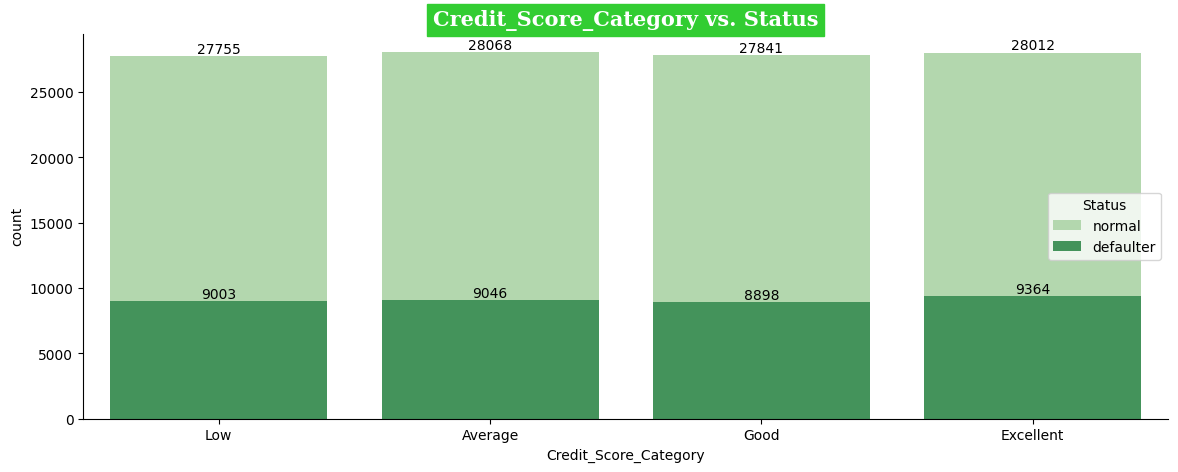

In [113]:
# Analysis
plt.figure(figsize=(14,5))
# Function Calling
single_bar_chart('Credit_Score_Category', dodge=False)

**🤏🏽OBSERVATION**

1. **Low Credit Score (<= 599):**
    - 27,755 accounts have a "normal" status.
    - 9,003 accounts are "defaulters".
    - Defaulter percentage: 24.49%.

2. **Average Credit Score (600 - 699):**
    - 28,068 accounts have a "normal" status.
    - 9,046 accounts are "defaulters".
    - Defaulter percentage: 24.38%.

3. **Good Credit Score (700 - 799):**
    - 27,841 accounts have a "normal" status.
    - 8,898 accounts are "defaulters".
    - Defaulter percentage: 24.21%.

4. **Excellent Credit Score (>= 800):**
    - 28,012 accounts have a "normal" status.
    - 9,364 accounts are "defaulters".
    - Defaulter percentage: 25.06%.

> **Defaulter Rate Across Credit Score Categories:**
- The defaulter rate is relatively consistent across credit score categories, ranging between 24% to 25%.
- Despite the expectation that higher credit scores would result in lower defaulter rates, the defaulter rate for "Excellent" credit scores (25.06%) is slightly higher than that for "Good" and "Average" scores.

> **Normal Accounts Distribution:**
- The number of accounts with a "normal" status is quite evenly distributed across all credit score categories, ranging from approximately 27,755 (Low) to 28,068 (Average). This suggests that credit score alone may not be the strongest determinant of account status.

> **Insights:**

- Although credit score is generally considered a key risk indicator, the consistent defaulter rate across all credit score categories (ranging from Low to Excellent) may suggest that other factors beyond credit score are contributing significantly to default risk.

- The defaulter rate for those with Excellent credit scores being slightly higher than for other groups is unexpected and could warrant further investigation to understand what specific conditions are leading to defaults among high-credit-score individuals.

#### <font color=#32de84>**Income_category vs. Status**</font>

In [92]:
df['income'].describe()

count    148344.000000
mean       6938.251500
std        6334.613413
min           0.000000
25%        3780.000000
50%        5782.332134
75%        8460.000000
max      578580.000000
Name: income, dtype: float64

In [93]:
# Create Bins and Lanels
bins = [-1, 3780, 5760, 8460, df['income'].max()]  # Setting bin edges based on min, quartiles, and max
labels = ['Low', 'Average', 'Above Average', 'High'] # Labels for the bins

# Applying pd.cut() to the 'income_category' column
df['income_category'] = pd.cut(df['income'], bins=bins, labels=labels, right=True)

In [94]:
df['income_category'].value_counts()

Above Average    37373
Low              37257
Average          36894
High             36820
Name: income_category, dtype: int64

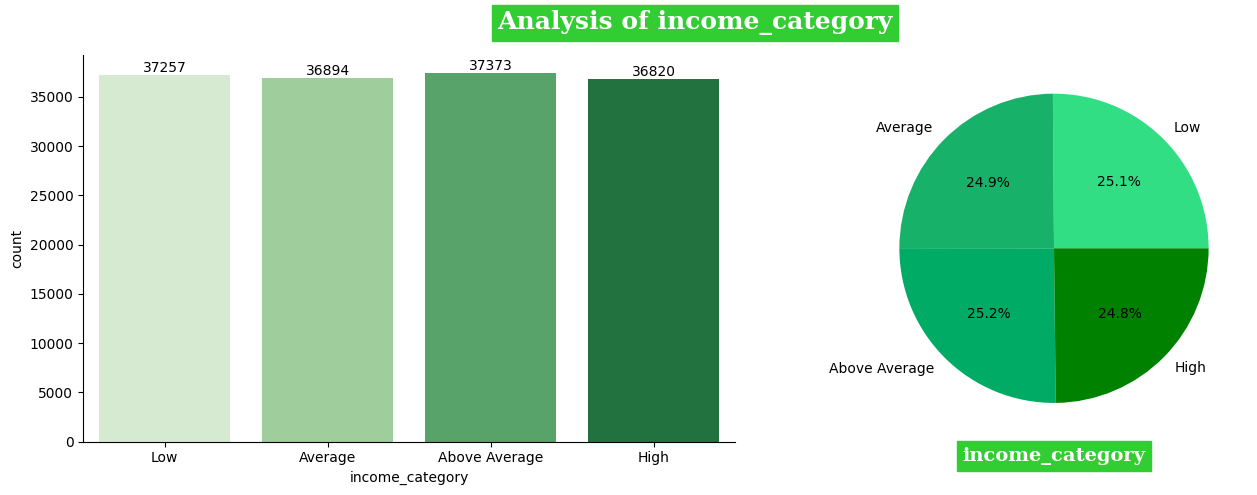

In [117]:
# Analysis of income_category
req_palette = ['#32de84', '#008200']

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
label = sns.countplot(data=df, x='income_category', palette='Greens')
for i in label.containers:
  label.bar_label(i)
#plt.title("income_category")

plt.subplot(1, 2, 2)
labels = df.groupby('income_category')['income_category'].count().index.categories
plt.pie(df.groupby('income_category')['income_category'].count().values, labels = labels, autopct = "%1.1f%%", colors=green_palette)
plt.xlabel('income_category', fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='limegreen',color='w')
#plt.title("income_category")

plt.suptitle("Analysis of income_category",fontsize = 18,fontfamily='serif',fontweight='bold',backgroundcolor='limegreen',color='w')
plt.tight_layout()
sns.despine()
plt.show()

> <font color=#0BDA51>**HT: Chi-Square Test of Independence**</font>

In [118]:
pd.crosstab(index=df['income_category'], columns=df["Status"])

Status           normal  defaulter
income_category                   
Low               24319      12938
Average           28129       8765
Above Average     29937       7436
High              29547       7273

**Approach:**

- **Chi-Square Assumptions:** The Chi-Square test assumes that the expected frequency in each cell should be 5 or more.
- Asumptions for Chi-Square test are satisfied

In [119]:
# Function calling
ht_Chi_Square('income_category')

CONCLUSION: income_category and Status are Dependent


**🤏🏽OBSERVATION**
- The result of the Chi-Square test indicates that there is a statistically significant relationship between the income_category and the loan status (normal vs. defaulter). This suggests that the likelihood of normal or default is influenced by the income_category.

> <font color=#0BDA51>**Analysis**</font>

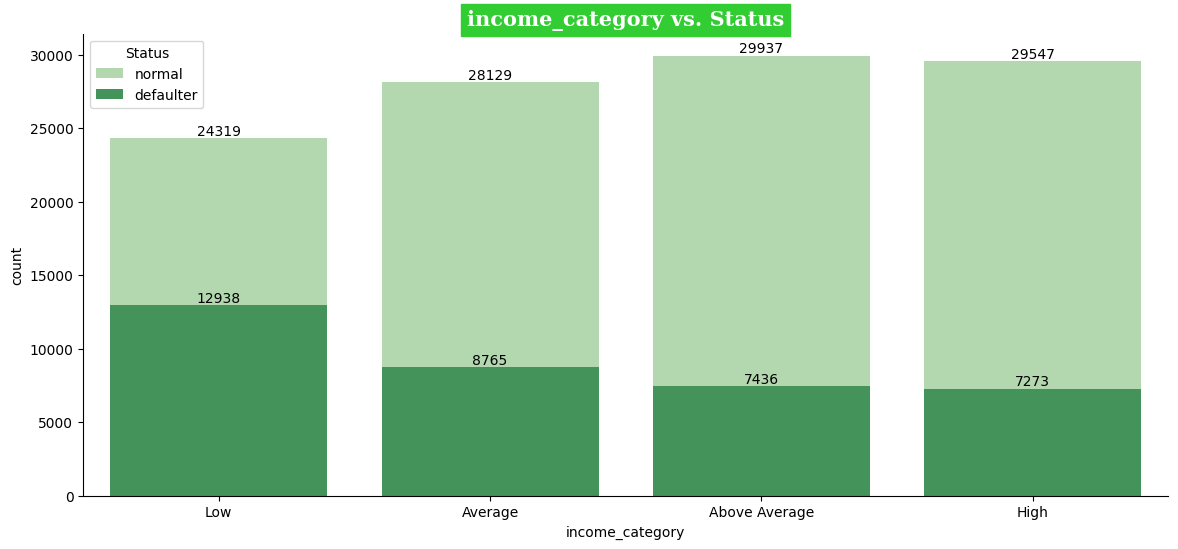

In [120]:
# Analysis
plt.figure(figsize=(14,6))
# Function Calling
single_bar_chart('income_category', dodge=False)

**🤏🏽OBSERVATION**

**Income Category Distribution:**
1. The largest portion of individuals in the Low income category (24,417) have a normal status, while 12,998 are defaulters. This shows a relatively high number of defaults in the lower income bracket.

2. In the Average income category, 28,208 individuals have a normal status, while 8,687 are defaulters, indicating a more stable financial situation than the Low income group.

3. The Above Average income category has 29,713 individuals with a normal status and 7,454 as defaulters. The defaulter proportion decreases as income increases.

4. The High income category has 29,594 individuals with a normal status and 7,273 as defaulters. Despite being in the highest income group, there are still significant defaulters.

> **Defaulter Trend:**
- As income increases from Low to High, the number of defaulters decreases in absolute terms but the ratio of normal to defaulter improves, showing that higher income groups tend to default less frequently.

- The Low income group shows a higher risk of defaulting compared to other categories, while those in the High income group demonstrate better loan repayment behavior.

> **Balanced Default Distribution:**
- Across the income categories, the number of normal individuals remains fairly consistent, suggesting that income does not drastically affect the proportion of individuals maintaining a good status, but lower-income individuals are more vulnerable to default.

### <font color=#17B169>**Numerical Features**</font>

##### <font color=#32de84>**Correlation Analysis**</font>

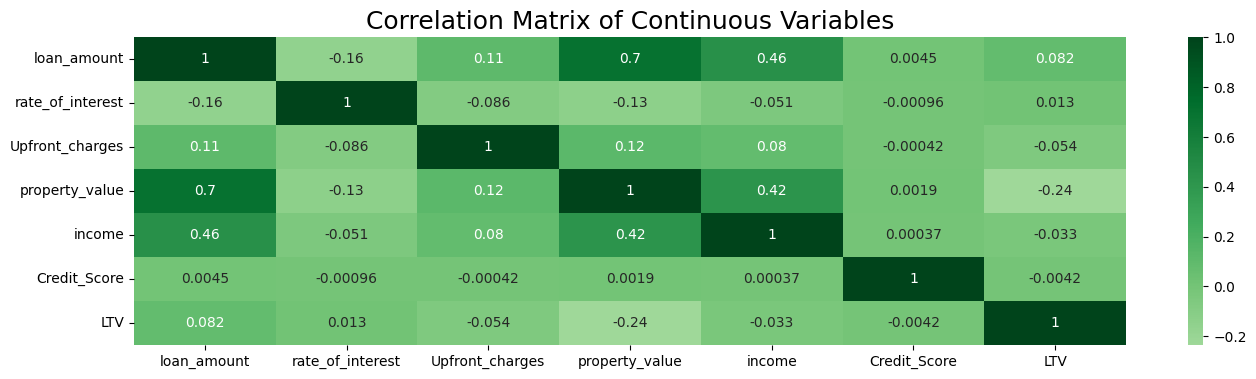

In [121]:
# Correlation Matrix of Continuous Variables
plt.figure(figsize=(16, 4))
corr_matrix = numerical_df_req.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Greens', center=0)
plt.title('Correlation Matrix of Continuous Variables', fontsize = 18)
plt.show()

**🤏🏽OBSERVATION**

1. **Loan Amount and Property Value:** A **strong positive correlation (0.70)** between loan amount and property value indicates that higher loan amounts are often associated with higher property values.
2. **Loan Amount and Income:** There is a **moderate positive correlation (0.46)** between loan amount and income, meaning higher loan amounts tend to be associated with higher incomes.
3. **Income and Property Value:** There is a **moderate positive correlation (0.42)** between Income and Property Value meaning as the income increases the Property Value also increses.

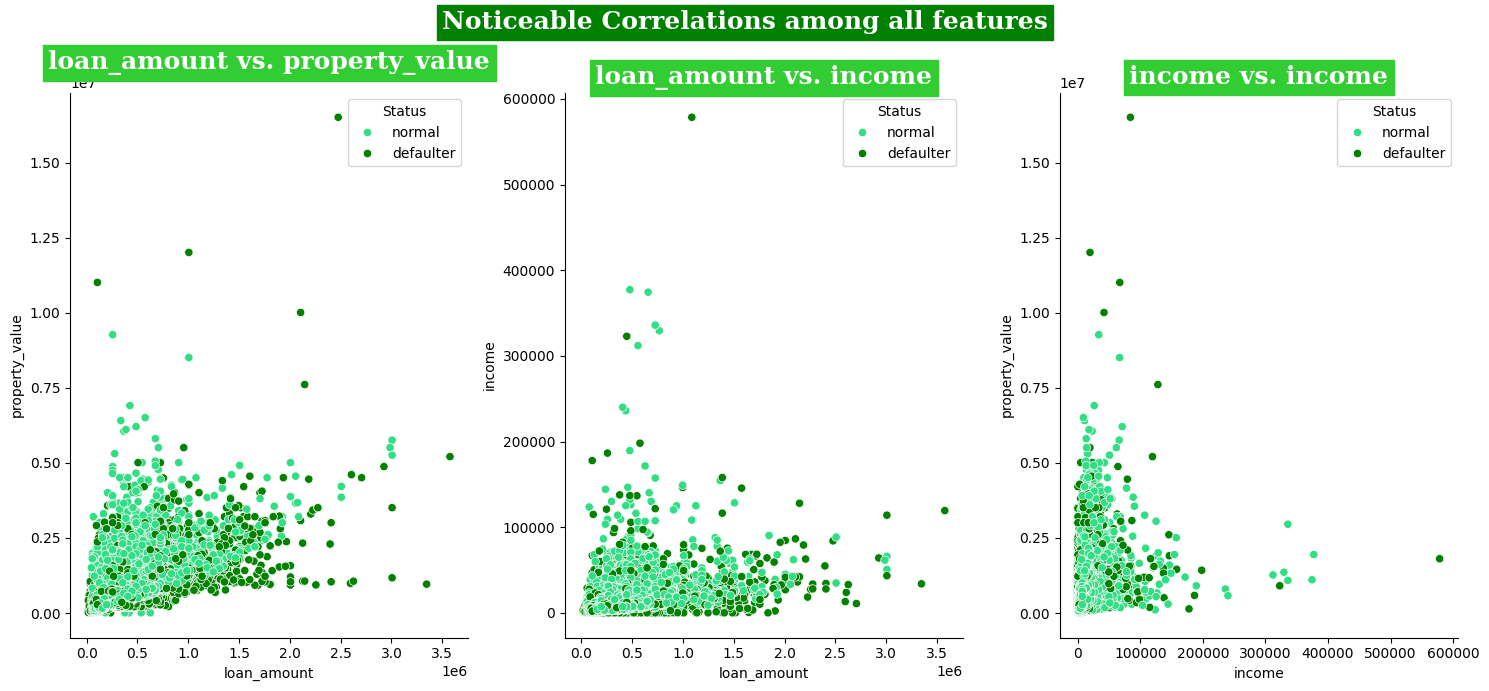

In [124]:
# Noticeable Correlations among all features
req_palette = ['#32de84', '#008200']

plt.figure(figsize=(15, 7))

plt.subplot(131)
sns.scatterplot(x='loan_amount', y='property_value', hue='Status', data=df, palette=req_palette)
plt.title("loan_amount vs. property_value",fontsize = 18,fontfamily='serif',fontweight='bold',backgroundcolor='limegreen',color='w')

plt.subplot(132)
sns.scatterplot(x='loan_amount', y='income', hue='Status', data=df, palette=req_palette)
plt.title("loan_amount vs. income",fontsize = 18,fontfamily='serif',fontweight='bold',backgroundcolor='limegreen',color='w')

plt.subplot(133)
sns.scatterplot(x='income', y='property_value', hue='Status', data=df, palette=req_palette)
plt.title("income vs. income",fontsize = 18,fontfamily='serif',fontweight='bold',backgroundcolor='limegreen',color='w')

plt.suptitle("Noticeable Correlations among all features",fontsize = 18,fontfamily='serif',fontweight='bold',backgroundcolor='green',color='w')
plt.tight_layout()
sns.despine()
plt.show()

##### <font color=#32de84>**loan_amount Vs. Status**</font>

In [95]:
# statistical summary
df.groupby('Status')['loan_amount'].describe()

count           mean            std      min       25%  \
Status                                                                 
normal     111932.0  334963.442090  174913.970571  26500.0  206500.0   
defaulter   36412.0  319890.640448  208652.841142  16500.0  176500.0   

                50%       75%        max  
Status                                    
normal     306500.0  446500.0  3006500.0  
defaulter  276500.0  416500.0  3576500.0

> **Introduction**

- When comparing "loan_amount" and "Status," we can use a **Two-Sample Independent T-Test** if the data is normally distributed or a non-parametric test like the **Mann-Whitney U test** if it's not.

**Why Two-Sample Independent T-Test?**

- One should choose the Two-Sample Independent T-Test to compare the means of two independent groups to determine if there is a statistically significant difference between them.

> **Perform Hypothesis Testing**

**1. Formulate the Hypotheses**

  - **Null Hypothesis (H0):** There is no significant difference between the two groups.
  - **Alternative Hypothesis (H1)**: There is a significant difference between the two groups.

**2. Check Assumptions:**
- **Normality:** Use the Q-Q Plot and Shapiro-Wilk test to check if the data is normally distributed.
- **Equality of Variances:** Use Levene's test to check if the variances are equal.

**3. Choose the Appropriate Test**
  - If the data is **normally distributed, use two-Sample Independent T-Test.**
  - If the data is **not normally distributed, use the Mann-Whitney U test.**

In [96]:
# Preparing the data:
normal_loan_amount = df[df['Status'] == 'normal']['loan_amount']
defaulter_loan_amount = df[df['Status'] == 'defaulter']['loan_amount']

> **Normality & Equality of Variances:**

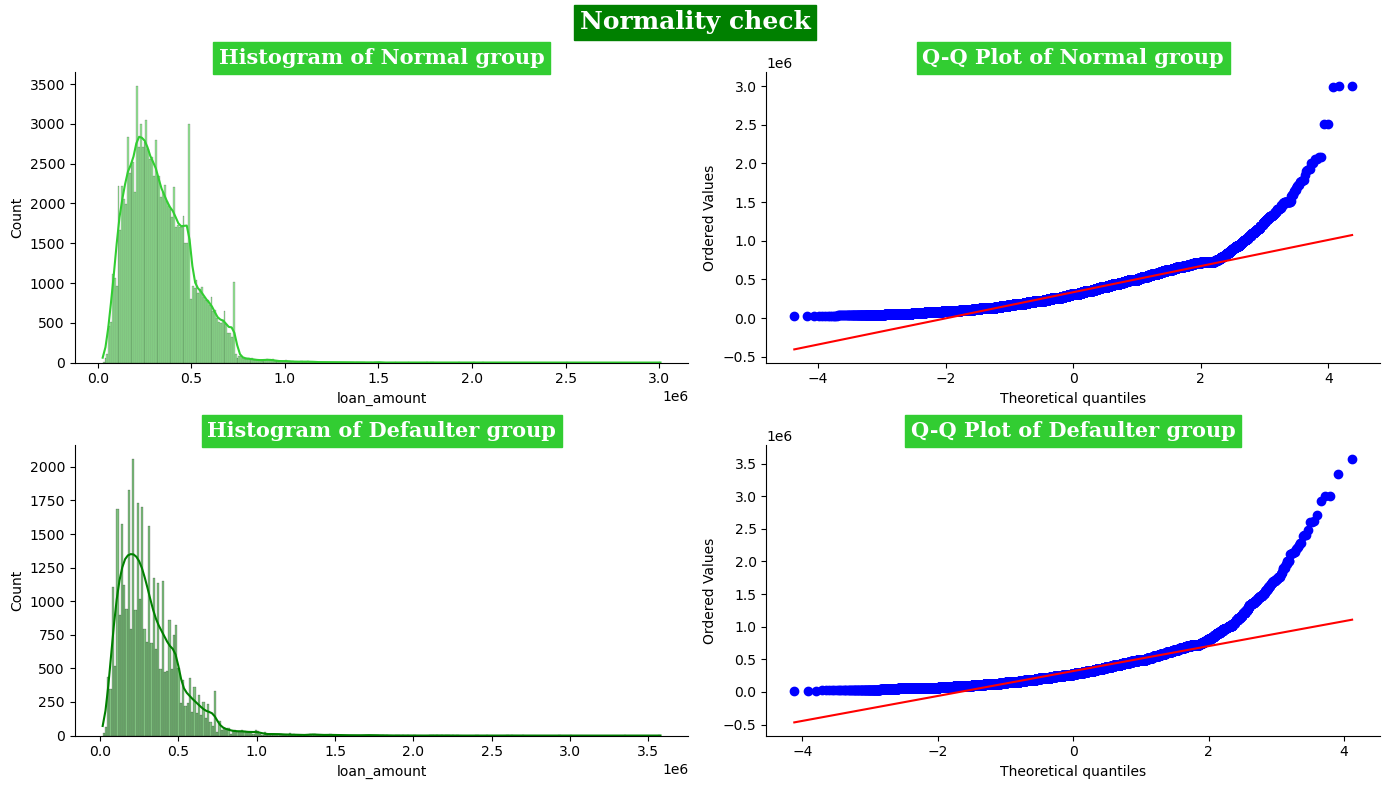

Normality Tests for Normal group:
- Shapiro-Wilk Test: Statistics=0.9342, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=1180.5027, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=136739.1680, p-value=0.0000 => Not Gaussian distribution

Normality Tests for Defaulter group:
- Shapiro-Wilk Test: Statistics=0.8383, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=910.1837, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=393315.3155, p-value=0.0000 => Not Gaussian distribution

After Box-Cox Transformation:
Normality Tests for Transformed Normal group:
- Shapiro-Wilk Test: Statistics=0.9957, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=114.2915, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=212.4272, p-value=0.0000 

In [102]:
analysis = StatisticalAnalysis(normal_loan_amount, 'Normal group', defaulter_loan_amount, 'Defaulter group')
analysis.normality_plots()  # Plot histograms and Q-Q plots
analysis.normality_tests()  # Perform normality tests
analysis.variance_tests()   # Perform variance tests

**4. Perform the Hypothesis Test**
- Since the data is not Gaussian distribution we can go with non parametric test know as **Mann-Whitney U test(two-sided)** with **Confidence level of 95%**

In [103]:
# Function calling -> mannwhitneyu_u_test(group_1, group_1_name, group_2, group_2_name, alternative='two-sided' or 'greater' or 'less')
mannwhitneyu_u_test(normal_loan_amount, 'Normal group', defaulter_loan_amount, 'Defaulter group', alternative='two-sided')

Mann-Whitney U test: (two-sided)
There is a difference (with respect to the central tendency) between Normal group and Defaulter group.


**4.perform the Hypothesis Test**
- Since we have got the result that means are different from the above tests, we can perform the **Mann-Whitney U test(Right tailed)** to check if group_1 is greater than group_2 with **Confidence level of 95%**

In [104]:
# Function calling -> mannwhitneyu_u_test(group_1, group_1_name, group_2, group_2_name, alternative='two-sided' or 'greater' or 'less')
mannwhitneyu_u_test(normal_loan_amount, 'Normal group', defaulter_loan_amount, 'Defaulter group', alternative='greater')

Mann-Whitney U test: (greater)
The central tendency of Normal group is greater than Defaulter group.


> **🔍CONCLUSION🔎**
- **Greater Loan Amounts for Normal Group:** The results of the one-tailed test show that the central tendency (median) of the Normal group is greater than that of the Defaulter group, indicating that individuals classified as normal tend to have higher loan amounts compared to those who defaulted.
- **Higher Loan Amounts Linked to Lower Default Rates:** The analysis reveals that borrowers categorized as "Normal" tend to secure higher loan amounts than those classified as "Defaulters." This insight suggests that the business may want to consider targeting higher loan amounts for borrowers with favorable credit profiles to minimize default risks.

**🕵🏽Insights:**

Borrowers who are not defaulters generally take out larger loans compared to defaulters. This insight can be valuable for financial risk assessments, as borrowers with smaller loan amounts might pose a higher risk of default, while those with larger loans may be less likely to default, potentially due to better financial standing or greater ability to repay.

##### <font color=#32de84>**Rate of Interest Vs. Status**</font>

In [106]:
# statistical summary
df.groupby('Status')['rate_of_interest'].describe()

count      mean       std       min       25%      50%  \
Status                                                                 
normal     111932.0  4.044862  0.561482  0.000000  3.625000  3.99000   
defaulter   36412.0  4.142879  0.251030  2.943254  4.013126  4.15639   

                75%      max  
Status                        
normal     4.375000  8.00000  
defaulter  4.304937  5.80856

**Introduction**

- When comparing "rate_of_interest" and "Status," we can use a **Two-Sample Independent T-Test** if the data is normally distributed or a non-parametric test like the **Mann-Whitney U test** if it's not.

**Why Two-Sample Independent T-Test?**

- One should choose the Two-Sample Independent T-Test to compare the means of two independent groups to determine if there is a statistically significant difference between them.

**Perform Hypothesis Testing**

**1. Formulate the Hypotheses**

  - **Null Hypothesis (H0):** There is no significant difference between the two groups.
  - **Alternative Hypothesis (H1)**: There is a significant difference between the two groups.

**2. Check Assumptions:**
- **Normality:** Use the Q-Q Plot and Shapiro-Wilk test to check if the data is normally distributed.
- **Equality of Variances:** Use Levene's test to check if the variances are equal.

**3. Choose the Appropriate Test**
  - If the data is **normally distributed, use two-Sample Independent T-Test.**
  - If the data is **not normally distributed, use the Mann-Whitney U test.**

In [107]:
# Preparing the data:
normal_rate_of_interest = df[df['Status'] == 'normal']['rate_of_interest']
defaulter_rate_of_interest = df[df['Status'] == 'defaulter']['rate_of_interest']

> **Normality & Equality of Variances:****

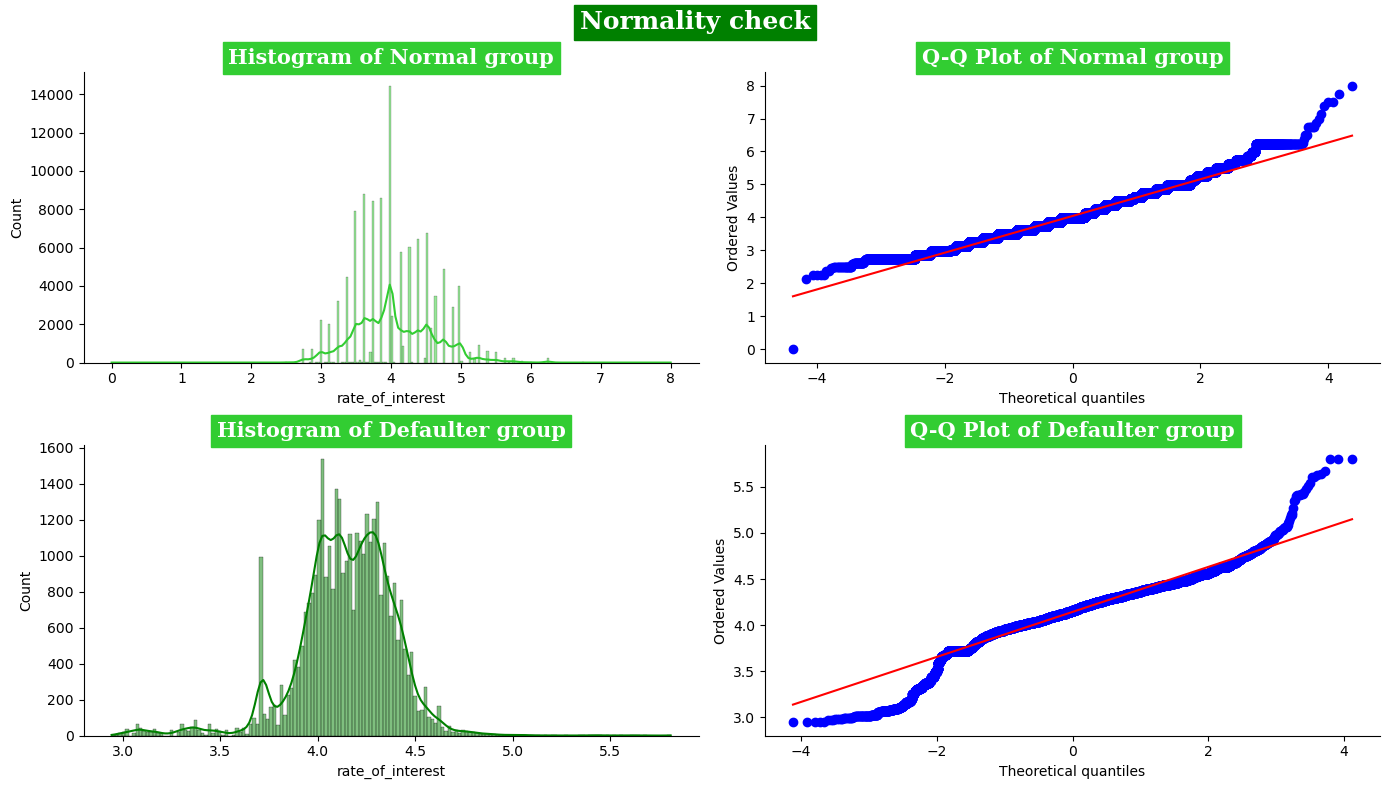

Normality Tests for Normal group:
- Shapiro-Wilk Test: Statistics=0.9850, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=560.7627, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=3386.7748, p-value=0.0000 => Not Gaussian distribution

Normality Tests for Defaulter group:
- Shapiro-Wilk Test: Statistics=0.9475, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=296.9990, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=20187.8393, p-value=0.0000 => Not Gaussian distribution

Box-Cox transformation failed: Data must be positive.

Levene's Test for Normal group and Defaulter group:
- Statistic: 16544.4856, p-value: 0.0000
Variances of Normal group and Defaulter group are significantly different.

Bartlett's Test for Normal group and Defaulter group:
- Statistic: 26188.2210, p-value: 0.0000
Variances of Normal gro

In [110]:
# Function calling -> normality(group_1, group_1_name, group_2, group_2_name)
analysis = StatisticalAnalysis(normal_rate_of_interest, 'Normal group', defaulter_rate_of_interest, 'Defaulter group')
analysis.normality_plots()
analysis.normality_tests()
analysis.variance_tests()

In [111]:
# skewness and kurtosis coefficient:
day_list = {'Normal group':normal_rate_of_interest, 'Defaulter group': defaulter_rate_of_interest}

for name, data in day_list.items():
  print(f"Data {name}:")
  print("skewness coefficient:" , pd.Series(data).skew().round(2))
  print("kurtosis coefficient:" , pd.Series(data).kurt().round(2))
  print()

Data Normal group:
skewness coefficient: 0.39
kurtosis coefficient: 0.35

Data Defaulter group:
skewness coefficient: -0.82
kurtosis coefficient: 3.26



**4. Perform the Hypothesis Test**
- Since the data is not Gaussian distribution we can go with non parametric test know as **Mann-Whitney U test(two-sided)** with **Confidence level of 95%**

In [112]:
# Function calling -> mannwhitneyu_u_test(group_1, group_1_name, group_2, group_2_name, alternative='two-sided' or 'greater' or 'less')
mannwhitneyu_u_test(normal_rate_of_interest, 'Normal group', defaulter_rate_of_interest, 'Defaulter group', alternative='two-sided')

Mann-Whitney U test: (two-sided)
There is a difference (with respect to the central tendency) between Normal group and Defaulter group.


**4.perform the Hypothesis Test**
- Since we have got the result that means are different from the above tests, we can perform the **Mann-Whitney U test(Left tailed)** to check if group_1 is greater than group_2 with **Confidence level of 95%**

In [113]:
# Function calling -> mannwhitneyu_u_test(group_1, group_1_name, group_2, group_2_name, alternative='two-sided' or 'greater' or 'less')
mannwhitneyu_u_test(normal_loan_amount, 'Normal group', defaulter_loan_amount, 'Defaulter group', alternative='less')

Mann-Whitney U test: (less)
There is no difference (in terms of central tendency) between Normal group and Defaulter group


In [114]:
# Function calling -> mannwhitneyu_u_test(group_1, group_1_name, group_2, group_2_name, alternative='two-sided' or 'greater' or 'less')
mannwhitneyu_u_test(normal_loan_amount, 'Normal group', defaulter_loan_amount, 'Defaulter group', alternative='greater')

Mann-Whitney U test: (greater)
The central tendency of Normal group is greater than Defaulter group.


> **🔍CONCLUSION🔎**

In summary, while the two-sided Mann-Whitney U test indicates a significant difference in central tendencies between the "Normal" and "Defaulter" groups, the one-tailed tests reveal complexities regarding the nature of this difference. These findings underscore the importance of further exploration to derive actionable insights for lending practices and borrower support.

##### <font color=#32de84>**Upfront_charges Vs. Status**</font>


In [115]:
# statistical summary
df.groupby('Status')['Upfront_charges'].describe()

count         mean          std         min          25%  \
Status                                                                   
normal     111932.0  3227.909910  3218.862754 -504.960204   632.340000   
defaulter   36412.0  3377.473334  1660.922972  -27.400474  2377.409773   

                  50%         75%           max  
Status                                           
normal     2637.50000  4777.51250  60000.000000  
defaulter  2962.37132  4017.62863  18308.583491

**Introduction**

- When comparing "Upfront_charges" and "Status," we can use a **Two-Sample Independent T-Test** if the data is normally distributed or a non-parametric test like the **Mann-Whitney U test** if it's not.

**Why Two-Sample Independent T-Test?**

- One should choose the Two-Sample Independent T-Test to compare the means of two independent groups to determine if there is a statistically significant difference between them.

**Perform Hypothesis Testing**

**1. Formulate the Hypotheses**

  - **Null Hypothesis (H0):** There is no significant difference between the two groups.
  - **Alternative Hypothesis (H1)**: There is a significant difference between the two groups.

**2. Check Assumptions:**
- **Normality:** Use the Q-Q Plot and Shapiro-Wilk test to check if the data is normally distributed.
- **Equality of Variances:** Use Levene's test to check if the variances are equal.

**3. Choose the Appropriate Test**
  - If the data is **normally distributed, use two-Sample Independent T-Test.**
  - If the data is **not normally distributed, use the Mann-Whitney U test.**

In [116]:
# Preparing the data:
normal_Upfront_charges = df[df['Status'] == 'normal']['Upfront_charges']
defaulter_Upfront_charges = df[df['Status'] == 'defaulter']['Upfront_charges']

> **Normality & Equality of Variances:**

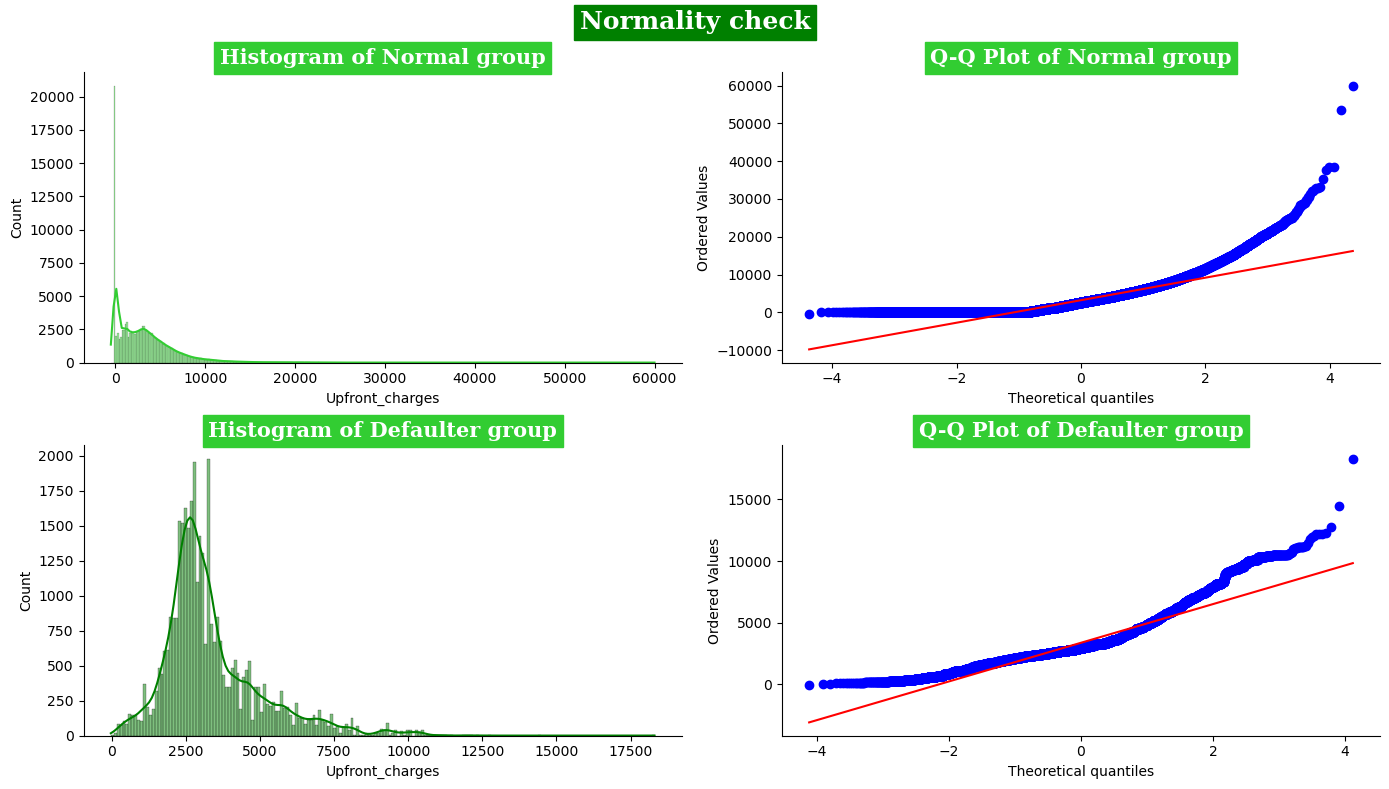

Normality Tests for Normal group:
- Shapiro-Wilk Test: Statistics=0.8551, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=3202.6978, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=255142.0207, p-value=0.0000 => Not Gaussian distribution

Normality Tests for Defaulter group:
- Shapiro-Wilk Test: Statistics=0.8896, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=1242.9528, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=25954.3355, p-value=0.0000 => Not Gaussian distribution

Box-Cox transformation failed: Data must be positive.

Levene's Test for Normal group and Defaulter group:
- Statistic: 9927.7055, p-value: 0.0000
Variances of Normal group and Defaulter group are significantly different.

Bartlett's Test for Normal group and Defaulter group:
- Statistic: 18726.0349, p-value: 0.0000
Variances of Normal 

In [118]:
# Function calling -> normality(group_1, group_1_name, group_2, group_2_name)
analysis = StatisticalAnalysis(normal_Upfront_charges, 'Normal group', defaulter_Upfront_charges, 'Defaulter group')
analysis.normality_plots()
analysis.normality_tests()
analysis.variance_tests()

**4. Perform the Hypothesis Test**
- Since the data is not Gaussian distribution we can go with non parametric test know as **Mann-Whitney U test(two-sided)** with **Confidence level of 95%**

In [119]:
# Function calling -> mannwhitneyu_u_test(group_1, group_1_name, group_2, group_2_name, alternative='two-sided' or 'greater' or 'less')
mannwhitneyu_u_test(normal_Upfront_charges, 'Normal group', defaulter_Upfront_charges, 'Defaulter group', alternative='two-sided')

Mann-Whitney U test: (two-sided)
There is a difference (with respect to the central tendency) between Normal group and Defaulter group.


**4.perform the Hypothesis Test**
- Since we have got the result that means are different from the above tests, we can perform the **Mann-Whitney U test(Left tailed)** to check if group_1 is greater than group_2 with **Confidence level of 95%**

In [120]:
# Function calling -> mannwhitneyu_u_test(group_1, group_1_name, group_2, group_2_name, alternative='two-sided' or 'greater' or 'less')
mannwhitneyu_u_test(normal_Upfront_charges, 'Normal group', defaulter_Upfront_charges, 'Defaulter group', alternative='less')

Mann-Whitney U test: (less)
The central tendency of Normal group is less than Defaulter group.


> **🔍CONCLUSION🔎**

- **Significant Difference in Central Tendencies:** The two-sided Mann-Whitney U test shows that there is a significant difference in the central tendencies between the "Normal" and "Defaulter" groups with respect to Upfront Charges. This suggests that the distributions of upfront charges are different between the two groups, indicating that the amount of upfront charges paid could be a distinguishing factor between those who default and those who do not.

- **Central Tendency of "Normal" Group is Lower:** The one-tailed (less) Mann-Whitney U test indicates that the central tendency of the "Normal" group is significantly less than that of the "Defaulter" group. This suggests that borrowers in the "Normal" group (those who did not default) tend to have lower upfront charges compared to those in the "Defaulter" group. In other words, those who defaulted may have faced higher upfront charges, which could potentially contribute to their defaulting.

**🕵🏽‍♂️Insights:**
* The Mann-Whitney U test results suggest that there is a significant difference in the upfront charges paid by the "Normal" and "Defaulter" groups, with defaulters having higher upfront charges. This insight can help inform lenders about potential risks and strategies for reducing default rates through better upfront charge management.

##### <font color=#32de84>**Property Value Vs. Status**</font>



In [121]:
# statistical summary
df.groupby('Status')['property_value'].describe()

count           mean            std     min            25%  \
Status                                                                     
normal     111932.0  505656.340574  342854.710163  8000.0  288000.000000   
defaulter   36412.0  513256.237278  409904.256320  8000.0  266563.484375   

                     50%       75%         max  
Status                                          
normal     428000.000000  638000.0   9268000.0  
defaulter  403551.890625  658000.0  16508000.0

**Introduction**

- When comparing "property_value" and "Status," we can use a **Two-Sample Independent T-Test** if the data is normally distributed or a non-parametric test like the **Mann-Whitney U test** if it's not.

**Why Two-Sample Independent T-Test?**

- One should choose the Two-Sample Independent T-Test to compare the means of two independent groups to determine if there is a statistically significant difference between them.

**Perform Hypothesis Testing**

**1. Formulate the Hypotheses**

  - **Null Hypothesis (H0):** There is no significant difference between the two groups.
  - **Alternative Hypothesis (H1)**: There is a significant difference between the two groups.

**2. Check Assumptions:**
- **Normality:** Use the Q-Q Plot and Shapiro-Wilk test to check if the data is normally distributed.
- **Equality of Variances:** Use Levene's test to check if the variances are equal.

**3. Choose the Appropriate Test**
  - If the data is **normally distributed, use two-Sample Independent T-Test.**
  - If the data is **not normally distributed, use the Mann-Whitney U test.**

In [122]:
# Preparing the data:
normal_property_value = df[df['Status'] == 'normal']['property_value']
defaulter_property_value = df[df['Status'] == 'defaulter']['property_value']

> **Normality & Equality of Variances:**

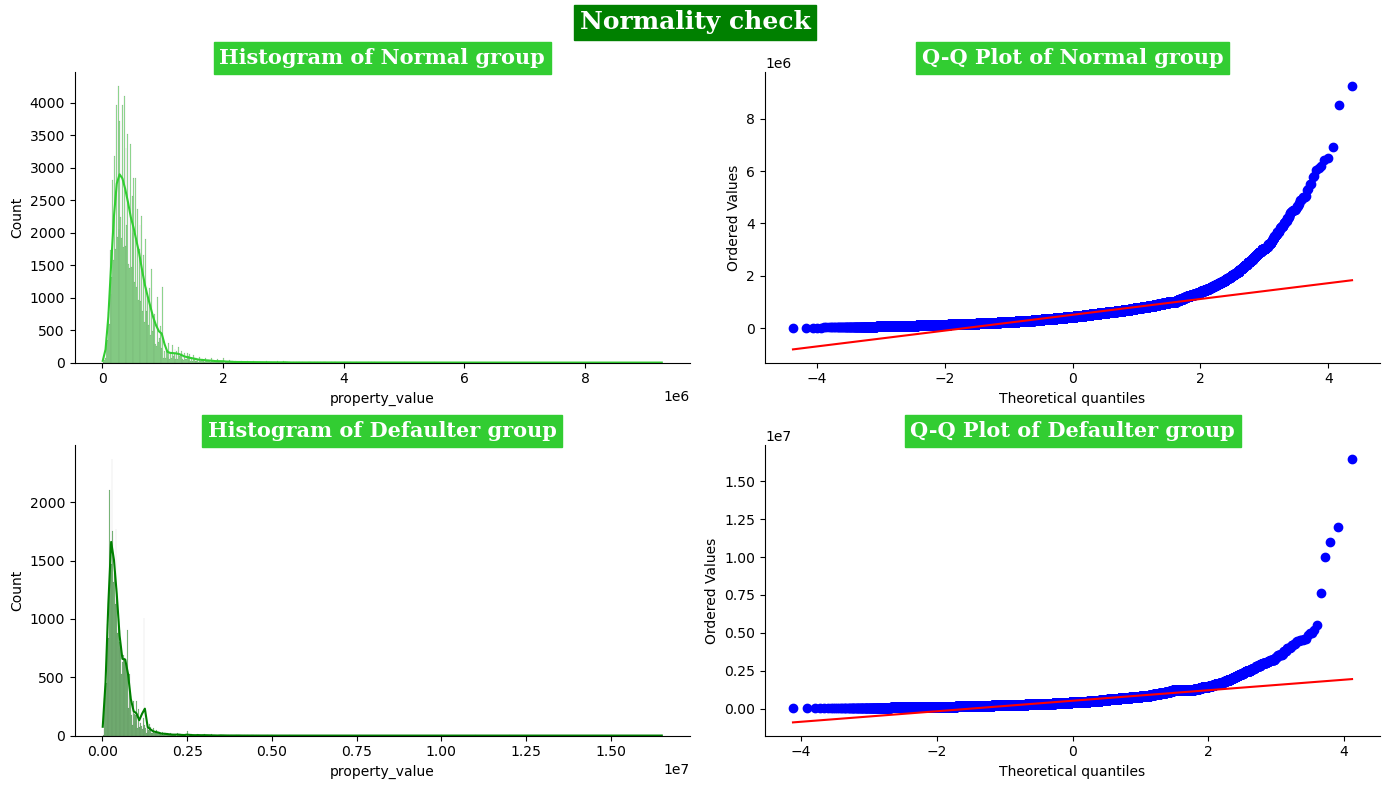

Normality Tests for Normal group:
- Shapiro-Wilk Test: Statistics=0.7777, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=3980.8064, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=4339336.1978, p-value=0.0000 => Not Gaussian distribution

Normality Tests for Defaulter group:
- Shapiro-Wilk Test: Statistics=0.7172, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=1844.6075, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=20107221.4880, p-value=0.0000 => Not Gaussian distribution

After Box-Cox Transformation:
Normality Tests for Transformed Normal group:
- Shapiro-Wilk Test: Statistics=0.9975, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=50.4349, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=615.0648, p-value=0.00

In [123]:
# Function calling -> normality(group_1, group_1_name, group_2, group_2_name)
analysis = StatisticalAnalysis(normal_property_value, 'Normal group', defaulter_property_value, 'Defaulter group')
analysis.normality_plots()
analysis.normality_tests()
analysis.variance_tests()

**4. Perform the Hypothesis Test**
- Since the data is not Gaussian distribution we can go with non parametric test know as **Mann-Whitney U test(two-sided)** with **Confidence level of 95%**

In [124]:
# Function calling -> mannwhitneyu_u_test(group_1, group_1_name, group_2, group_2_name, alternative='two-sided' or 'greater' or 'less')
mannwhitneyu_u_test(normal_property_value, 'Normal group', defaulter_property_value, 'Defaulter group', alternative='two-sided')

Mann-Whitney U test: (two-sided)
There is a difference (with respect to the central tendency) between Normal group and Defaulter group.


**4. Perform the Hypothesis Test**
- Since the data is not Gaussian distribution we can go with non parametric test know as **Mann-Whitney U test(Right tailed)** with **Confidence level of 95%**

In [125]:
# Function calling -> mannwhitneyu_u_test(group_1, group_1_name, group_2, group_2_name, alternative='two-sided' or 'greater' or 'less')
mannwhitneyu_u_test(normal_property_value, 'Normal group', defaulter_property_value, 'Defaulter group', alternative='greater')

Mann-Whitney U test: (greater)
The central tendency of Normal group is greater than Defaulter group.


> **🔍CONCLUSION🔎**

- **Significant Difference in Central Tendencies:** The test shows that there is a statistically significant difference in the central tendency (median) of the property values between the Normal group and the Defaulter group. This implies that property values for borrowers who are normal (non-defaulters) differ from those who have defaulted.

- **Central Tendency of "Normal" Group is greater:** The result indicates that the central tendency (median) of the Normal group is greater than that of the Defaulter group. This suggests that borrowers classified as "Normal" tend to have higher property values compared to those classified as "Defaulter."

**🕵🏽‍♂️Insights:**

Borrowers who do not default on their loans are likely to have properties of higher value compared to defaulters. This insight can be useful for assessing risk—borrowers with higher property values might be seen as lower risk for loan default. This could inform credit approval strategies and loan conditions.

##### <font color=#32de84>**Income Vs. Status**</font>



In [126]:
# statistical summary
df.groupby('Status')['income'].describe()

count         mean          std  min     25%     50%     75%  \
Status                                                                       
normal     111932.0  7168.656555  6025.143048  0.0  4080.0  6060.0  8700.0   
defaulter   36412.0  6229.976793  7156.949623  0.0  3060.0  4920.0  7620.0   

                max  
Status               
normal     377220.0  
defaulter  578580.0

**Introduction**

- When comparing "income" and "Status," we can use a **Two-Sample Independent T-Test** if the data is normally distributed or a non-parametric test like the **Mann-Whitney U test** if it's not.

**Why Two-Sample Independent T-Test?**

- One should choose the Two-Sample Independent T-Test to compare the means of two independent groups to determine if there is a statistically significant difference between them.

**Perform Hypothesis Testing**

**1. Formulate the Hypotheses**

  - **Null Hypothesis (H0):** There is no significant difference between the two groups.
  - **Alternative Hypothesis (H1)**: There is a significant difference between the two groups.

**2. Check Assumptions:**
- **Normality:** Use the Q-Q Plot and Shapiro-Wilk test to check if the data is normally distributed.
- **Equality of Variances:** Use Levene's test to check if the variances are equal.

**3. Choose the Appropriate Test**
  - If the data is **normally distributed, use two-Sample Independent T-Test.**
  - If the data is **not normally distributed, use the Mann-Whitney U test.**

In [127]:
# Preparing the data:
normal_income = df[df['Status'] == 'normal']['income']
defaulter_income = df[df['Status'] == 'defaulter']['income']

> **Normality & Equality of Variances:**

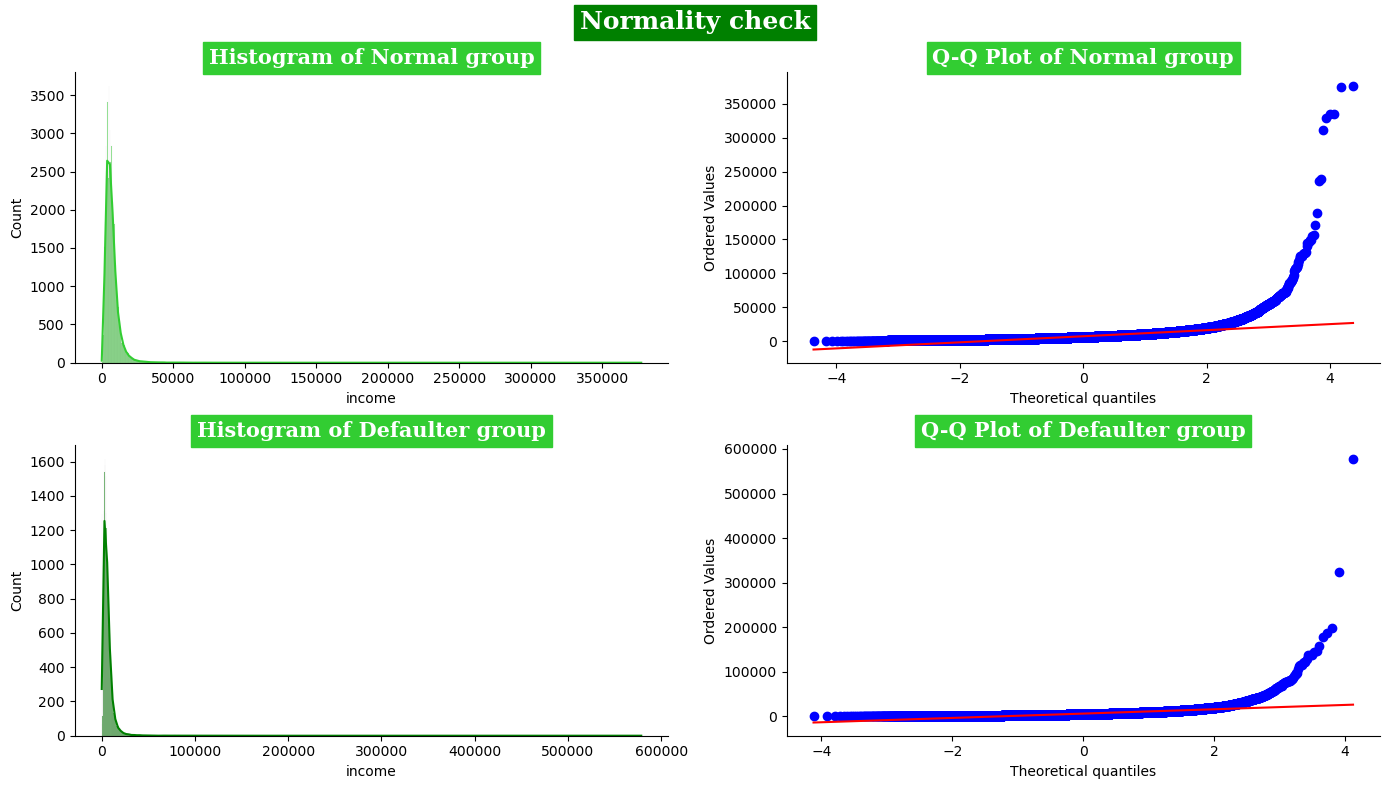

Normality Tests for Normal group:
- Shapiro-Wilk Test: Statistics=0.5536, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=7253.1668, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=1948452911.0890, p-value=0.0000 => Not Gaussian distribution

Normality Tests for Defaulter group:
- Shapiro-Wilk Test: Statistics=0.4629, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=3201.3252, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=2614473103.6200, p-value=0.0000 => Not Gaussian distribution

Box-Cox transformation failed: Data must be positive.

Levene's Test for Normal group and Defaulter group:
- Statistic: 19.2676, p-value: 0.0000
Variances of Normal group and Defaulter group are significantly different.

Bartlett's Test for Normal group and Defaulter group:
- Statistic: 1720.8790, p-value: 0.0000
Variances of N

In [128]:
# Function calling -> normality(group_1, group_1_name, group_2, group_2_name)
analysis = StatisticalAnalysis(normal_income, 'Normal group', defaulter_income, 'Defaulter group')
analysis.normality_plots()
analysis.normality_tests()
analysis.variance_tests()

**4. Perform the Hypothesis Test**
- Since the data is not Gaussian distribution we can go with non parametric test know as **Mann-Whitney U test(two-sided)** with **Confidence level of 95%**

In [129]:
# Function calling -> mannwhitneyu_u_test(group_1, group_1_name, group_2, group_2_name, alternative='two-sided' or 'greater' or 'less')
mannwhitneyu_u_test(normal_income, 'Normal group', defaulter_income, 'Defaulter group', alternative='two-sided')

Mann-Whitney U test: (two-sided)
There is a difference (with respect to the central tendency) between Normal group and Defaulter group.


**4. Perform the Hypothesis Test**
- Since the data is not Gaussian distribution we can go with non parametric test know as **Mann-Whitney U test(Righ tailed)** with **Confidence level of 95%**

In [130]:
# Function calling -> mannwhitneyu_u_test(group_1, group_1_name, group_2, group_2_name, alternative='two-sided' or 'greater' or 'less')
mannwhitneyu_u_test(normal_income, 'Normal group', defaulter_income, 'Defaulter group', alternative='greater')

Mann-Whitney U test: (greater)
The central tendency of Normal group is greater than Defaulter group.


> **🔍CONCLUSION🔎**

- **Significant Difference in Central Tendencies:** There is a statistically significant difference in the central tendency (median) of the income between the Normal group and the Defaulter group. This indicates that the income levels of borrowers who are normal (non-defaulters) differ from those who default.

- **Central Tendency of "Normal" Group is greater:** The result shows that the central tendency (median) of income for the Normal group is greater than that of the Defaulter group. This suggests that normal borrowers generally have higher income levels compared to defaulters.

**🕵🏽‍♂️Insight:**

* Borrowers with higher incomes tend to be non-defaulters, while those with lower incomes are more likely to default on their loans. This information can be useful for lenders to assess the risk of default, potentially adjusting loan terms based on a borrower's income to mitigate risk.

##### <font color=#32de84>**Credit Score Vs. Status**</font>

In [131]:
# statistical summary
df.groupby('Status')['Credit_Score'].describe()

count        mean         std    min    25%    50%    75%    max
Status                                                                        
normal     111932.0  699.510667  115.675157  500.0  599.0  699.0  800.0  900.0
defaulter   36412.0  700.580413  116.473990  500.0  599.0  700.0  803.0  900.0

**Introduction**

- When comparing "Credit_Score" and "Status," we can use a **Two-Sample Independent T-Test** if the data is normally distributed or a non-parametric test like the **Mann-Whitney U test** if it's not.

**Why Two-Sample Independent T-Test?**

- One should choose the Two-Sample Independent T-Test to compare the means of two independent groups to determine if there is a statistically significant difference between them.

**Perform Hypothesis Testing**

**1. Formulate the Hypotheses**

  - **Null Hypothesis (H0):** There is no significant difference between the two groups.
  - **Alternative Hypothesis (H1)**: There is a significant difference between the two groups.

**2. Check Assumptions:**
- **Normality:** Use the Q-Q Plot and Shapiro-Wilk test to check if the data is normally distributed.
- **Equality of Variances:** Use Levene's test to check if the variances are equal.

**3. Choose the Appropriate Test**
  - If the data is **normally distributed, use two-Sample Independent T-Test.**
  - If the data is **not normally distributed, use the Mann-Whitney U test.**

In [132]:
# Preparing the data:
normal_Credit_Score = df[df['Status'] == 'normal']['Credit_Score']
defaulter_Credit_Score = df[df['Status'] == 'defaulter']['Credit_Score']

> **Normality & Equality of Variances:**

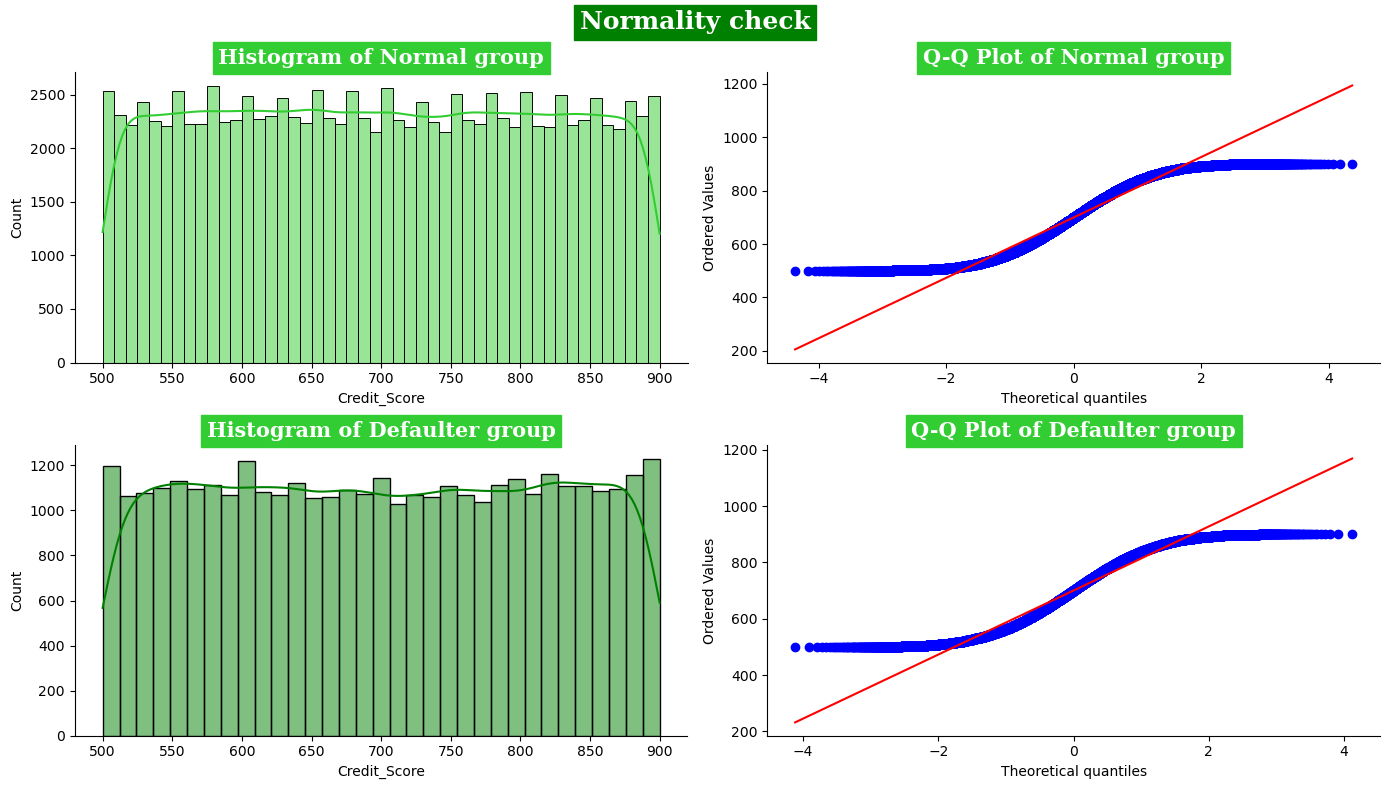

Normality Tests for Normal group:
- Shapiro-Wilk Test: Statistics=0.9551, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=1238.2230, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=6697.3833, p-value=0.0000 => Not Gaussian distribution

Normality Tests for Defaulter group:
- Shapiro-Wilk Test: Statistics=0.9533, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=427.3160, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=2241.9277, p-value=0.0000 => Not Gaussian distribution

After Box-Cox Transformation:
Normality Tests for Transformed Normal group:
- Shapiro-Wilk Test: Statistics=0.9553, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=1234.0017, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=6674.7439, p-value=0.0000 =>

In [134]:
# Function calling -> normality(group_1, group_1_name, group_2, group_2_name)
analysis = StatisticalAnalysis(normal_Credit_Score, 'Normal group', defaulter_Credit_Score, 'Defaulter group')
analysis.normality_plots()
analysis.normality_tests()
analysis.variance_tests()

**4. Perform the Hypothesis Test**
- Since the data is not Gaussian distribution we can go with non parametric test know as **Mann-Whitney U test(two-sided)** with **Confidence level of 95%**

In [135]:
# Function calling -> mannwhitneyu_u_test(group_1, group_1_name, group_2, group_2_name, alternative='two-sided' or 'greater' or 'less')
mannwhitneyu_u_test(normal_Credit_Score, 'Normal group', defaulter_Credit_Score, 'Defaulter group', alternative='two-sided')

Mann-Whitney U test: (two-sided)
There is no difference (in terms of central tendency) between Normal group and Defaulter group


> **🔍CONCLUSION🔎**

- **Mann-Whitney U Test (Two-sided):** The result shows that there is no statistically significant difference in the central tendency (median) of Credit Score between the Normal group and the Defaulter group. This suggests that the credit scores of borrowers who are normal (non-defaulters) and those who default are not significantly different in terms of their central tendencies.

**🧐Business Insight:**

Since the Mann-Whitney U test shows no significant difference in the credit score distribution between non-defaulters and defaulters, it may indicate that credit score alone may not be a reliable predictor of whether a borrower will default or not. Lenders may need to consider additional factors along with credit score to more effectively assess default risk.

##### <font color=#32de84>**LTV Vs. Status**</font>



In [138]:
# statistical summary
df.groupby('Status')['LTV'].describe()

count       mean        std       min        25%        50%  \
Status                                                                      
normal     111932.0  72.053415  41.783471  2.072943  59.969325  74.497487   
defaulter   36412.0  71.502567  32.703479  0.967478  51.466228  73.538961   

                 75%      max  
Status                         
normal     85.201149  7831.25  
defaulter  89.225941  2956.25

**Introduction**

- When comparing "LTV" and "Status," we can use a **Two-Sample Independent T-Test** if the data is normally distributed or a non-parametric test like the **Mann-Whitney U test** if it's not.

**Why Two-Sample Independent T-Test?**

- One should choose the Two-Sample Independent T-Test to compare the means of two independent groups to determine if there is a statistically significant difference between them.

**Perform Hypothesis Testing**

**1. Formulate the Hypotheses**

  - **Null Hypothesis (H0):** There is no significant difference between the two groups.
  - **Alternative Hypothesis (H1)**: There is a significant difference between the two groups.

**2. Check Assumptions:**
- **Normality:** Use the Q-Q Plot and Shapiro-Wilk test to check if the data is normally distributed.
- **Equality of Variances:** Use Levene's test to check if the variances are equal.

**3. Choose the Appropriate Test**
  - If the data is **normally distributed, use two-Sample Independent T-Test.**
  - If the data is **not normally distributed, use the Mann-Whitney U test.**

In [139]:
# Preparing the data:
normal_LTV = df[df['Status'] == 'normal']['LTV']
defaulter_LTV = df[df['Status'] == 'defaulter']['LTV']

> **Normality & Equality of Variances:**

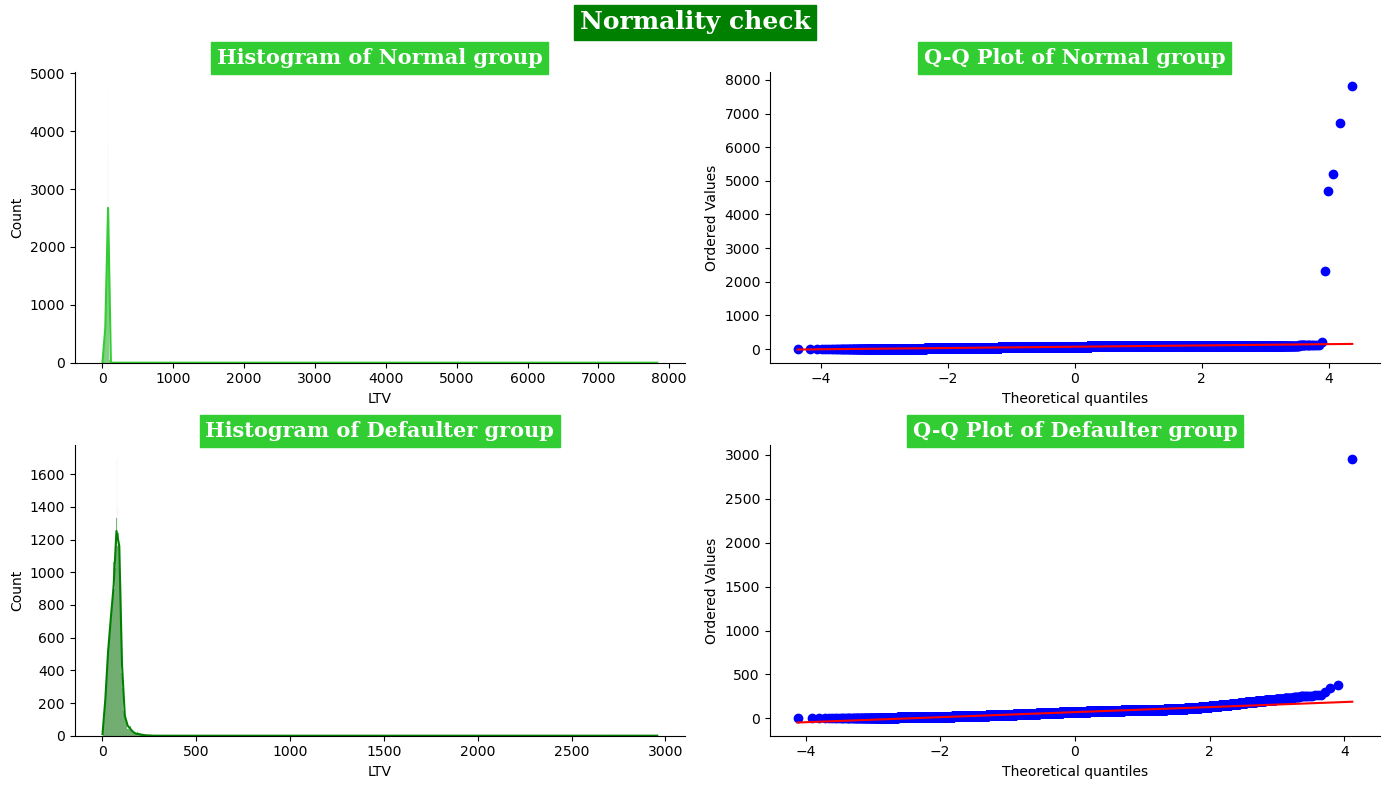

Normality Tests for Normal group:
- Shapiro-Wilk Test: Statistics=0.2092, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=12071.2673, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=1822106061367.3826, p-value=0.0000 => Not Gaussian distribution

Normality Tests for Defaulter group:
- Shapiro-Wilk Test: Statistics=0.7718, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=400.3578, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=4200836414.6453, p-value=0.0000 => Not Gaussian distribution

After Box-Cox Transformation:
Normality Tests for Transformed Normal group:
- Shapiro-Wilk Test: Statistics=0.8501, p-value=0.0000 => Not Gaussian distribution
- Anderson-Darling Test: Statistic=2561.7688, Critical Values=[0.576 0.656 0.787 0.918 1.092] => Not Gaussian distribution
- Jarque-Bera Test: Statistics=86208543.889

In [140]:
# Function calling -> normality(group_1, group_1_name, group_2, group_2_name)
analysis = StatisticalAnalysis(normal_LTV, 'Normal group', defaulter_LTV, 'Defaulter group')
analysis.normality_plots()
analysis.normality_tests()
analysis.variance_tests()

**4. Perform the Hypothesis Test**
- Since the data is not Gaussian distribution we can go with non parametric test know as **Mann-Whitney U test(two-sided)** with **Confidence level of 95%**

In [141]:
# Function calling -> mannwhitneyu_u_test(group_1, group_1_name, group_2, group_2_name, alternative='two-sided' or 'greater' or 'less')
mannwhitneyu_u_test(normal_LTV, 'Normal group', defaulter_LTV, 'Defaulter group', alternative='two-sided')

Mann-Whitney U test: (two-sided)
There is a difference (with respect to the central tendency) between Normal group and Defaulter group.


**4. Perform the Hypothesis Test**
- Since the data is not Gaussian distribution we can go with non parametric test know as **Mann-Whitney U test(Left tailed)** with **Confidence level of 95%**

In [142]:
# Function calling -> mannwhitneyu_u_test(group_1, group_1_name, group_2, group_2_name, alternative='two-sided' or 'greater' or 'less')
mannwhitneyu_u_test(normal_LTV, 'Normal group', defaulter_LTV, 'Defaulter group', alternative='less')

Mann-Whitney U test: (less)
There is no difference (in terms of central tendency) between Normal group and Defaulter group


In [143]:
# Function calling -> mannwhitneyu_u_test(group_1, group_1_name, group_2, group_2_name, alternative='two-sided' or 'greater' or 'less')
mannwhitneyu_u_test(normal_LTV, 'Normal group', defaulter_LTV, 'Defaulter group', alternative='greater')

Mann-Whitney U test: (greater)
The central tendency of Normal group is greater than Defaulter group.


> **🔍CONCLUSION🔎**

- **Mann-Whitney U Test (Two-sided):** The test indicates that there is a statistically significant difference in the central tendency (median) of the Loan-to-Value (LTV) ratio between the Normal group (non-defaulters) and the Defaulter group.

- **Mann-Whitney U Test (Greater):** The result from the one-sided test shows that the central tendency (median LTV ratio) of the Normal group is greater than that of the Defaulter group. This suggests that borrowers who default tend to have lower LTV ratios compared to non-defaulters.

**🧐Business Insight:**

The finding that defaulters tend to have lower LTV ratios suggests that borrowers with lower LTV (i.e., those borrowing more relative to the value of the property) are at a greater risk of defaulting. This insight is valuable for lenders, as they may want to assess risk more carefully for borrowers with high LTV ratios and potentially adjust lending policies, interest rates, or require additional collateral for such loans.



---


## **🥨Insights**

>🔸**Income Influences Loan Status:**  
* Higher incomes are associated with lower default risk, as non-defaulters tend to have significantly higher incomes than defaulters (Mann-Whitney U test).

>🔸**Loan Amount Correlates with Loan Status:**  
* Non-defaulters take larger loans compared to defaulters, as shown by the Mann-Whitney U test.

>🔸**LTV Ratio and Default Risk:**  
* Defaulters have a lower LTV ratio than non-defaulters, though higher LTV is generally considered to increase default risk.

>🔸 **Upfront Charges and Default Risk:**  
* Defaulters tend to face higher upfront charges, suggesting that loan fees may be linked to higher default risk.

>🔸**Credit Score Insignificant for Default:**  
* Credit scores do not show a significant difference between defaulters and non-defaulters, indicating it's not a strong predictor in this dataset.

>🔸 **Property Value and Loan Status:**  
* Non-defaulters typically own higher-value properties, which correlate with a lower likelihood of default.

> 🔸**Occupancy Type Affects Default Probability:**  
* Loan default rates vary based on whether borrowers occupy the property, with a significant relationship found between occupancy type and loan status.

>🔸 **Age Influences Default Likelihood:**  
* Borrower age significantly affects the probability of default, with certain age groups being more prone to default.

>🔸 **Business Loans Carry Higher Risk:**  
* Business or commercial loans show a higher likelihood of default compared to personal loans.

>🔸 **Loan Purpose Impacts Default Risk:**  
* The reason for taking a loan plays a significant role in default probability, with some loan purposes being riskier than others.

- - - - - - - - - - - - - - - - - - - - - - - - - - - -

***`🔑 Key Insights on Loan Default (Inshort):`***
*  
    * Higher Income: Non-defaulters have significantly higher incomes.
    * Larger Loans: Non-defaulters tend to take bigger loans.
    * Lower LTV: Defaulters have lower Loan-to-Value ratios.
    * Higher Fees: Defaulters face higher upfront charges.
    * Credit Score Impact: No significant difference in credit scores.
    * Higher Property Value: Non-defaulters own higher-value properties.
    * Occupancy Matters: Borrower-occupied properties default less.
    * Age Factor: Certain age groups are more prone to default.
    * Business Loans: Riskier compared to personal loans.
    * Loan Purpose: Default risk varies by loan purpose.

## **🤝Recommendations**

>💠 **Implement Tiered Risk-Based Lending:**  
* Offer lower loan amounts or stricter terms to borrowers with lower incomes, as higher-income borrowers show a lower likelihood of default. Set income-based thresholds to adjust loan limits and terms.

>💠 **Tighten Approval for High LTV Ratios:**  
* Impose stricter criteria for loans with high LTV ratios, capping LTV for riskier borrowers or requiring higher down payments to mitigate default risks.

>💠 **Limit Loans with High Upfront Charges:**  
* Reduce upfront charges for riskier borrowers or offer alternative fee structures. This can lower the default likelihood for those facing higher loan fees.

>💠**Focus on Property-Based Loans for Safer Lending:**  
* Promote loan products for higher-value property owners, as they are associated with a lower risk of default. Offer more favorable terms to this group.

>💠**Expand Credit Evaluation Beyond Scores:**  
* Use additional metrics like income, LTV, and property value to assess risk, as credit score alone is not a strong predictor of default. Implement a holistic credit assessment approach.

>💠 **Design Age-Specific Loan Products:**  
* Tailor loan terms for different age groups, considering their varying default risks. Offer flexible terms or create age-targeted lending strategies.

>💠**Be Cautious with Business Loans:**  
* Given their higher default risk, introduce stricter criteria or higher interest rates for business or commercial loans. Implement a specialized risk evaluation for these types of loans.

>💠**Guide Lending Based on Occupancy Type:**  
* Differentiate lending terms between owner-occupied and non-owner-occupied properties, offering more favorable terms to borrowers who plan to occupy the property.

>💠**Focus on Loan Purpose for Risk Assessment:**  
* Adjust loan terms based on the purpose, as loan purpose significantly affects default risk. Categorize loan purposes and tailor approval criteria and interest rates.

>💠 **Implement Continuous Risk Monitoring for High-Risk Loans:**  
* Set up monitoring for loans with high LTV ratios or high upfront charges, and create early intervention strategies to support borrowers showing signs of potential default.

--------
<h2 align='center'>Analysed by : <font color='green'><b> KASI </b></font></h2>

--------